# <font color='orange'>Numerical Exercise 11</font>
The scope of this exercise is to use a **Neural Network (NN)** in order to handle the **Prediction Problem**, i.e. to predict data from a set of observations. The goal is to instruct the NN to predict the set of $ \{ y_i \}_{i=1}^N $ associated to the probabilistic process 

$$ y_i = f(x_i) + \eta_i $$

where $ f(x_i) $ is some fixed (possibly unknown) function, and $ \eta_i $ is a Gaussian, uncorrelated noise variable such that

$$
  \langle \eta_i \rangle=0 \\
  \langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$


## <font color='blue'>Exercise 11.1</font>
In this first exercise we want to study how the functioning of the NN varies with the **hyper-parameters**, i.e. those parameters that must be set by the NN user and that the latter does not optimize during the training phase, considering the simple case of the linear fit described in the exercise delivery.

Therefore, I train the Network by changing the number of epochs as a first step, taking $N_{epoch} = [50, 150, 300, 500]$, keeping the other hyper-parameters fixed at the following values

|  Parameter                   |  Symbol        |  Value    |
|  :-------:                   |  :----:        |  :---:    |
|  Number of training points   |  $ N_{train} $ |  $ 10^3 $ |
|  Batch size                  |  $ N_{batch} $ |  $ 50 $   |
|  Number of validation points |  $ N_{val} $   |  $ 50 $   |
|  Random noise                |  $ \sigma $    |  $ 0.0 $  |

I evaluate the optimal value for this hyper-parameter by comparing the curves related to the *metric* used and the *loss function* for the various $ N_{epoch} $.

In [1]:
from IPython.display import HTML, Image

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()"> Show/Hide code cells </a>.''')

In [2]:
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
#Standard Modules
from math import sin
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

#NN Modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Input, Dropout
from tensorflow.keras.callbacks import History
from tensorflow.keras.utils import plot_model

import logging
logging.getLogger("tensorflow").setLevel(logging.WARNING)
logging.getLogger('tensorflow').disabled = True

import os
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [4]:
############################
#Linear Fit
#Creation of the data set
############################
#target parameters of f(x) = m*x + b
m = 2  #slope
b = 1  #intersect
N_train = 10**5
N_valid = 50
N_pred = 100

#generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, N_valid)
x_predicted = np.random.uniform(-1, 1, N_pred)
x_predicted.sort()
y_target = m*x_predicted + b

#generate training outputs
sigma = [0.0, 0.01, 0.1, 0.5, 1.0, 5.0]
y_train_sigma = []
y_valid_sigma = []
for j in range(len(sigma)):
    y_train_sigma.append(np.random.normal(m * x_train + b, sigma[j]))
    y_valid_sigma.append(np.random.normal(m * x_valid + b, sigma[j]))
y_train_0 = y_train_sigma[0]
y_valid_0 = y_valid_sigma[0]

In [5]:
############################
#Neural Network
#Creation of the NN
############################
print("The model has been initiated with Sequential")
model = tf.keras.Sequential(name='One_Neuron_FFNN')  #create the model --> FeedForward
model.add(Dense(1, input_shape=(1,)))  #just one layer of one neuron
                                       #in practice one neuron does the job
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])  #configure the NN model for the training
model.save('1N_FFNN_11.1')  #reuse the same starting NN
model.summary()

The model has been initiated with Sequential
Model: "One_Neuron_FFNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [6]:
############################
#Neural Network
#Training of the NN
############################
'''
    
    ====================
    Change N_epoch
    ====================
    N_train = 10**3
    Batch size = 50
    sigma = 0
    
'''
Neural_Network = tf.keras.models.load_model('1N_FFNN_11.1')  #load the starting model
N_epoch = [50, 150, 300, 500]
history = []
weights = []
for ep in range(len(N_epoch)):
    print('Train for', N_epoch[ep], 'epochs...')
    history.append(Neural_Network.fit(x_train[0:10**3], y_train_0[0:10**3], #train the model and return an                 
                                      epochs=N_epoch[ep], initial_epoch=0,  #History.history object
                                      batch_size=50, 
                                      validation_data=(x_valid, y_valid_0), 
                                      shuffle=True, verbose=0)              #0 = silent;  1 = progress bar; 
                                                                            #2 = one line per epoch
                  )
    print('Save the optimized weights\n')
    weights.append(Neural_Network.get_weights())

Train for 50 epochs...
Save the optimized weights

Train for 150 epochs...
Save the optimized weights

Train for 300 epochs...
Save the optimized weights

Train for 500 epochs...
Save the optimized weights



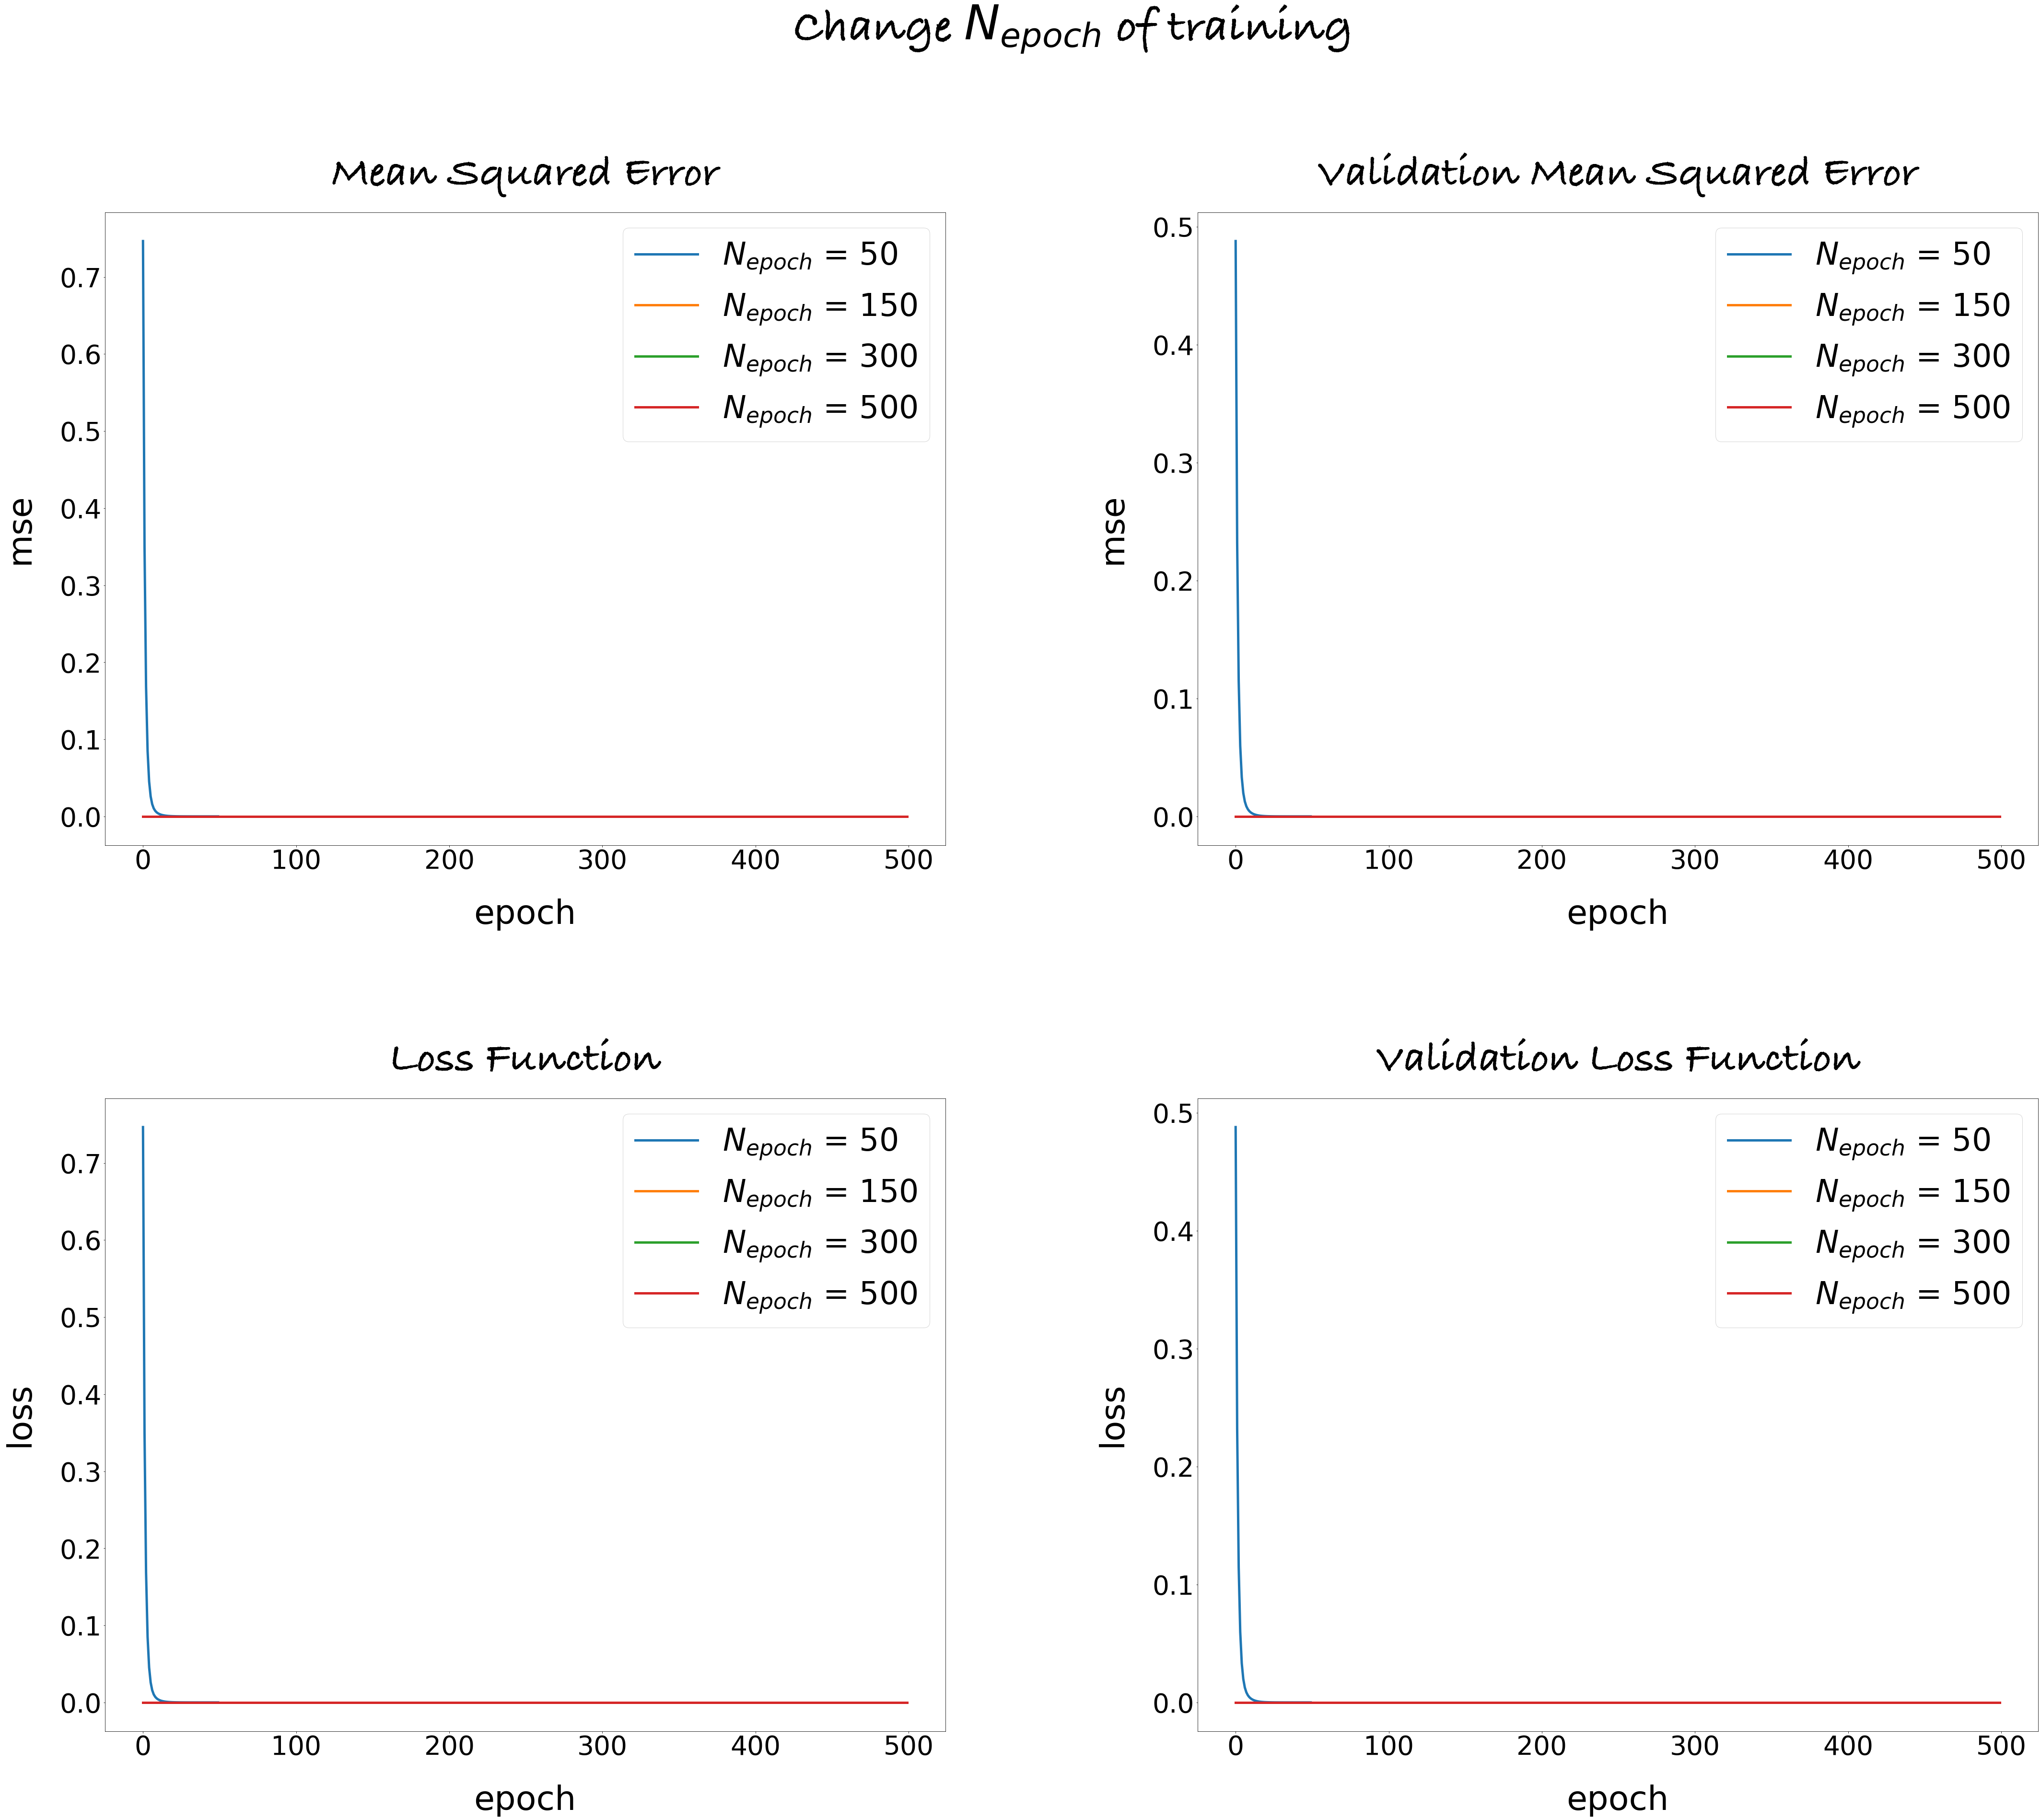

In [7]:
#plots
plt.figure(figsize=[70, 55])  #deafult (6.4,4.8)
plt.suptitle('Change $ N_{epoch} $ of training', y=1.01, fontname = 'Bradley Hand', fontsize=100)

plt.subplot(2, 2, 1)
plt.title('Mean Squared Error', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('epoch', fontsize=70, labelpad=50)
plt.ylabel('mse', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
for ep in range(len(N_epoch)):
    plt.plot(history[ep].history['mse'], lw=5.0, label='$N_{epoch}$ = '+str(N_epoch[ep]))
plt.legend(fontsize=65, loc='best')

plt.subplot(2, 2, 2)
plt.title('Validation Mean Squared Error', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('epoch', fontsize=70, labelpad=50)
plt.ylabel('mse', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
for ep in range(len(N_epoch)):
    plt.plot(history[ep].history['val_mse'], lw=5.0, label='$N_{epoch}$ = '+str(N_epoch[ep]))
plt.legend(fontsize=65, loc='best')

plt.subplot(2, 2, 3)
plt.title('Loss Function', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('epoch', fontsize=70, labelpad=50)
plt.ylabel('loss', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
for ep in range(len(N_epoch)):
    plt.plot(history[ep].history['loss'], lw=5.0, label='$N_{epoch}$ = '+str(N_epoch[ep]))
plt.legend(fontsize=65, loc='best')

plt.subplot(2, 2, 4)
plt.title('Validation Loss Function', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('epoch', fontsize=70, labelpad=50)
plt.ylabel('loss', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
for ep in range(len(N_epoch)):
    plt.plot(history[ep].history['val_loss'], lw=5.0, label='$N_{epoch}$ = '+str(N_epoch[ep]))
plt.legend(fontsize=65, loc='best')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
plt.show()

In [8]:
#weights
print('\t\t\t\t =====================================')
print('\t\t\t\t     Weights values for each N_epoch')
print('\t\t\t\t =====================================')
for ep in range(len(N_epoch)):
    print('\t\t\t\t\t N_epoch = ',str(N_epoch[ep]))
    print('\t\t\t\t\t m =',weights[ep][0][0][0], '\t b =',weights[ep][1][0], '\n')

				     Weights values for each N_epoch
					 N_epoch =  50
					 m = 1.9995192 	 b = 0.99999374 

					 N_epoch =  150
					 m = 1.999994 	 b = 1.0 

					 N_epoch =  300
					 m = 1.999994 	 b = 0.99999994 

					 N_epoch =  500
					 m = 1.9999942 	 b = 0.99999994 



In all four simulated cases the network manages to minimize the metrics without incurring the *overfitting problem*, which is the problem that could arise considering a number of training epochs too large.
The curves related to $N_{epoch} = 150, 300, 500 $ are substantially overlapping and therefore it is not easy to guess which value is more appropriate to take for this parameter by looking at the graphs above; for this reason I print the values of the weights, i.e. the slope $ m $ and the intersect $ b $, in the various cases.<br>
The best training from this point of view is that in which *$ N_{epoch} = 500 $*, so from now on this will be the fixed hyper-parameter regarding the *number of training epochs* for this first exercise.


I repeat the same logical scheme to optimize the *number of training points*, i.e. the *size of the training dataset*: I take $ N_{train} = [10^2, 10^3, 10^4, 10^5] $ keeping the other parameters fixed as specified below:

|  Parameter                   |  Symbol        |  Value    |
|  :-------:                   |  :----:        |  :---:    |
|  Number of epochs            |  $ N_{epoch} $ |  $ 500 $  |
|  Number of validation points |  $ N_{val} $   |  $ 50 $   |
|  Random noise                |  $ \sigma $    |  $ 0.0 $  |

Note that in this case it is not reasonable to fix the number of *mini batches* to use in the training to take advantage of stochastic optimization to a certain value, as this choice obviously depends on the size of the  training dataset.<br>
The larger the size of each mini batch, the more accurate the result of minimization, but the more computational time the algorithm will take; in this simple example where the dataset is not so important in terms of dimension, the assigned value from time to time for this hyper-parameter should not be so decisive, if not for a visual question in obtaining smoother (less fluctuating) curves for the metrics. For this reason I will make reasonable choices based on the number of training data used.

In [9]:
############################
#Neural Network
#Training of the NN
############################
'''
    
    ====================
    Change N_train
    ====================
    N_epoch = 500
    Batch size = adjustable
    sigma = 0
    
'''
Neural_Network = tf.keras.models.load_model('1N_FFNN_11.1')  #load the starting model
N_epoch_opt = 500
N_train_data = [10**2, 10**3, 10**4, 10**5]
batch_sizes = [10, 50, 100, 500]
history = []
weights = []
for t in range(len(N_train_data)):
    print('Train with',N_train_data[t],'training data points...')
    history.append(Neural_Network.fit(x_train[0:N_train_data[t]], y_train_0[0:N_train_data[t]],
                                      epochs=N_epoch_opt, initial_epoch=0,
                                      batch_size=batch_sizes[t], 
                                      validation_data=(x_valid, y_valid_0), 
                                      shuffle=True, verbose=0)
                  )
    print('Save the optimized weights\n')
    weights.append(Neural_Network.get_weights())

Train with 100 training data points...
Save the optimized weights

Train with 1000 training data points...
Save the optimized weights

Train with 10000 training data points...
Save the optimized weights

Train with 100000 training data points...
Save the optimized weights



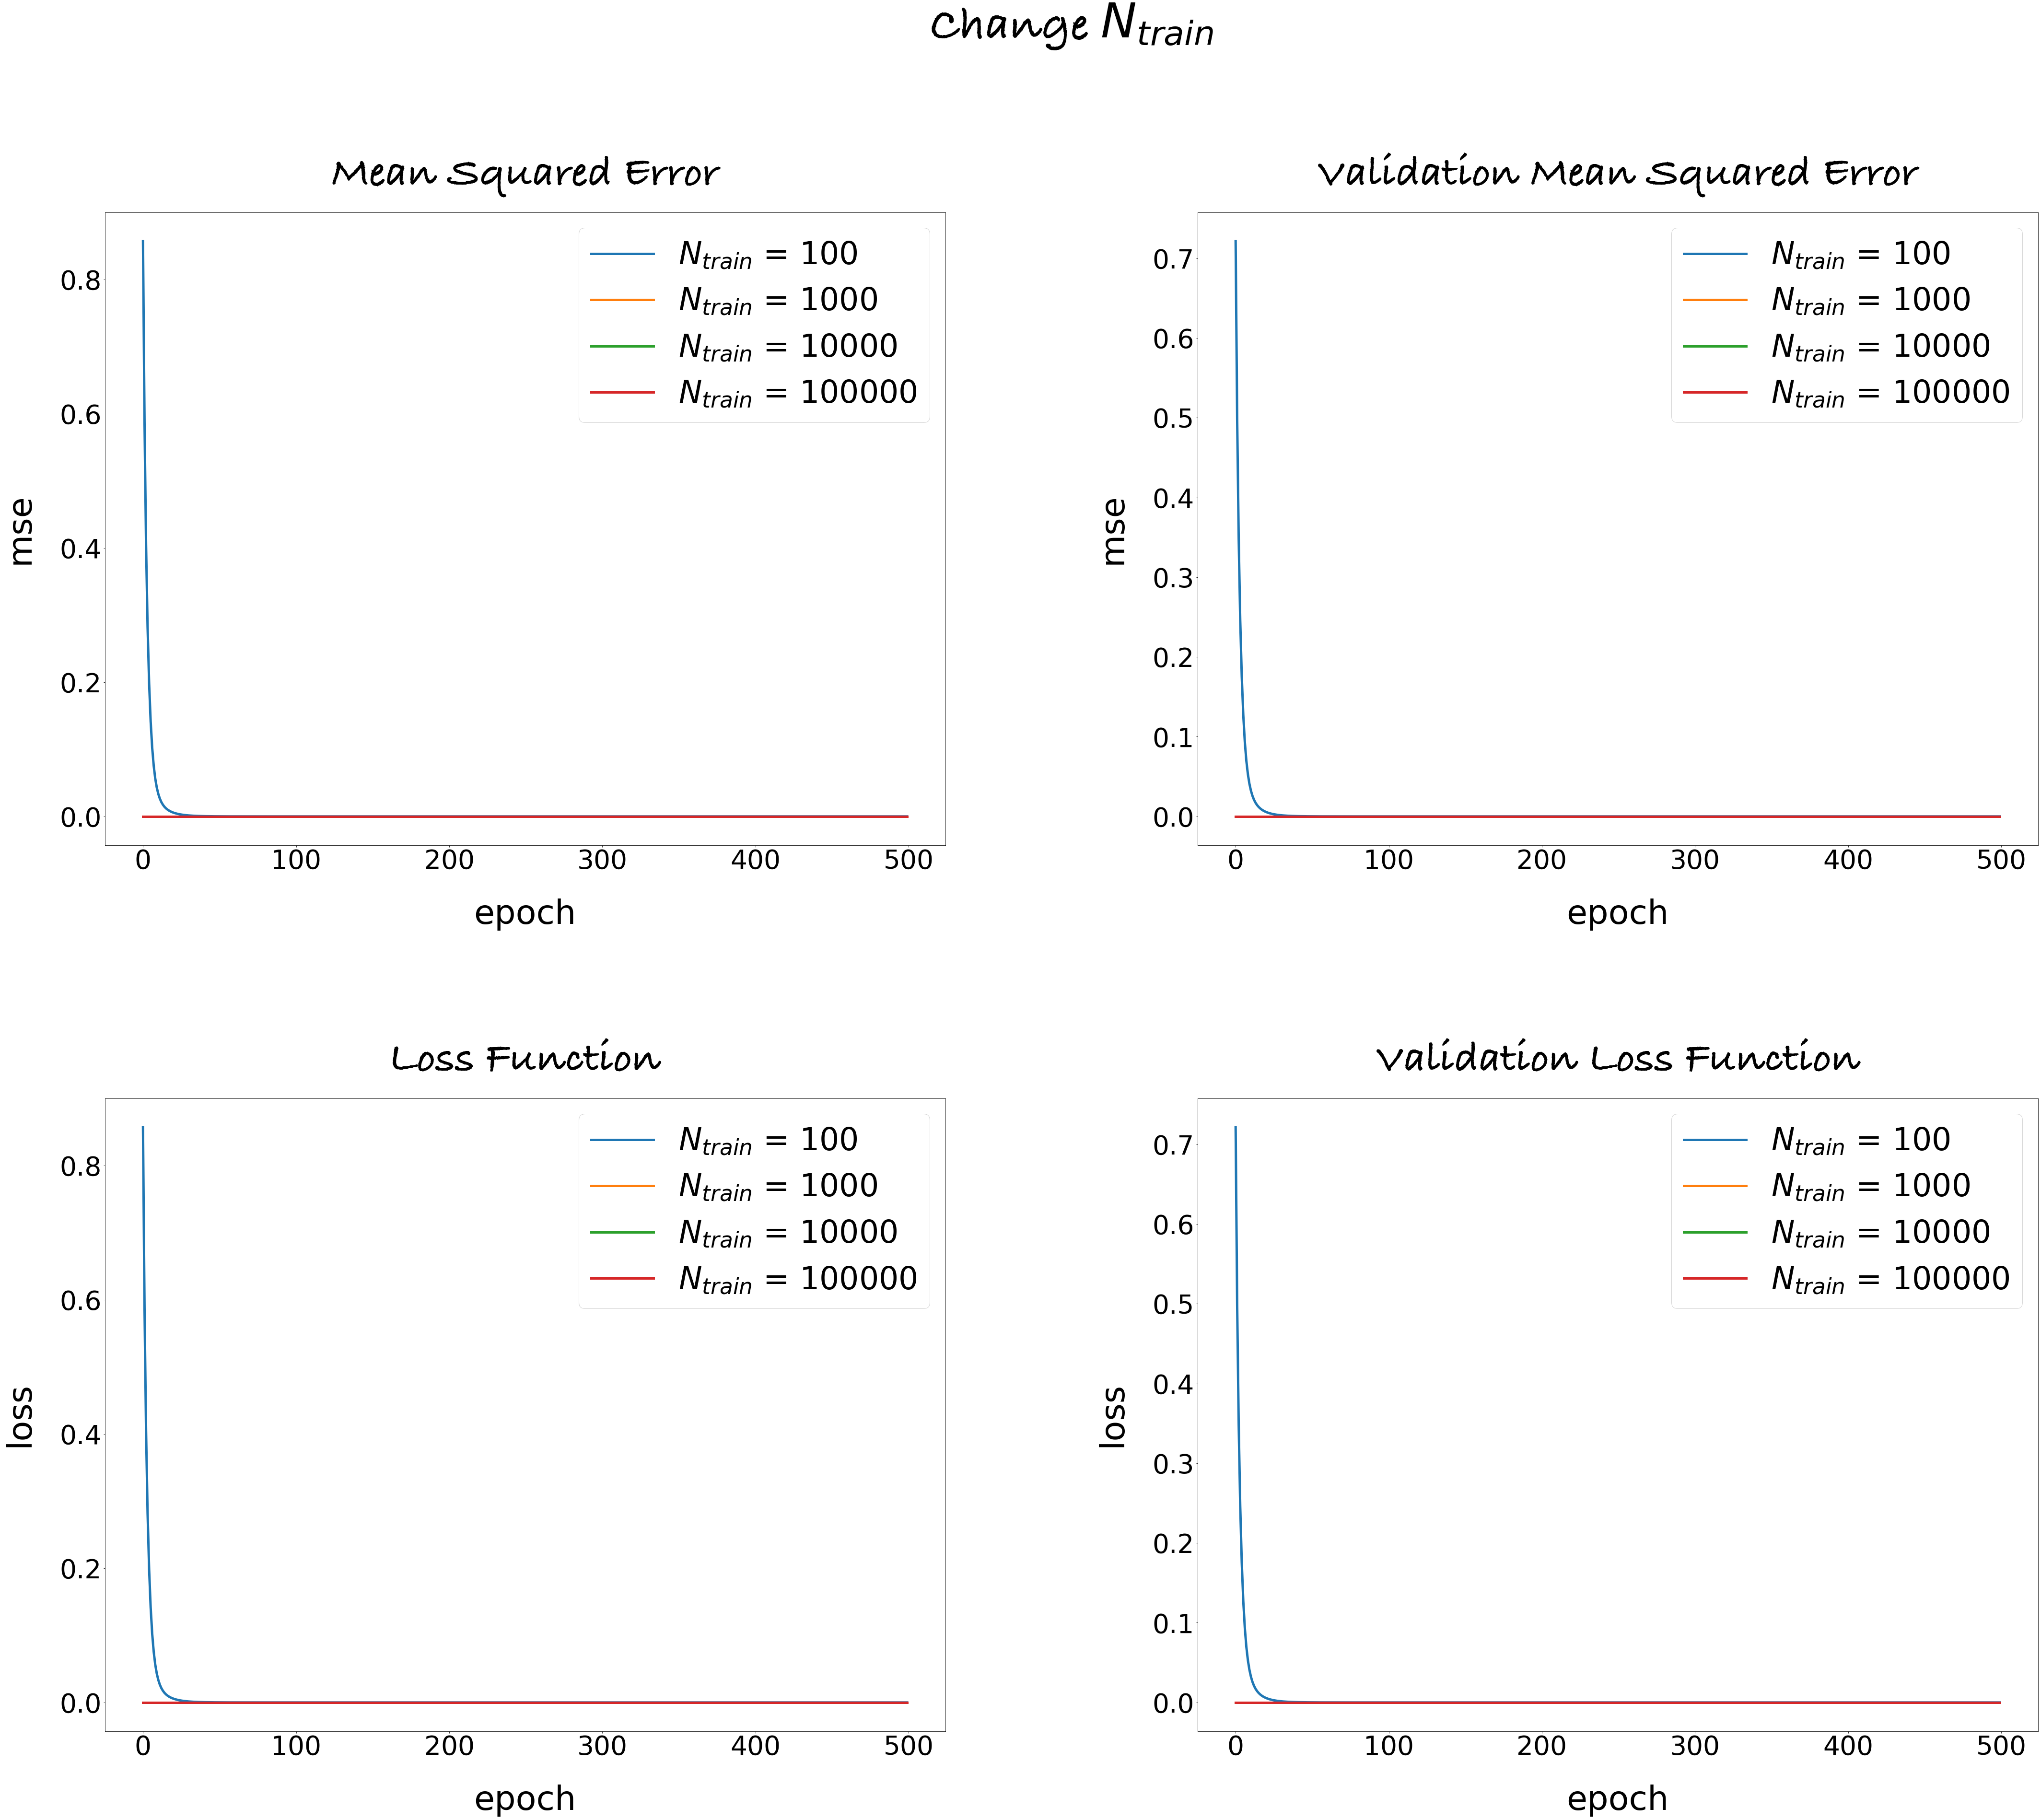

In [10]:
#plots
plt.figure(figsize=[70, 55])  #deafult (6.4,4.8)
plt.suptitle('Change $ N_{train} $', y=1.01, fontname = 'Bradley Hand', fontsize=100)

plt.subplot(2, 2, 1)
plt.title('Mean Squared Error', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('epoch', fontsize=70, labelpad=50)
plt.ylabel('mse', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
for t in range(len(N_train_data)):
    plt.plot(history[t].history['mse'], lw=5.0, label='$N_{train}$ = '+str(N_train_data[t]))
plt.legend(fontsize=65, loc='best')

plt.subplot(2, 2, 2)
plt.title('Validation Mean Squared Error', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('epoch', fontsize=70, labelpad=50)
plt.ylabel('mse', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
for t in range(len(N_train_data)):
    plt.plot(history[t].history['val_mse'], lw=5.0, label='$N_{train}$ = '+str(N_train_data[t]))
plt.legend(fontsize=65, loc='best')

plt.subplot(2, 2, 3)
plt.title('Loss Function', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('epoch', fontsize=70, labelpad=50)
plt.ylabel('loss', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
for t in range(len(N_train_data)):
    plt.plot(history[t].history['loss'], lw=5.0, label='$N_{train}$ = '+str(N_train_data[t]))
plt.legend(fontsize=65, loc='best')

plt.subplot(2, 2, 4)
plt.title('Validation Loss Function', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('epoch', fontsize=70, labelpad=50)
plt.ylabel('loss', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
for t in range(len(N_train_data)):
    plt.plot(history[t].history['val_loss'], lw=5.0, label='$N_{train}$ = '+str(N_train_data[t]))
plt.legend(fontsize=65, loc='best')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
plt.show()

In [11]:
#weights
print('\t\t\t\t =====================================')
print('\t\t\t\t    Weights values for each N_train')
print('\t\t\t\t =====================================')
for t in range(len(N_train_data)):
    print('\t\t\t\t\t N_train = ',str(N_train_data[t]))
    print('\t\t\t\t\t m =',weights[t][0][0][0], '\t b =',weights[t][1][0], '\n')

				    Weights values for each N_train
					 N_train =  100
					 m = 1.9999952 	 b = 0.99999976 

					 N_train =  1000
					 m = 1.9999952 	 b = 0.9999998 

					 N_train =  10000
					 m = 1.9999952 	 b = 0.9999998 

					 N_train =  100000
					 m = 1.9999952 	 b = 0.9999998 



I read again the best choice for $ N_{train} $ from the weights at the end of the training, being the curves related to the metrics difficult to distinguish in the final part of the training phase.
The best choice would seem to be $ N_{train} = [10^3, 10^4, 10^5] $ in the same  way, so I take the smaller value in order to speed up the duration of the training while obtaining the same precision.


Finally I study how the training change by 'getting dirty' the dataset with some noise (as described at the beginning), considering $ \sigma = [0.0, 0.01, 0.1, 0.5, 1.0, 5.0] $ and the previously optimized hyper-parameters $ N_{epoch} = 500 $ and $ N_{train} = 10^3 $ using mini batches of size $ 100 $.

In [12]:
############################
#Neural Network
#Training of the NN
############################
'''
    
    ====================
    Change sigma
    ====================
    N_epoch = 500
    N_train = 10^3
    Batch size = 100
    
'''
###
#Training
###
Neural_Network = tf.keras.models.load_model('1N_FFNN_11.1')  #load the starting model
N_epoch_opt = 500
N_train_opt = 10**3
batch_sizes_opt = 100
history = []
weights = []
for s in range(len(sigma)):
    print('Train with \sigma =',sigma[s],'...')
    history.append(Neural_Network.fit(x_train[0:N_train_opt], y_train_sigma[s][0:N_train_opt],
                                      epochs=N_epoch_opt, initial_epoch=0,
                                      batch_size=batch_sizes_opt, 
                                      validation_data=(x_valid, y_valid_sigma[s]), 
                                      shuffle=True, verbose=0)
                  )
    print('Save the optimized weights\n')
    weights.append(Neural_Network.get_weights())

Train with \sigma = 0.0 ...
Save the optimized weights

Train with \sigma = 0.01 ...
Save the optimized weights

Train with \sigma = 0.1 ...
Save the optimized weights

Train with \sigma = 0.5 ...
Save the optimized weights

Train with \sigma = 1.0 ...
Save the optimized weights

Train with \sigma = 5.0 ...
Save the optimized weights



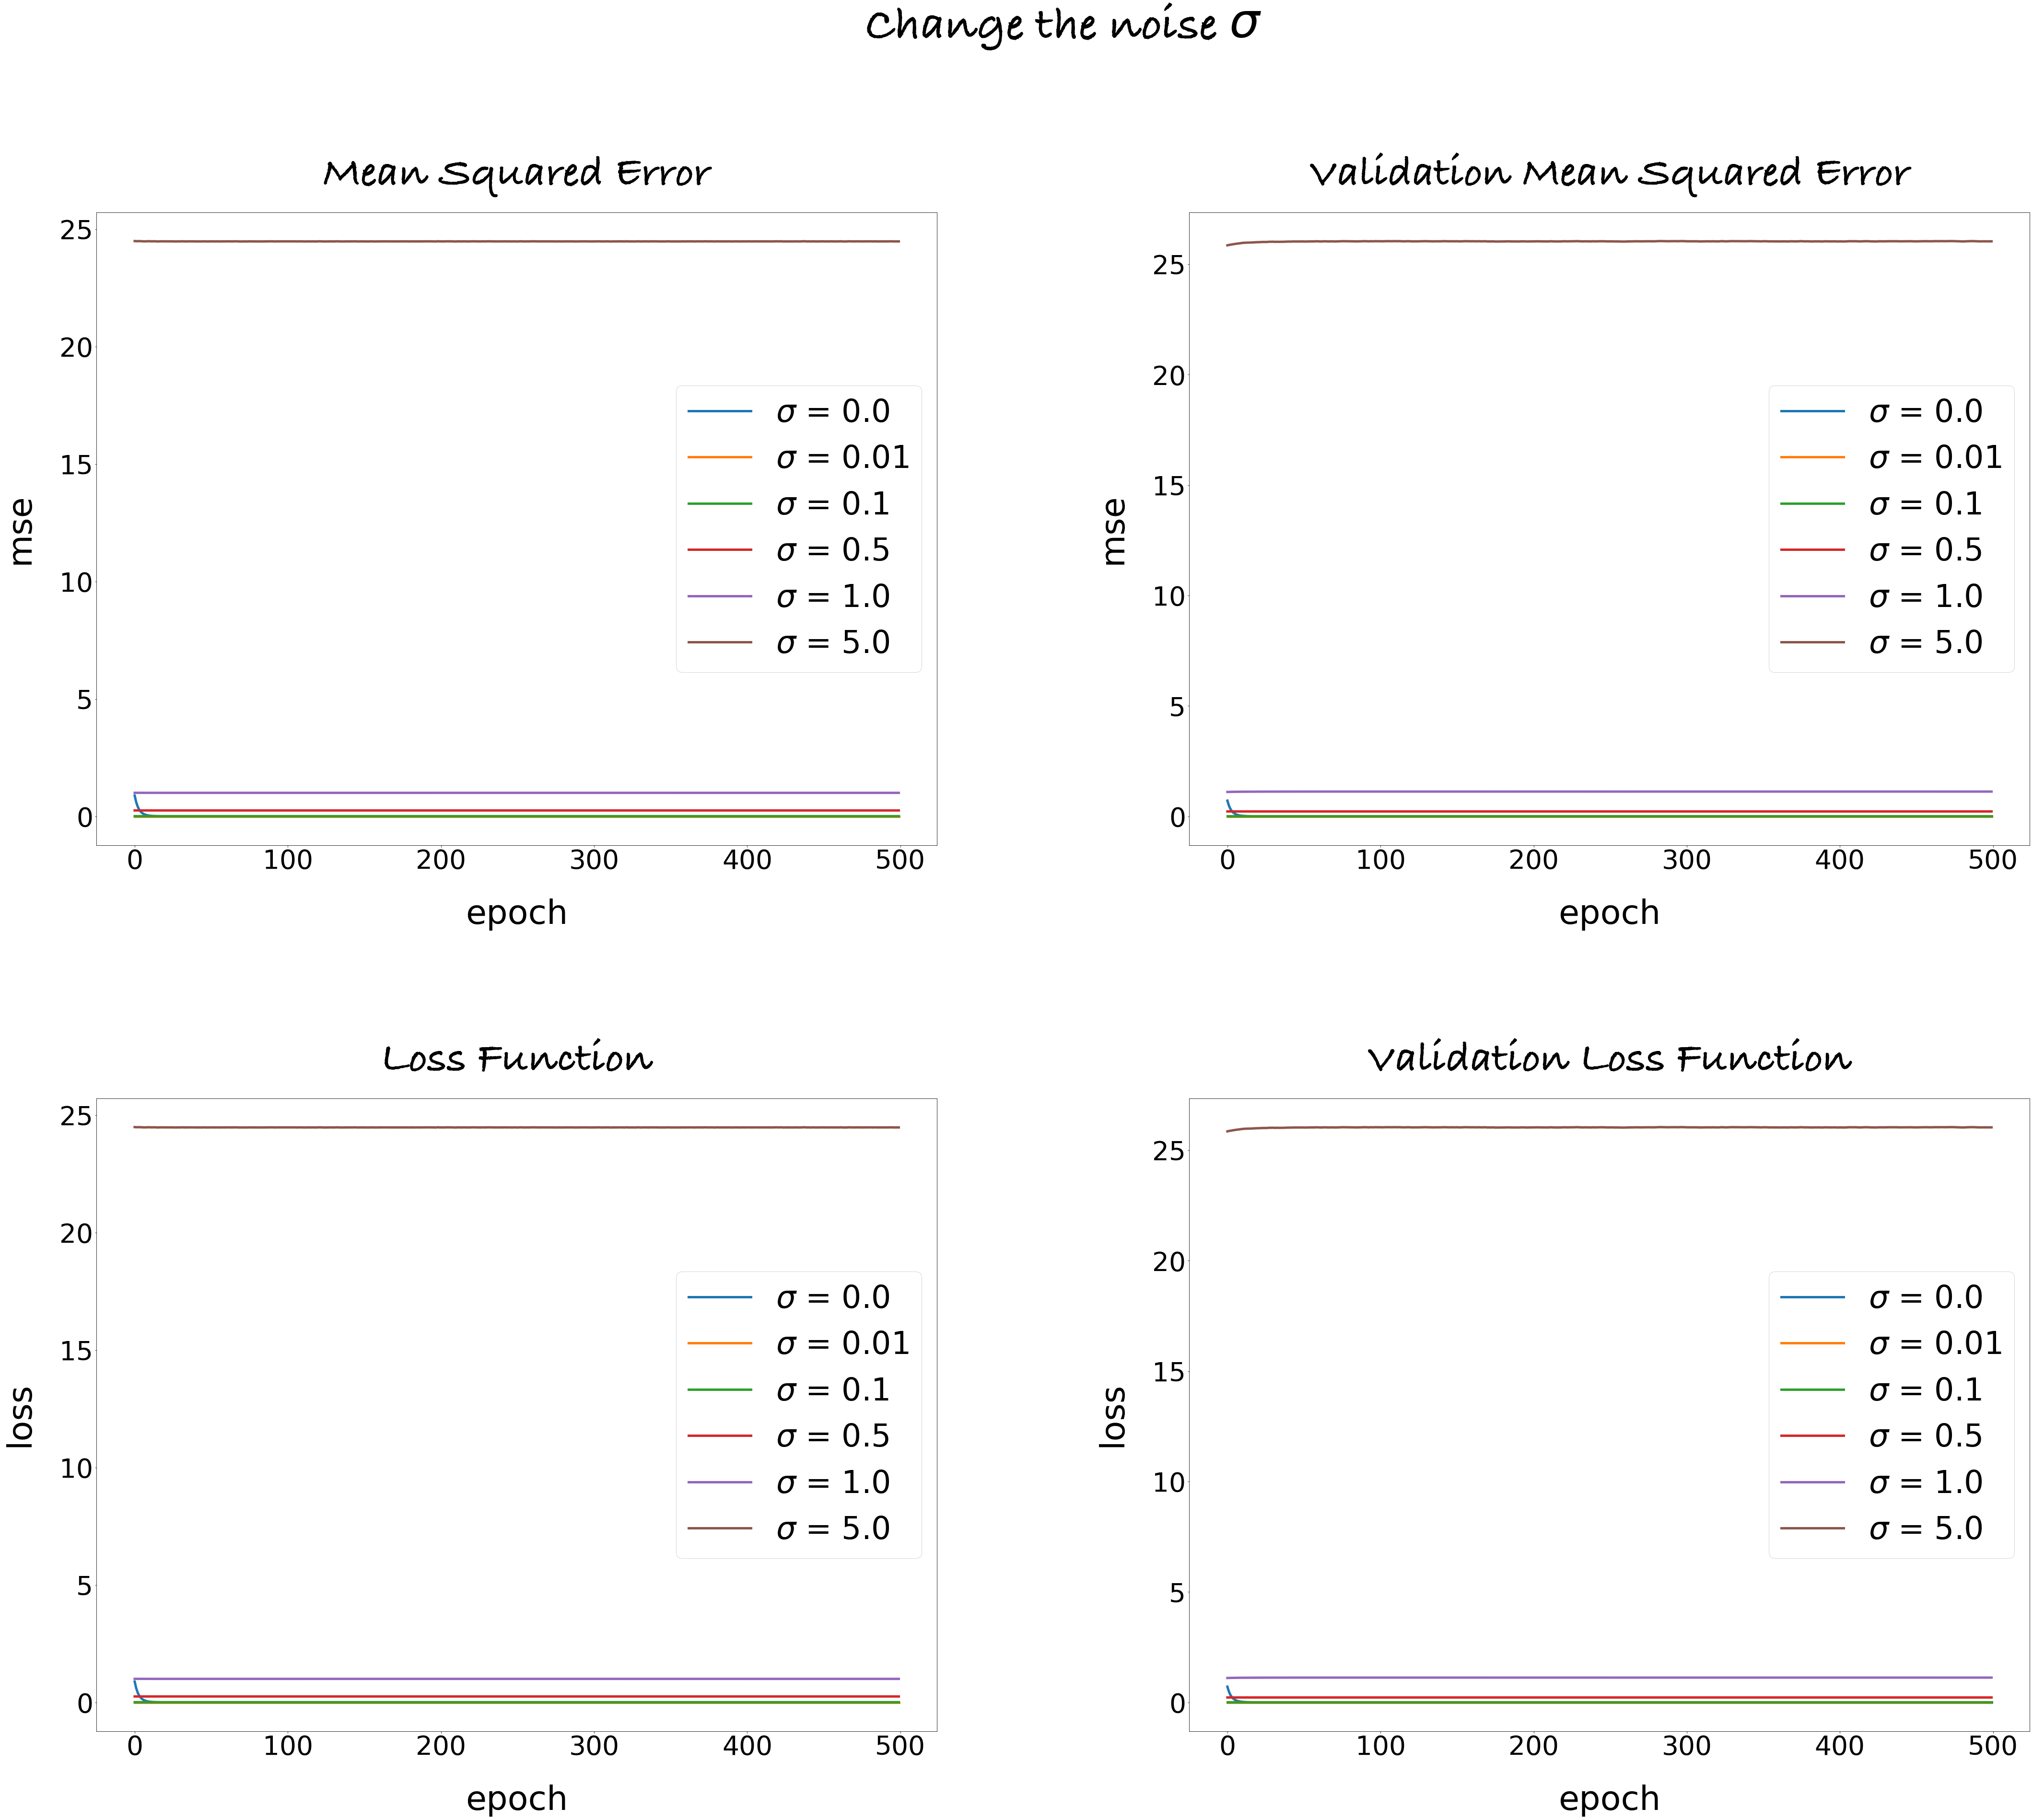

In [13]:
#plots
plt.figure(figsize=[70, 55])  #deafult (6.4,4.8)
plt.suptitle('Change the noise $ \sigma $', y=1.01, fontname = 'Bradley Hand', fontsize=100)

plt.subplot(2, 2, 1)
plt.title('Mean Squared Error', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('epoch', fontsize=70, labelpad=50)
plt.ylabel('mse', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
for s in range(len(sigma)):
    plt.plot(history[s].history['mse'], lw=5.0, label='$\sigma$ = '+str(sigma[s]))
plt.legend(fontsize=65, loc='best')

plt.subplot(2, 2, 2)
plt.title('Validation Mean Squared Error', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('epoch', fontsize=70, labelpad=50)
plt.ylabel('mse', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
for s in range(len(sigma)):
    plt.plot(history[s].history['val_mse'], lw=5.0, label='$\sigma$ = '+str(sigma[s]))
plt.legend(fontsize=65, loc='best')

plt.subplot(2, 2, 3)
plt.title('Loss Function', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('epoch', fontsize=70, labelpad=50)
plt.ylabel('loss', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
for s in range(len(sigma)):
    plt.plot(history[s].history['loss'], lw=5.0, label='$\sigma$ = '+str(sigma[s]))
plt.legend(fontsize=65, loc='best')

plt.subplot(2, 2, 4)
plt.title('Validation Loss Function', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('epoch', fontsize=70, labelpad=50)
plt.ylabel('loss', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
for s in range(len(sigma)):
    plt.plot(history[s].history['val_loss'], lw=5.0, label='$\sigma$ = '+str(sigma[s]))
plt.legend(fontsize=65, loc='best')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
plt.show()

In [14]:
#weights
print('\t\t\t\t =====================================')
print('\t\t\t\t     Weights values for each sigma')
print('\t\t\t\t =====================================')
for s in range(len(sigma)):
    print('\t\t\t\t\t sigma = ',str(sigma[s]))
    print('\t\t\t\t\t m =',weights[s][0][0][0], '\t b =',weights[s][1][0], '\n')

				     Weights values for each sigma
					 sigma =  0.0
					 m = 1.9999931 	 b = 0.9999999 

					 sigma =  0.01
					 m = 2.000059 	 b = 0.9999421 

					 sigma =  0.1
					 m = 1.9976634 	 b = 1.0019357 

					 sigma =  0.5
					 m = 1.9980363 	 b = 0.98870325 

					 sigma =  1.0
					 m = 2.049302 	 b = 0.95462966 

					 sigma =  5.0
					 m = 1.862789 	 b = 0.911057 



<img src="11.1_final_dataset.jpg" width="400" align='right'>
From the graphs above it appears evident that using a noise greater than $ 0.1 $ the NN is unable to minimize the metrics and obtain optimal values for the parameters of the linear fit; the best results are those related to the case with $ \sigma = 0.0 $ and $ \sigma = 0.01 $. 
I decide to use this last value to carry out a last training of the single neuron that composes the neural network (on the right there is an image of the final training dataset used) and I try to predict the $ f(x) $ related to data points never seen before by the NN, in order to evaluate the efficiency of the hyper-parameters modifications I made in this first exercise.

In [15]:
####################
#Final Training
#Linear Regression
####################
y_train = y_train_sigma[1][0:N_train_opt]
y_valid = y_valid_sigma[1][0:N_train_opt]
Neural_Network = tf.keras.models.load_model('1N_FFNN_11.1')  #load the starting model

print('\nStart Training')
history_f = Neural_Network.fit(x_train[0:N_train_opt], y_train, 
                    epochs=N_epoch_opt, initial_epoch=0, batch_size=100,
                    validation_data=(x_valid[0:N_train_opt], y_valid), shuffle=True, verbose=0)
weights_f=Neural_Network.get_weights()
print('End Training\n')
print('Prediction\n')
y_predicted = Neural_Network.predict(x_predicted, verbose=0)


Start Training
End Training

Prediction




						 Weights
					 Neural Network
					 m = 2.0000553 	 b = 0.9999384

					 Target
					 m = 2 		 b = 1





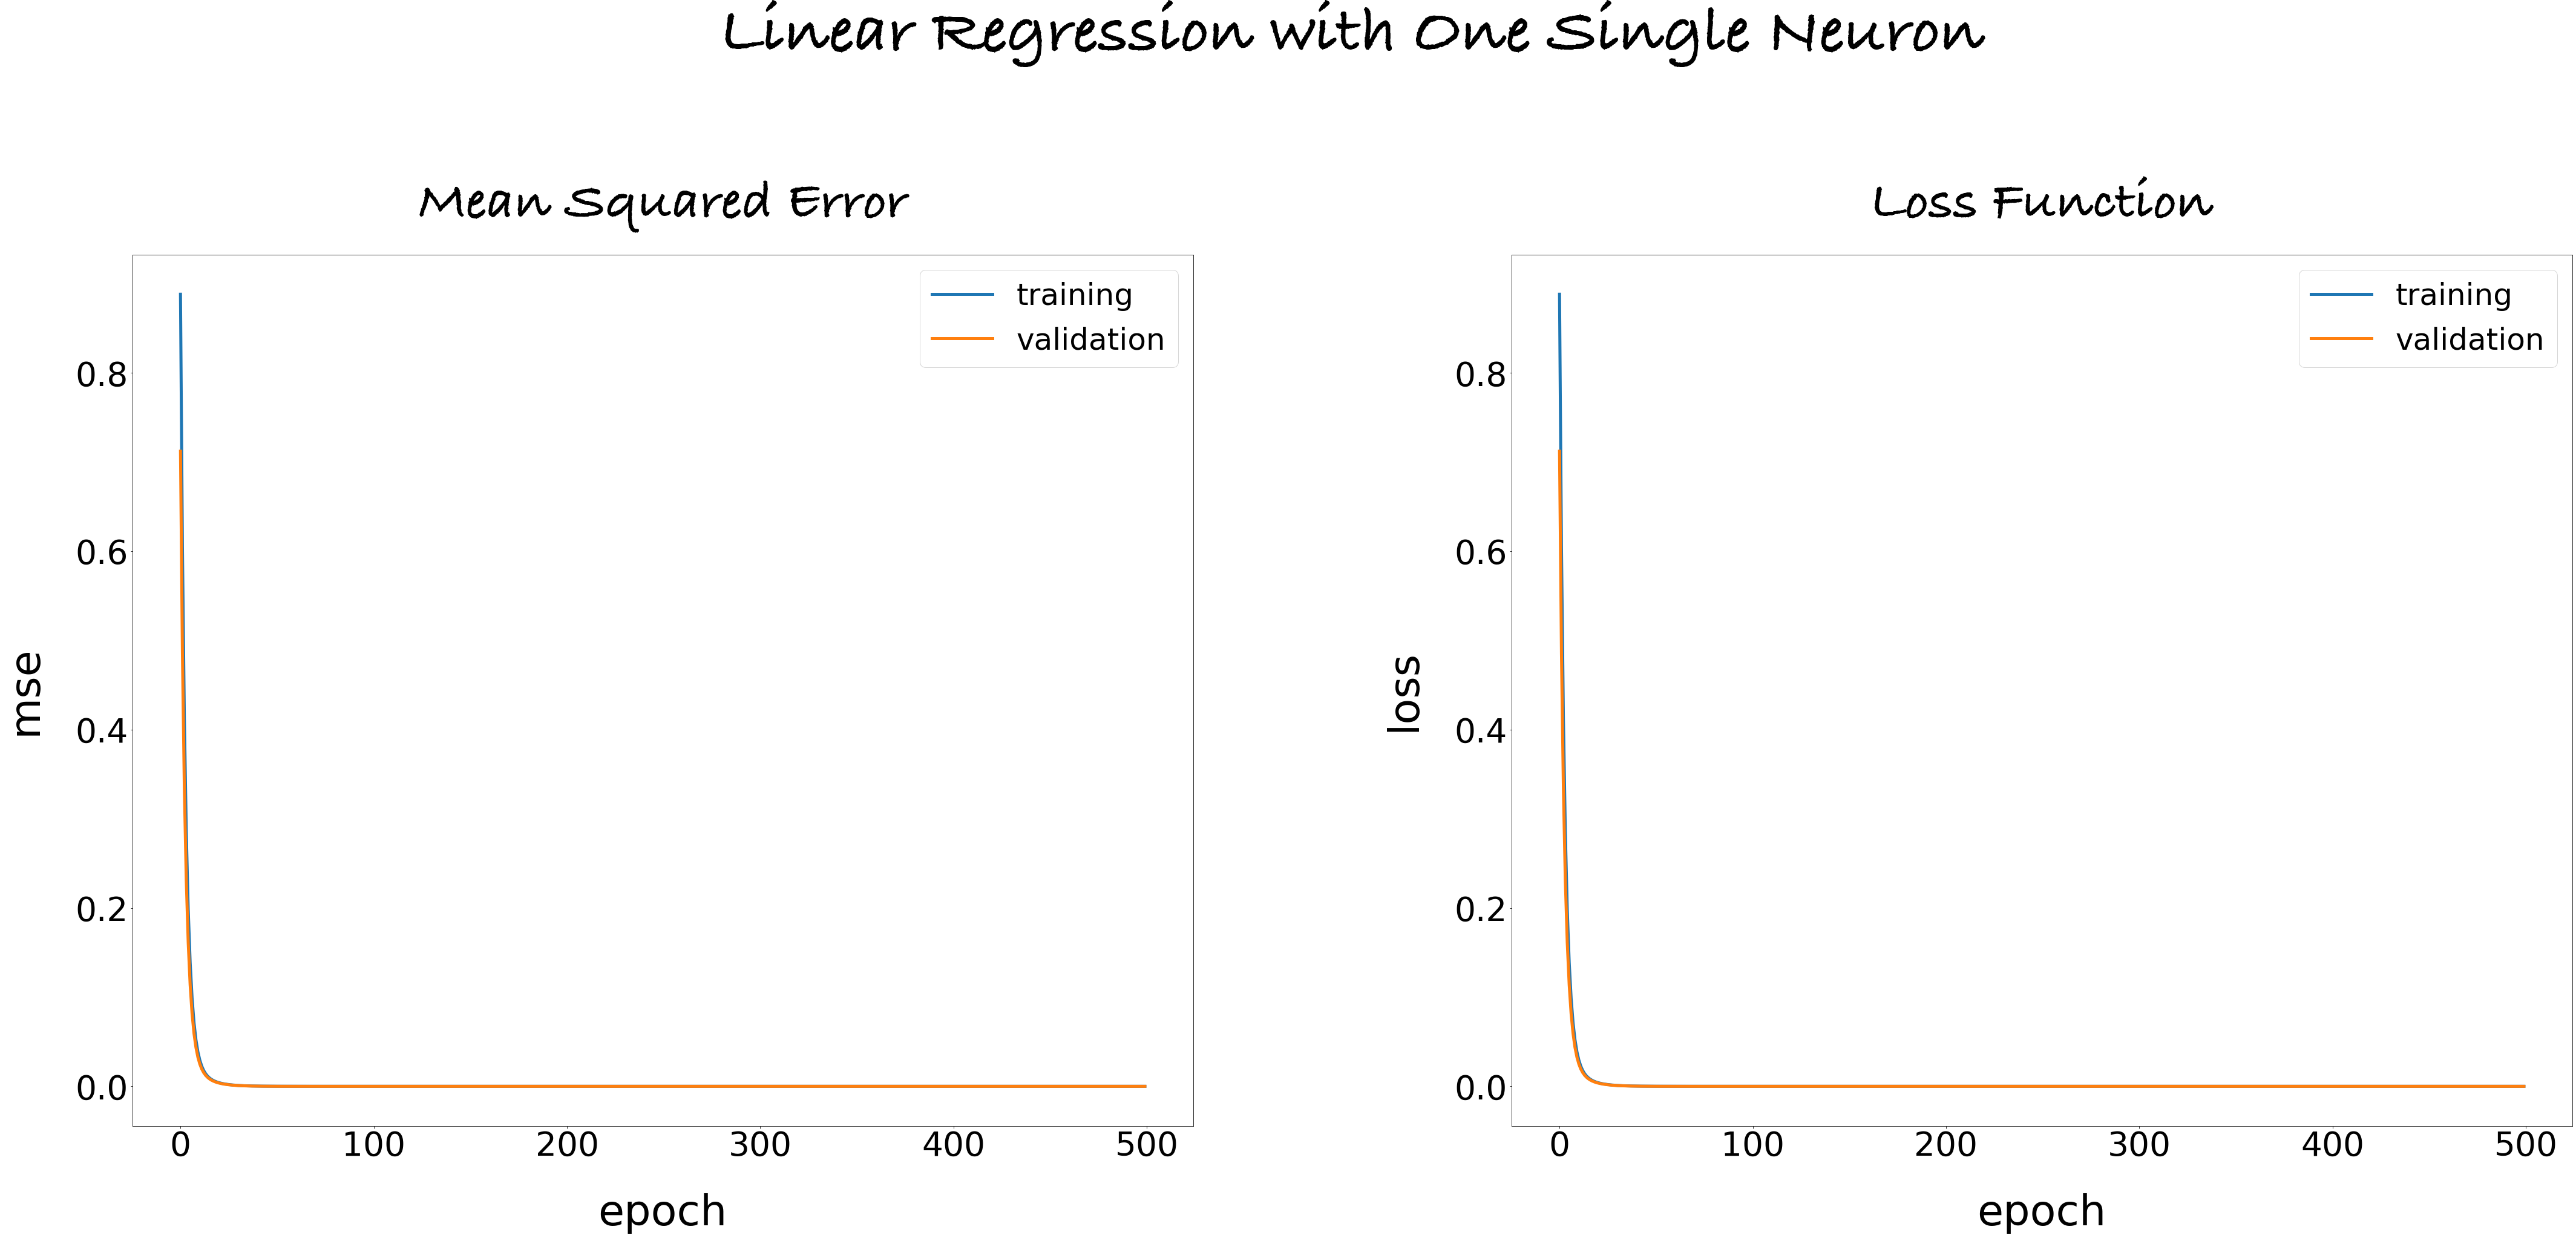

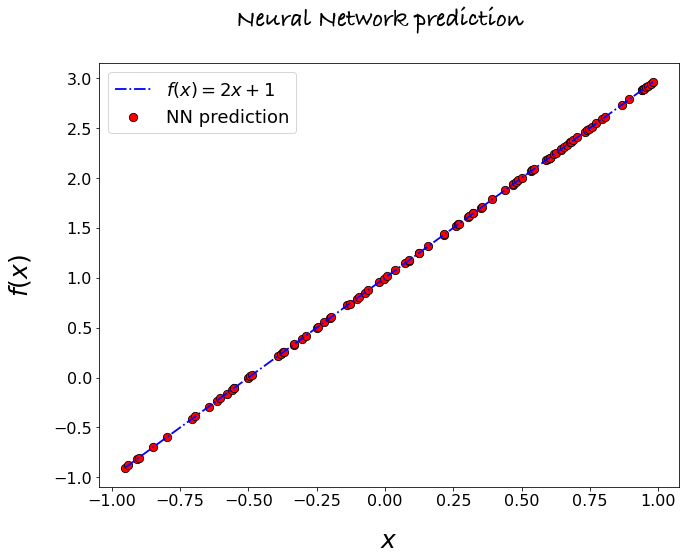

In [16]:
print('\n\t\t\t\t\t=========================')
print('\t\t\t\t\t\t Weights')
print('\t\t\t\t\t=========================')
print('\t\t\t\t\t Neural Network')
print('\t\t\t\t\t m =',weights_f[0][0][0], '\t b =',weights_f[1][0])
print('\n\t\t\t\t\t Target')
print('\t\t\t\t\t m =', m, '\t\t b =',b)
print('\n\n')

###################
#plots
###################
#Cost Function
plt.figure(figsize=[70, 25])  #deafult (6.4,4.8)
plt.suptitle('Linear Regression with One Single Neuron', y=1.13, fontname = 'Bradley Hand', fontsize=110)

plt.subplot(1, 2, 1)
plt.title('Mean Squared Error', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('epoch', fontsize=70, labelpad=50)
plt.ylabel('mse', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.plot(history_f.history['mse'], lw=5.0, label='training')
plt.plot(history_f.history['val_mse'], lw=5.0, label='validation')
plt.legend(fontsize=50, loc='best')

plt.subplot(1, 2, 2)
plt.title('Loss Function', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('epoch', fontsize=70, labelpad=50)
plt.ylabel('loss', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.plot(history_f.history['loss'], lw=5.0, label='training')
plt.plot(history_f.history['val_loss'], lw=5.0, label='validation')
plt.legend(fontsize=50, loc='best')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
plt.show()

print('\n')

plt.figure(figsize=[10.4, 7.8]) #deafult (6.4,4.8)
plt.suptitle('Neural Network prediction', fontname = 'Bradley Hand', fontsize=25)
plt.xlabel('$x$', fontsize=25, labelpad=20)
plt.ylabel('$f(x)$', fontsize=25, labelpad=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(x_predicted, y_target, color='b', linewidth=1.8, linestyle='dashdot', label='$f(x) = 2x + 1$')
plt.scatter(x_predicted, y_predicted, color='r', marker="o", s=70,
            edgecolor='black', linewidths=0.8, label='NN prediction')
plt.legend(fontsize=18, loc='best')
plt.show()

Through the tuning just done of the main hyper-parameters of the problem I have managed to improve the prediction of the Neural Network, as you can see from the last plot. <br>
Obviously the case of linear regression is particularly simple in this exercise: having used no activation function and taking only one neuron, the latter applies exactly the linear law that we are looking for to the input data: multiply by its only weight (the angular coefficient $ m $), and add to this result the only bias (the intersection at the origin $ b $), and that's it! <br>
In the following exercises the task will become more complicated.

## <font color='blue'>Exercise 11.2</font>

The goal of this exercise is to fit the following third order polynomial (left figure):
<img src="11.2_target_func.jpg" width="400" align='left'>

$$ f(x)=4-3x-2x^2+3x^3 $$ 

for $ x \in [-1,1] $. <br>
Being no longer in the linear case it is necessary to change the depth of the Neural Network compared to the case of the previous exercise, i.e. better investigate the hyper-parameters related to the number of layers that make up the network and the width of these layers; no less important will be choosing an appropriate activation function.


The first study that I do is the following: I create a feedforward NN in which the first layer (the *input layer*) consists of a single neuron that taken each single data point $ x $ and feeds it to $ N_{hidden} = [1, 2, 3, 4] $ **deep layer**, each built up by $ 2 $ neurons; the final result will then be managed by a single last *output neuron*.<br>
I want to comment more precisely on a question that arises at this point: activation functions are a critical part of the design of a Neural Network. The choice of activation function in the *hidden layer* will control how well the network model learns the training dataset; the choice of activation function in the output layer will define the type of predictions the model can make.
<img src="ReLU.png" width="400" align='right'>
As such, a careful choice of activation function must be made for each **Deep Neural Network (DNN)** that one would like to build.<br>
I use the *Rectified Linear activation function (ReLU)*, which is a differentiable nonlinear activation function, for all the *hidden neurons* of my starting neural network. This is a common choice and allows the model to learn more complex functions than a network trained using a linear activation function. The ReLU function is calculated as follows:

$$ max(0, x) $$

i.e. if the input value $ x $ is negative, then a value $ 0.0 $ is returned, otherwise, the value is returned (see figure at the right side). I use this activation function because compared to others it is not subject to some problems related to stochastic optimization based on the gradient of the cost function: for example both the *Sigmoid* and the *Tanh* activation functions can make the model more susceptible to problems during training, via the so-called *vanishing gradients* problem.<br>
For what concerns the *input neuron*, as well as the *output neuron*, I choose to use a *linear activation function*, which does not modify the output generated by the neuron through the use of weights and biases only. In regression cases this choice is typically the most reasonable.

So I build four different models of DNN, each with its depth as described before, and I train these different models in order to understand how the amount of hidden layers changes the optimization of the NN parameters. As for the number of epochs and the size of the training dataset I try to keep the optimized values in the previous exercise, which I will eventually change later.

In [17]:
############################
#Non Linear Fit
#Parameters and Data Sets
############################
# target parameters of f(x) = ax^3 + bx^2 + cx + d
a = 3
b = -2
c = -3
d = 4

#dimension of the various data sets
N_train = 10**3  #training data set
N_valid = 10**2  #validation data set
N_predicted_in = 10**2  #unseen new data
                        #in the training range
N_predicted_out = 50  #unseen new data
                      #out of the training range

#hyperparameters
N_epoch = 500
batch_dim = 100

#creation of data sets
np.random.seed(0)

x_target = np.random.uniform(-5, 5, N_train)
x_target.sort()
y_target = a*np.power(x_target, 3) + b*np.power(x_target, 2) + c*x_target + d

x_train = np.random.uniform(-1, 1, N_train)
y_train = a*np.power(x_train, 3) + b*np.power(x_train, 2) + c*x_train + d
x_valid = np.random.uniform(-1, 1, N_valid)
y_valid = a*np.power(x_valid, 3) + b*np.power(x_valid, 2) + c*x_valid + d
x_predicted_in = np.random.uniform(-1, 1, N_predicted_in)
x1_predicted_out = np.random.uniform(-5, -1, int(N_predicted_out/2))
x2_predicted_out = np.random.uniform(1, 5, int(N_predicted_out/2))

In [18]:
############################
#Neural Network creation
#Change the depth of the DNN
############################
'''
    
    ====================
    Change N_hidden
    ====================
    N_epoch = 500
    N_train = 10^3
    Batch size = 100
    noise = 0
    
'''
print('Create the four DNN models\n')
N_hidden = [1, 2, 3, 4]
models_depth = []
for Nmod in range(len(N_hidden)):
    models_depth.append(Sequential(name='1st_DNN_hidden_'+str(N_hidden[Nmod])))
for k in range(len(models_depth)):
    models_depth[k].add(Input(shape=(1,)))  #One Input Neuron
                                            #the input is the single x_i
    #Hidden structure
    for hidden in range(N_hidden[k]):
        models_depth[k].add(Dense(2, activation='relu'))
                                       
    models_depth[k].add(Dense(1, activation='linear'))  #One Output Neuron to compare
                                                        #with the target y_i
    models_depth[k].compile(optimizer='sgd', loss='mse', metrics=['mse'])
    models_depth[k].summary()
    print('\n')

Create the four DNN models

Model: "1st_DNN_hidden_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 4         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


Model: "1st_DNN_hidden_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2)                 4         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3         


In [19]:
###
#training
###
history_depth = []
for t in range(len(N_hidden)):
    print('Start training of model',t+1)
    history_depth.append(models_depth[t].fit(x_train, y_train, batch_size=batch_dim,
                                             epochs=N_epoch, initial_epoch=0,
                                             validation_data=(x_valid, y_valid),
                                             shuffle=True, verbose=0)
                        )
    print('Training complete\n')

Start training of model 1
Training complete

Start training of model 2
Training complete

Start training of model 3
Training complete

Start training of model 4
Training complete



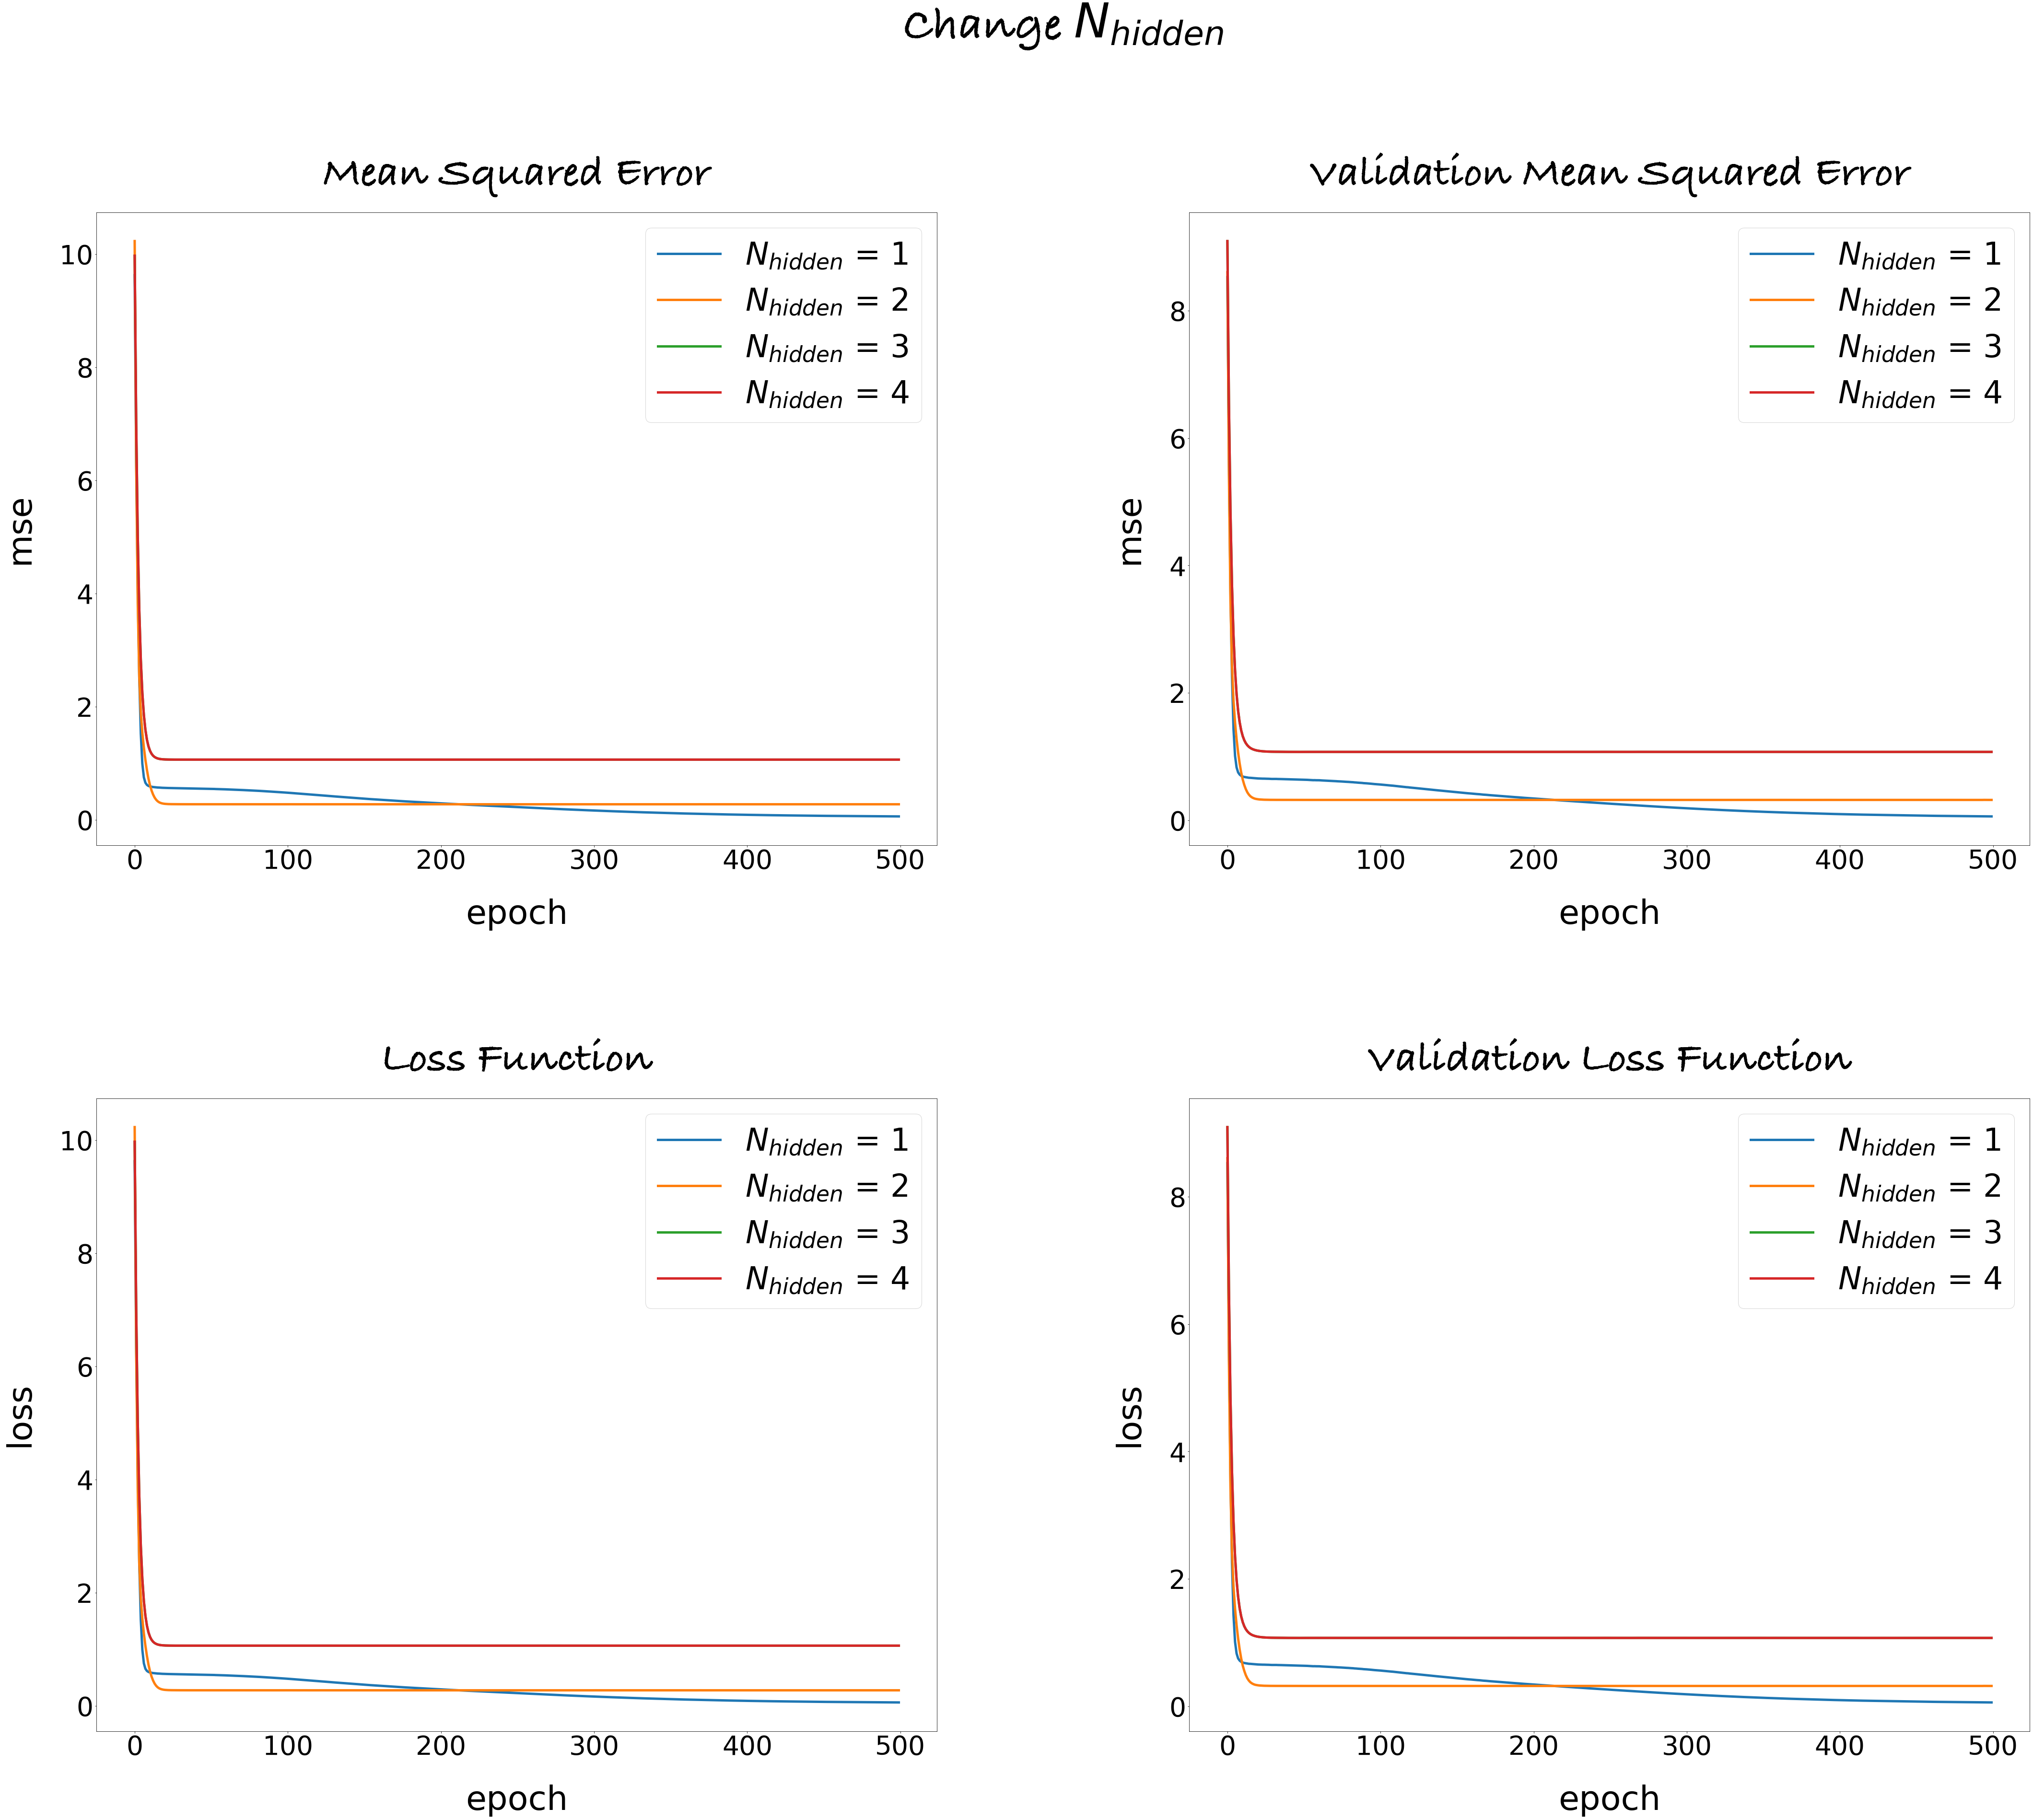

In [20]:
#plots
plt.figure(figsize=[70, 55])  #deafult (6.4,4.8)
plt.suptitle('Change $ N_{hidden} $', y=1.01, fontname = 'Bradley Hand', fontsize=100)

plt.subplot(2, 2, 1)
plt.title('Mean Squared Error', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('epoch', fontsize=70, labelpad=50)
plt.ylabel('mse', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
for t in range(len(N_hidden)):
    plt.plot(history_depth[t].history['mse'], lw=5.0, label='$N_{hidden}$ = '+str(N_hidden[t]))
plt.legend(fontsize=65, loc='best')

plt.subplot(2, 2, 2)
plt.title('Validation Mean Squared Error', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('epoch', fontsize=70, labelpad=50)
plt.ylabel('mse', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
for t in range(len(N_hidden)):
    plt.plot(history_depth[t].history['val_mse'], lw=5.0, label='$N_{hidden}$ = '+str(N_hidden[t]))
plt.legend(fontsize=65, loc='best')

plt.subplot(2, 2, 3)
plt.title('Loss Function', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('epoch', fontsize=70, labelpad=50)
plt.ylabel('loss', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
for t in range(len(N_hidden)):
    plt.plot(history_depth[t].history['loss'], lw=5.0, label='$N_{hidden}$ = '+str(N_hidden[t]))
plt.legend(fontsize=65, loc='best')

plt.subplot(2, 2, 4)
plt.title('Validation Loss Function', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('epoch', fontsize=70, labelpad=50)
plt.ylabel('loss', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
for t in range(len(N_hidden)):
    plt.plot(history_depth[t].history['val_loss'], lw=5.0, label='$N_{hidden}$ = '+str(N_hidden[t]))
plt.legend(fontsize=65, loc='best')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
plt.show()

I also make a comparison with the predictions made by the various models once done the training.

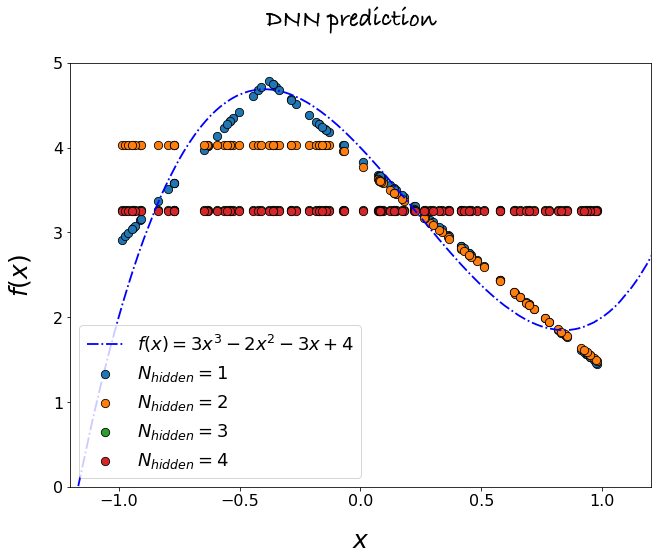

In [21]:
#prediction
y_predicted_depth = []
for Nmod in range(len(N_hidden)):
    y_predicted_depth.append(models_depth[Nmod].predict(x_predicted_in, verbose=0))

plt.figure(figsize=[10.4, 7.8]) #deafult (6.4,4.8)
plt.suptitle('DNN prediction', fontname = 'Bradley Hand', fontsize=25)
plt.xlabel('$x$', fontsize=25, labelpad=20)
plt.ylabel('$f(x)$', fontsize=25, labelpad=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(-1.2, 1.2)
plt.ylim(0, 5)
plt.plot(x_target, y_target, color='b', linewidth=1.8, 
         linestyle='dashdot', label='$f(x) = 3x^3 - 2x^2 - 3x + 4$')
for j in range(len(N_hidden)):
    plt.scatter(x_predicted_in, y_predicted_depth[j], marker="o", s=70,
                edgecolor='black', linewidths=0.8, label='$N_{hidden} = $'+str(N_hidden[j]))
plt.legend(fontsize=18, loc='lower left')
plt.show()

With the help of the graphs just shown it seems clear that the cases with $ 4 $ hidden layers does not lead to a good minimization of the metrics, while $ N_{hidden} = 1, 2, 3 $ leads to a good minimization but also a better prediction. I decide to try to fix the number of hidden layers to $ 2 $.<br>
I work now on the width of each layer, to increase the number of total parameters and have a greater expressivity with the network architecture. For this purpose I create again some models: in each of these I vary the number of neurons in each hidden layer by taking $ N_{neurons} = [4, 10, 15, 30, 50, 100] $ (the $ 3 $ layers of each DNN have equal width so far). I run an analysis to evaluate the efficiency of the various architectures as I did before.

In [22]:
############################
#Neural Network creation
#Change the width of the 
#hidden layers
############################
'''
    
    ====================
    Change N_neurons
    ====================
    N_epoch = 500
    N_train = 10^3
    N_hidden = 2
    Batch size = 100
    noise = 0
    
'''
numberHiddenLayers = 2
N_neurons = [4, 10, 15, 30, 50, 100]
models_width = []
print('Create the DNN models\n')
for Nmod in range(len(N_neurons)):
    models_width.append(Sequential(name='2nd_DNN_width_'+str(N_neurons[Nmod])))
for k in range(len(models_width)):
    models_width[k].add(Input(shape=(1,)))  #One Input Neuron
                                            #the input is the single x_i
    #Hidden structure
    for hidden in range(numberHiddenLayers):
        models_width[k].add(Dense(N_neurons[k], activation='relu'))
                                       
    models_width[k].add(Dense(1, activation='linear'))  #One Output Neuron to compare
                                   #with the target y_i
    models_width[k].compile(optimizer='sgd', loss='mse', metrics=['mse'])
    models_width[k].summary()
    print('\n')

Create the DNN models

Model: "2nd_DNN_width_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 4)                 8         
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 5         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


Model: "2nd_DNN_width_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_19 (Dense)             (None, 10)                110       
____

In [23]:
###
#training
###
history_width = []
for t in range(len(N_neurons)):
    print('Start training of model',t+1)
    history_width.append(models_width[t].fit(x_train, y_train, batch_size=batch_dim,
                                             epochs=N_epoch, initial_epoch=0,
                                             validation_data=(x_valid, y_valid),
                                             shuffle=True, verbose=0)
                        )
    print('Training complete\n')

Start training of model 1
Training complete

Start training of model 2
Training complete

Start training of model 3
Training complete

Start training of model 4
Training complete

Start training of model 5
Training complete

Start training of model 6
Training complete



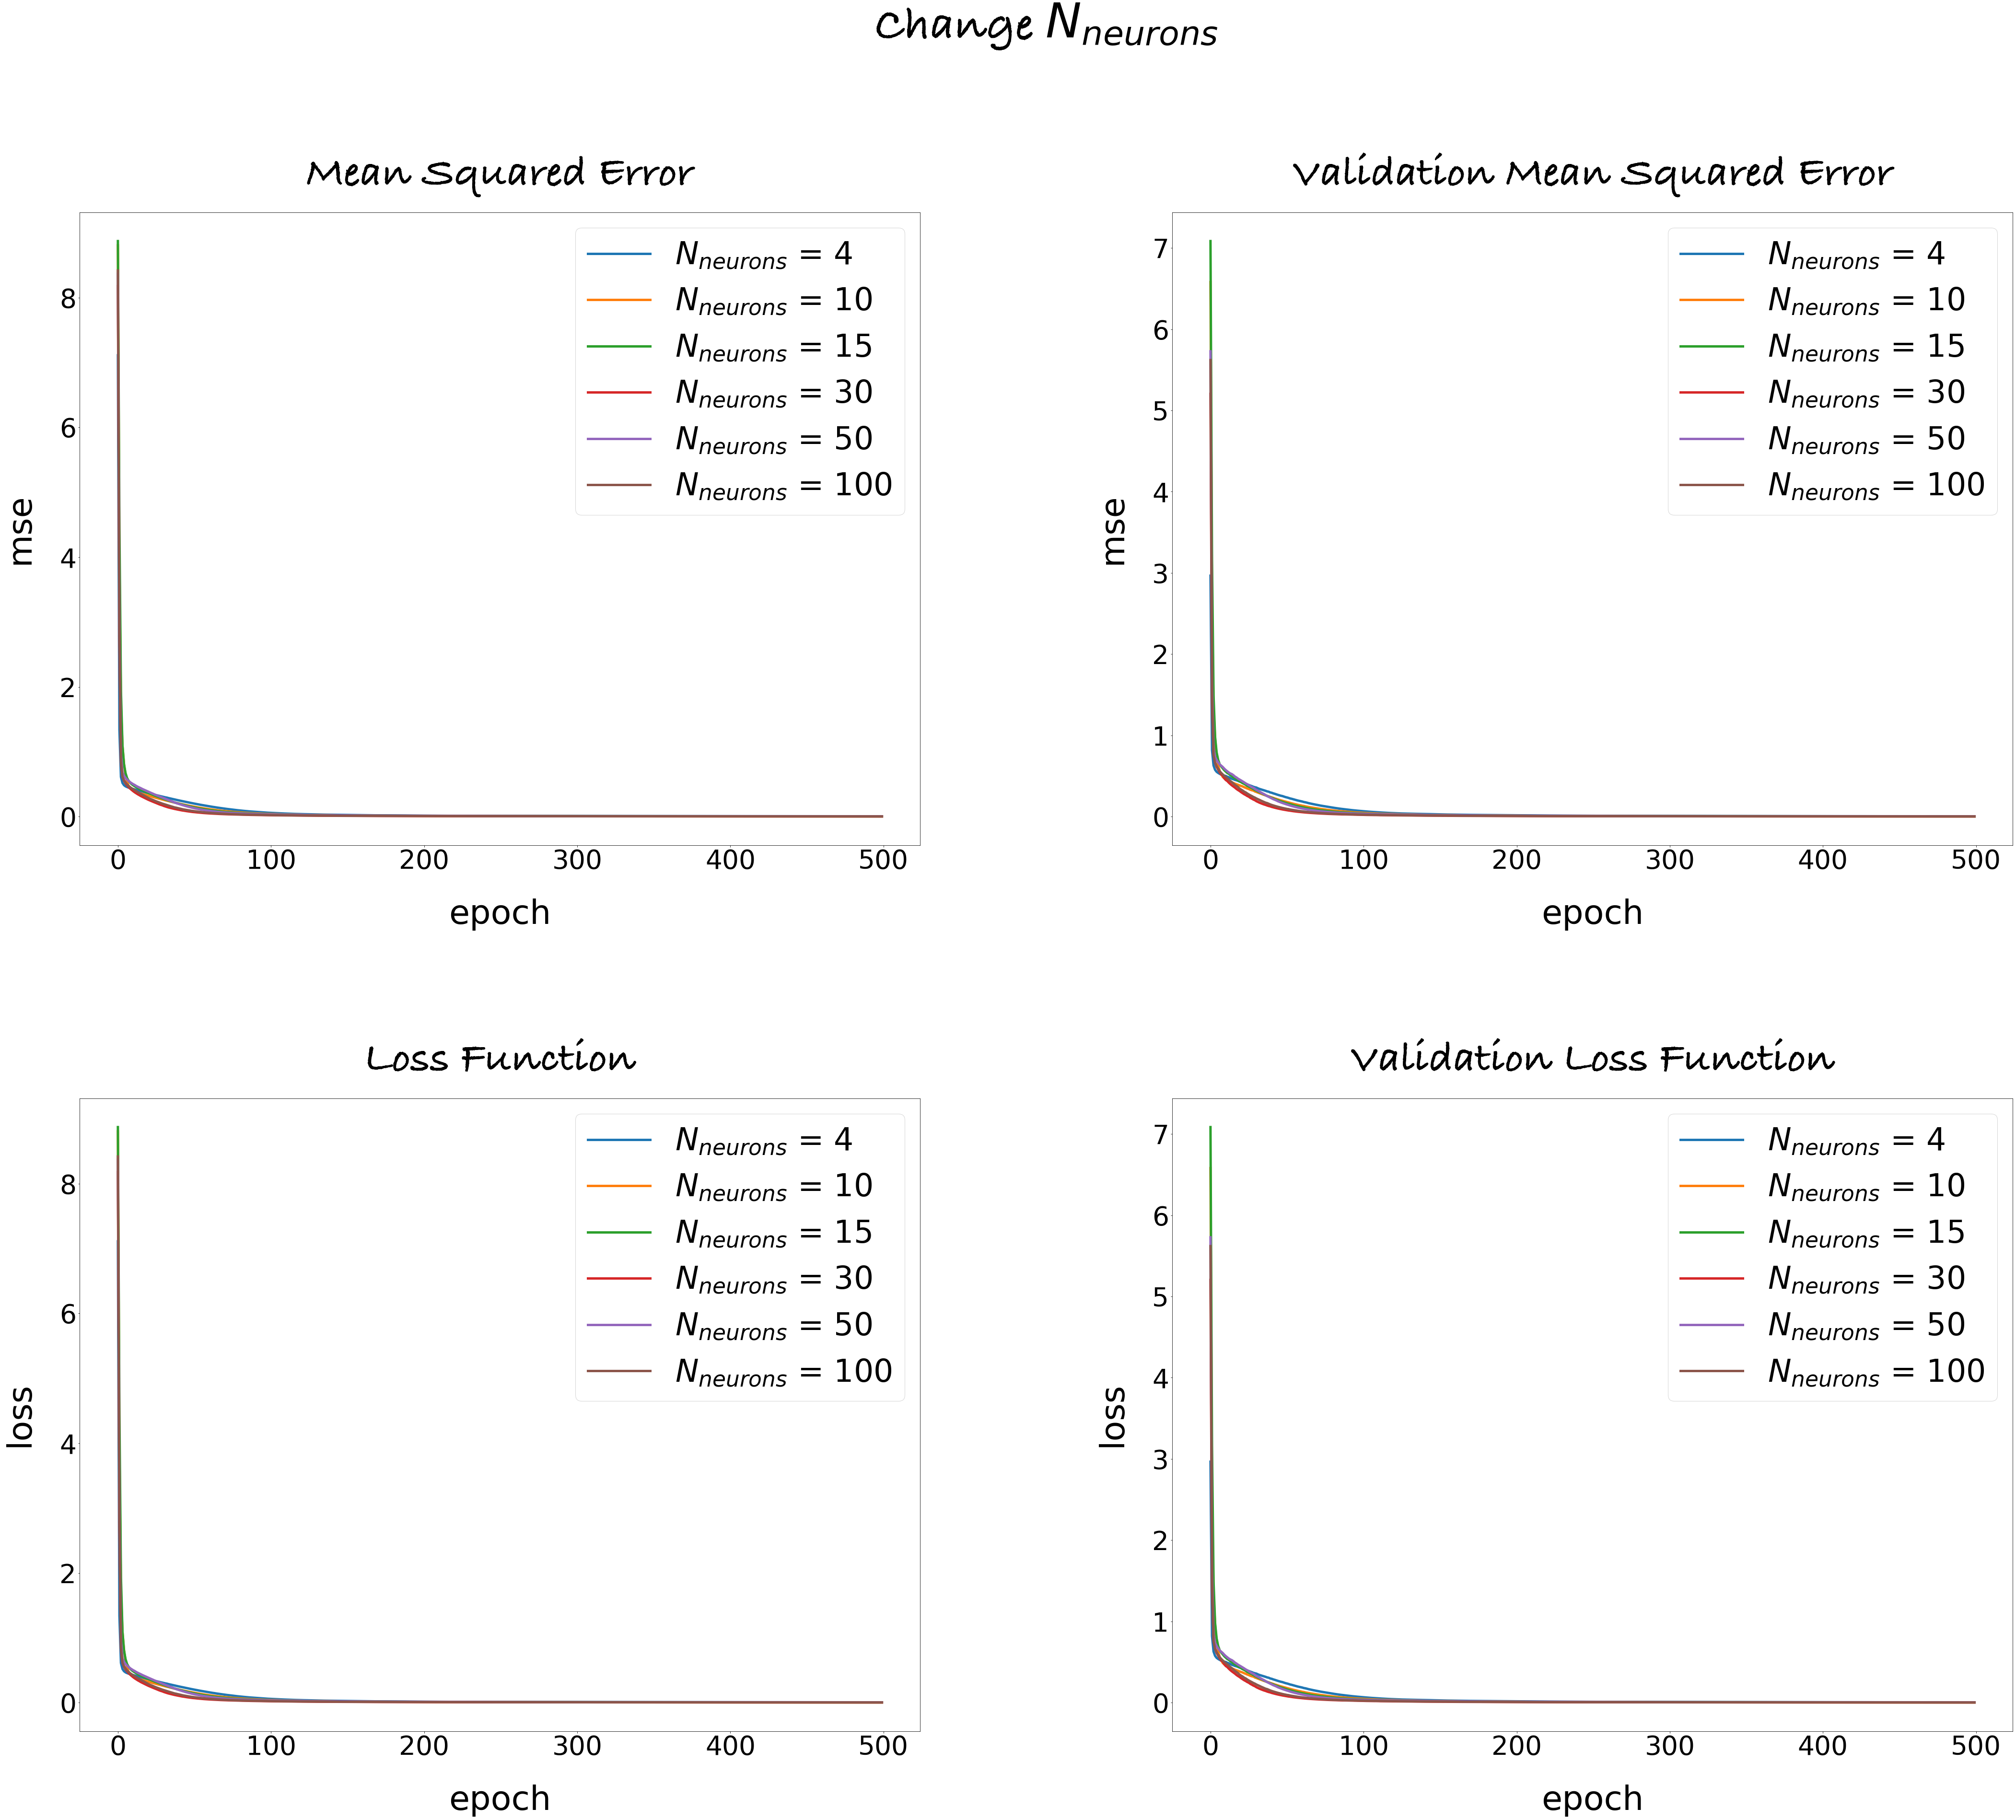

In [24]:
#plots
plt.figure(figsize=[70, 55])  #deafult (6.4,4.8)
plt.suptitle('Change $ N_{neurons} $', y=1.01, fontname = 'Bradley Hand', fontsize=100)

plt.subplot(2, 2, 1)
plt.title('Mean Squared Error', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('epoch', fontsize=70, labelpad=50)
plt.ylabel('mse', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
for t in range(len(N_neurons)):
    plt.plot(history_width[t].history['mse'], lw=5.0, label='$N_{neurons}$ = '+str(N_neurons[t]))
plt.legend(fontsize=65, loc='best')

plt.subplot(2, 2, 2)
plt.title('Validation Mean Squared Error', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('epoch', fontsize=70, labelpad=50)
plt.ylabel('mse', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
for t in range(len(N_neurons)):
    plt.plot(history_width[t].history['val_mse'], lw=5.0, label='$N_{neurons}$ = '+str(N_neurons[t]))
plt.legend(fontsize=65, loc='best')

plt.subplot(2, 2, 3)
plt.title('Loss Function', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('epoch', fontsize=70, labelpad=50)
plt.ylabel('loss', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
for t in range(len(N_neurons)):
    plt.plot(history_width[t].history['loss'], lw=5.0, label='$N_{neurons}$ = '+str(N_neurons[t]))
plt.legend(fontsize=65, loc='best')

plt.subplot(2, 2, 4)
plt.title('Validation Loss Function', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('epoch', fontsize=70, labelpad=50)
plt.ylabel('loss', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
for t in range(len(N_neurons)):
    plt.plot(history_width[t].history['val_loss'], lw=5.0, label='$N_{neurons}$ = '+str(N_neurons[t]))
plt.legend(fontsize=65, loc='best')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
plt.show()

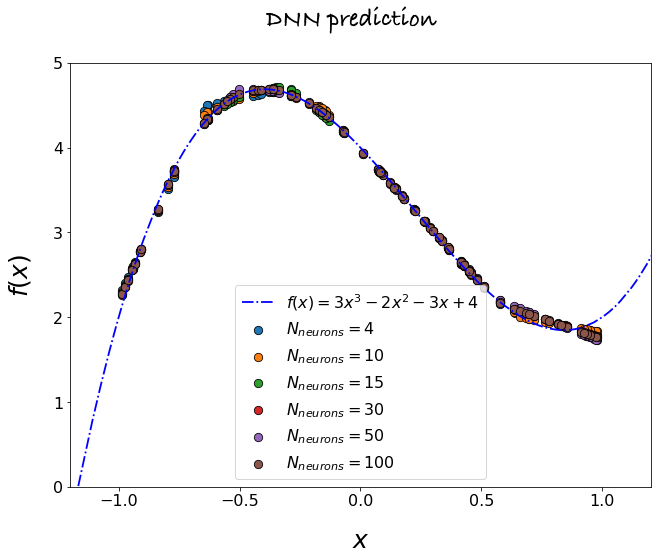

In [25]:
#prediction
y_predicted_width = []
for Nmod in range(len(N_neurons)):
    y_predicted_width.append(models_width[Nmod].predict(x_predicted_in, verbose=0))

plt.figure(figsize=[10.4, 7.8]) #deafult (6.4,4.8)
plt.suptitle('DNN prediction', fontname = 'Bradley Hand', fontsize=25)
plt.xlabel('$x$', fontsize=25, labelpad=20)
plt.ylabel('$f(x)$', fontsize=25, labelpad=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(-1.2, 1.2)
plt.ylim(0, 5)
plt.plot(x_target, y_target, color='b', linewidth=1.8, 
         linestyle='dashdot', label='$f(x) = 3x^3 - 2x^2 - 3x + 4$')
for j in range(len(N_neurons)):
    plt.scatter(x_predicted_in, y_predicted_width[j], marker="o", s=70,
                edgecolor='black', linewidths=0.8, label='$N_{neurons} = $'+str(N_neurons[j]))
plt.legend(fontsize=16, loc='lower center')
plt.show()

In this case, the values I chose for the various hidden layer widths do not seem to change the training and prediction of the models, except the case $ N_{neurons} = 4 $.
At this point I have to optimize the hyper-parameters that I have neglected for the moment: the number of training epochs and the size of the dataset, although the values used for these hyper-parameters up to here  don’t seem to be so bad.<br>
So, I create a Deep Neural Network with $ 2 $ hidden layers, each of $ 15 $ neurons with Relu activation function, and I train it for $ N_{epoch} = [200, 500, 800, 10^3]$.<br>
I analyze the various trainings below.

In [26]:
############################
#Neural Network creation
#Change N_epoch
############################
'''
    
    ====================
    Change N_neurons
    ====================
    N_train = 10^3
    N_hidden = 2
    N_neurons = 15
    Batch size = 100
    noise = 0
    
'''
neuronsPerHiddenLayer = 15
N_epochs = [200, 500, 800, 10**3]
print("The model has been initiated with Sequential")
model = tf.keras.Sequential(name='3rd_DNN')
model.add(Input(shape=(1,)))
#Hidden structure
for hidden in range(numberHiddenLayers):
    model.add(Dense(neuronsPerHiddenLayer, activation='relu'))
model.add(Dense(1, activation='linear')) 
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.save('3rd_DNN_11.2')
model.summary()

The model has been initiated with Sequential
Model: "3rd_DNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 15)                30        
_________________________________________________________________
dense_34 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 16        
Total params: 286
Trainable params: 286
Non-trainable params: 0
_________________________________________________________________


In [27]:
Deep_Neural_Network = tf.keras.models.load_model('3rd_DNN_11.2')
history = []
for ep in range(len(N_epochs)):
    print('Train for', N_epochs[ep], 'epochs...')
    history.append(Deep_Neural_Network.fit(x_train, y_train, batch_size=batch_dim,
                                             epochs=N_epochs[ep], initial_epoch=0,
                                             validation_data=(x_valid, y_valid),
                                             shuffle=True, verbose=0)              
                  )

Train for 200 epochs...
Train for 500 epochs...
Train for 800 epochs...
Train for 1000 epochs...


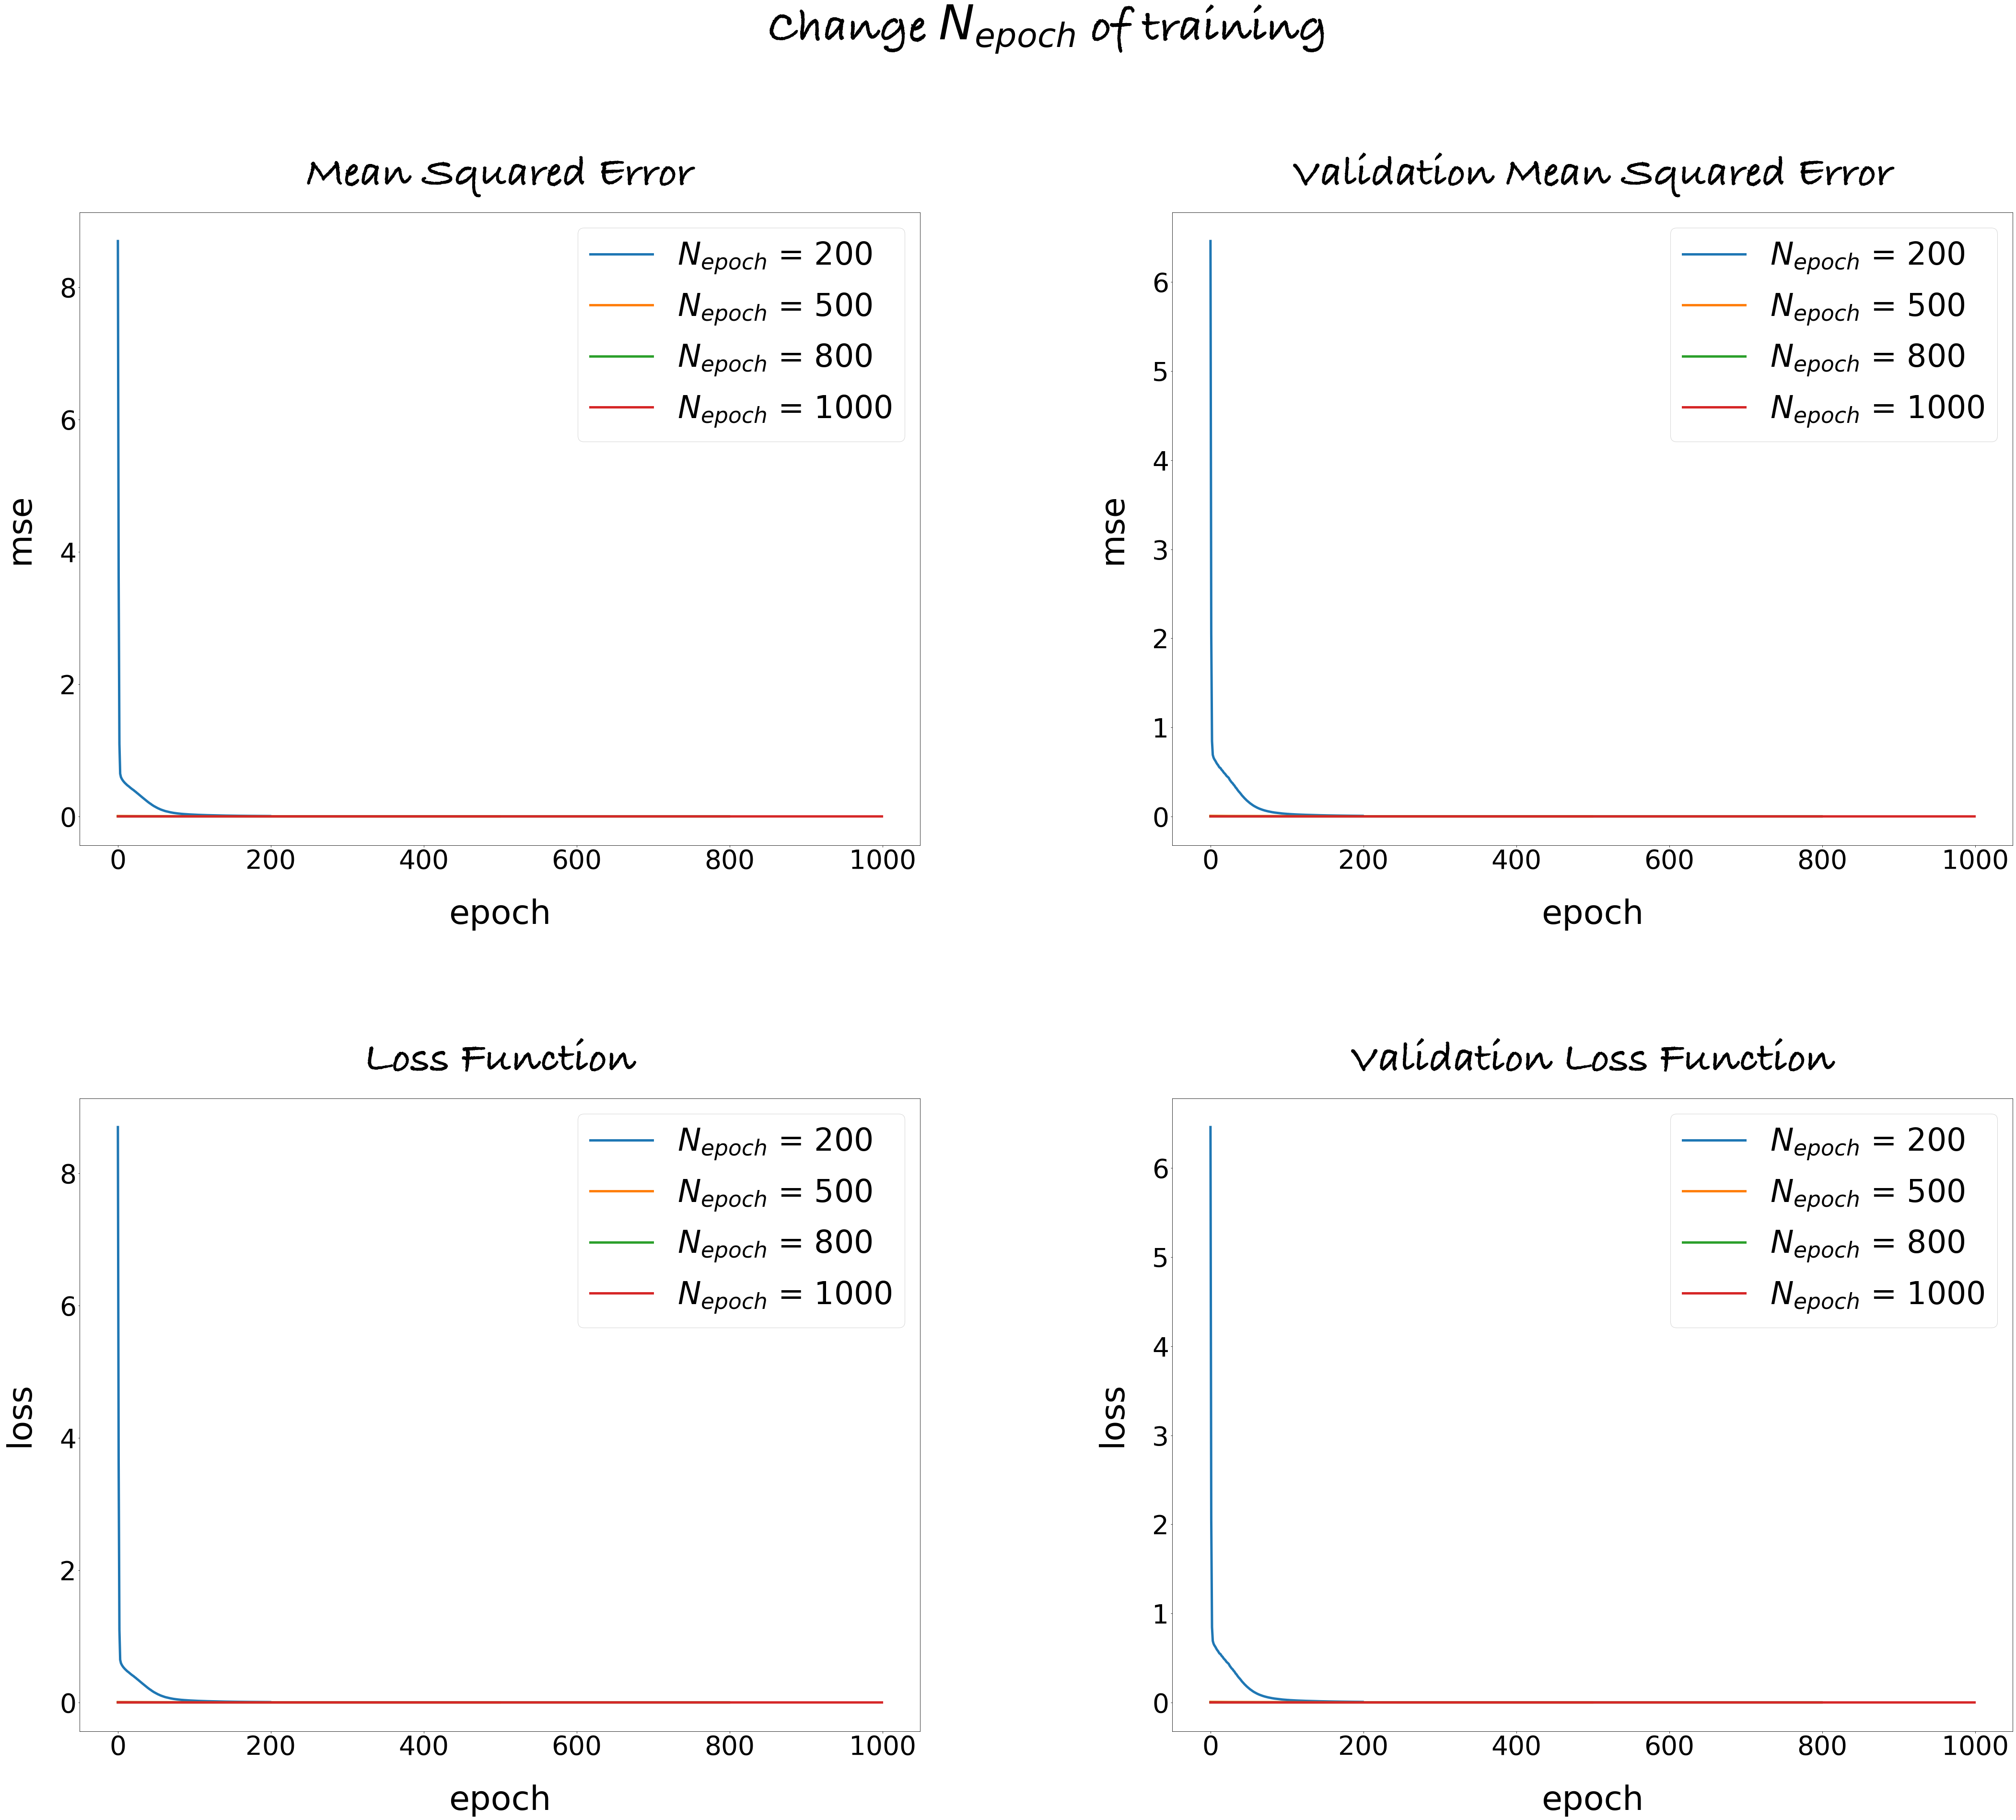

In [28]:
#plots
plt.figure(figsize=[70, 55])  #deafult (6.4,4.8)
plt.suptitle('Change $ N_{epoch} $ of training', y=1.01, fontname = 'Bradley Hand', fontsize=100)

plt.subplot(2, 2, 1)
plt.title('Mean Squared Error', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('epoch', fontsize=70, labelpad=50)
plt.ylabel('mse', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
for ep in range(len(N_epochs)):
    plt.plot(history[ep].history['mse'], lw=5.0, label='$N_{epoch}$ = '+str(N_epochs[ep]))
plt.legend(fontsize=65, loc='best')

plt.subplot(2, 2, 2)
plt.title('Validation Mean Squared Error', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('epoch', fontsize=70, labelpad=50)
plt.ylabel('mse', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
for ep in range(len(N_epochs)):
    plt.plot(history[ep].history['val_mse'], lw=5.0, label='$N_{epoch}$ = '+str(N_epochs[ep]))
plt.legend(fontsize=65, loc='best')

plt.subplot(2, 2, 3)
plt.title('Loss Function', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('epoch', fontsize=70, labelpad=50)
plt.ylabel('loss', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
for ep in range(len(N_epochs)):
    plt.plot(history[ep].history['loss'], lw=5.0, label='$N_{epoch}$ = '+str(N_epochs[ep]))
plt.legend(fontsize=65, loc='best')

plt.subplot(2, 2, 4)
plt.title('Validation Loss Function', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('epoch', fontsize=70, labelpad=50)
plt.ylabel('loss', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
for ep in range(len(N_epochs)):
    plt.plot(history[ep].history['val_loss'], lw=5.0, label='$N_{epoch}$ = '+str(N_epochs[ep]))
plt.legend(fontsize=65, loc='best')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
plt.show()

At this point I decide to make a final attempt in the following way: I build a DNN as found before, then $ 2 $ hidden layers of $ 15 $ ReLU neurons each, which I train using a dataset of $ 10^3 $ training points, and a validation dataset of $ 250 $ points, for $ 10^3 $ epochs.<br>
I also apply the *Early Stopping* technique, which stop training when a monitored quantity (in this case the loss on the validation set) has stopped improving.<br>
Compared to the previous cases I also make a further change regarding the choice of the optimizer: I replace the *SGD* standard with the algorithm called *Adam*. Adam optimization is a stochastic gradient descent method that is based on *adaptive estimation of first-order and second-order moments*. This method should be computationally efficient, have little memory requirement, invariant to diagonal rescaling of gradients, and be well suited for problems that are large in terms of data/parameters.<br>

In [29]:
############################
#Non Linear Fit
#Final Attempt
############################
#Hyper-parameters
hidden = 2  #number of hidden layers
width = 15  #number of hidden neurons
N_epoch = 10**3
batch_dim = 50

#Data sets
N_train = 10**3  #training data set
x_train = np.random.uniform(-1, 1, N_train)
y_train = a*np.power(x_train, 3) + b*np.power(x_train, 2) + c*x_train + d
N_valid = 250  #validation data set
x_valid = np.random.uniform(-1, 1, N_valid)
y_valid = a*np.power(x_valid, 3) + b*np.power(x_valid, 2) + c*x_valid + d

In [30]:
#DNN Architecture
Deep_nonLinear = tf.keras.Sequential()
Deep_nonLinear.add(Input(shape=(1,)))
for h in range(hidden):
    Deep_nonLinear.add(Dense(width, activation='relu'))
    #Deep_nonLinear.add(Dropout(0.1))
Deep_nonLinear.add(Dense(1, activation='linear'))
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
ES = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, verbose=1)
Deep_nonLinear.compile(optimizer=adam, loss='mse', metrics=['mse'])
Deep_nonLinear.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 15)                30        
_________________________________________________________________
dense_37 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 16        
Total params: 286
Trainable params: 286
Non-trainable params: 0
_________________________________________________________________


In [31]:
#DNN Training
print('Start Training of Deep_nonLinear')
history_nonLinear = Deep_nonLinear.fit(x_train, y_train, batch_size=batch_dim,
                                       epochs=N_epoch, initial_epoch=0,
                                       validation_data=(x_valid, y_valid),
                                       shuffle=True, callbacks=[ES], verbose=0)
print('End of the Training Phase')

Start Training of Deep_nonLinear
End of the Training Phase


In [32]:
#DNN prediction
y_predicted_in = Deep_nonLinear.predict(x_predicted_in, verbose=0)
y1_predicted_out = Deep_nonLinear.predict(x1_predicted_out, verbose=0)
y2_predicted_out = Deep_nonLinear.predict(x2_predicted_out, verbose=0)

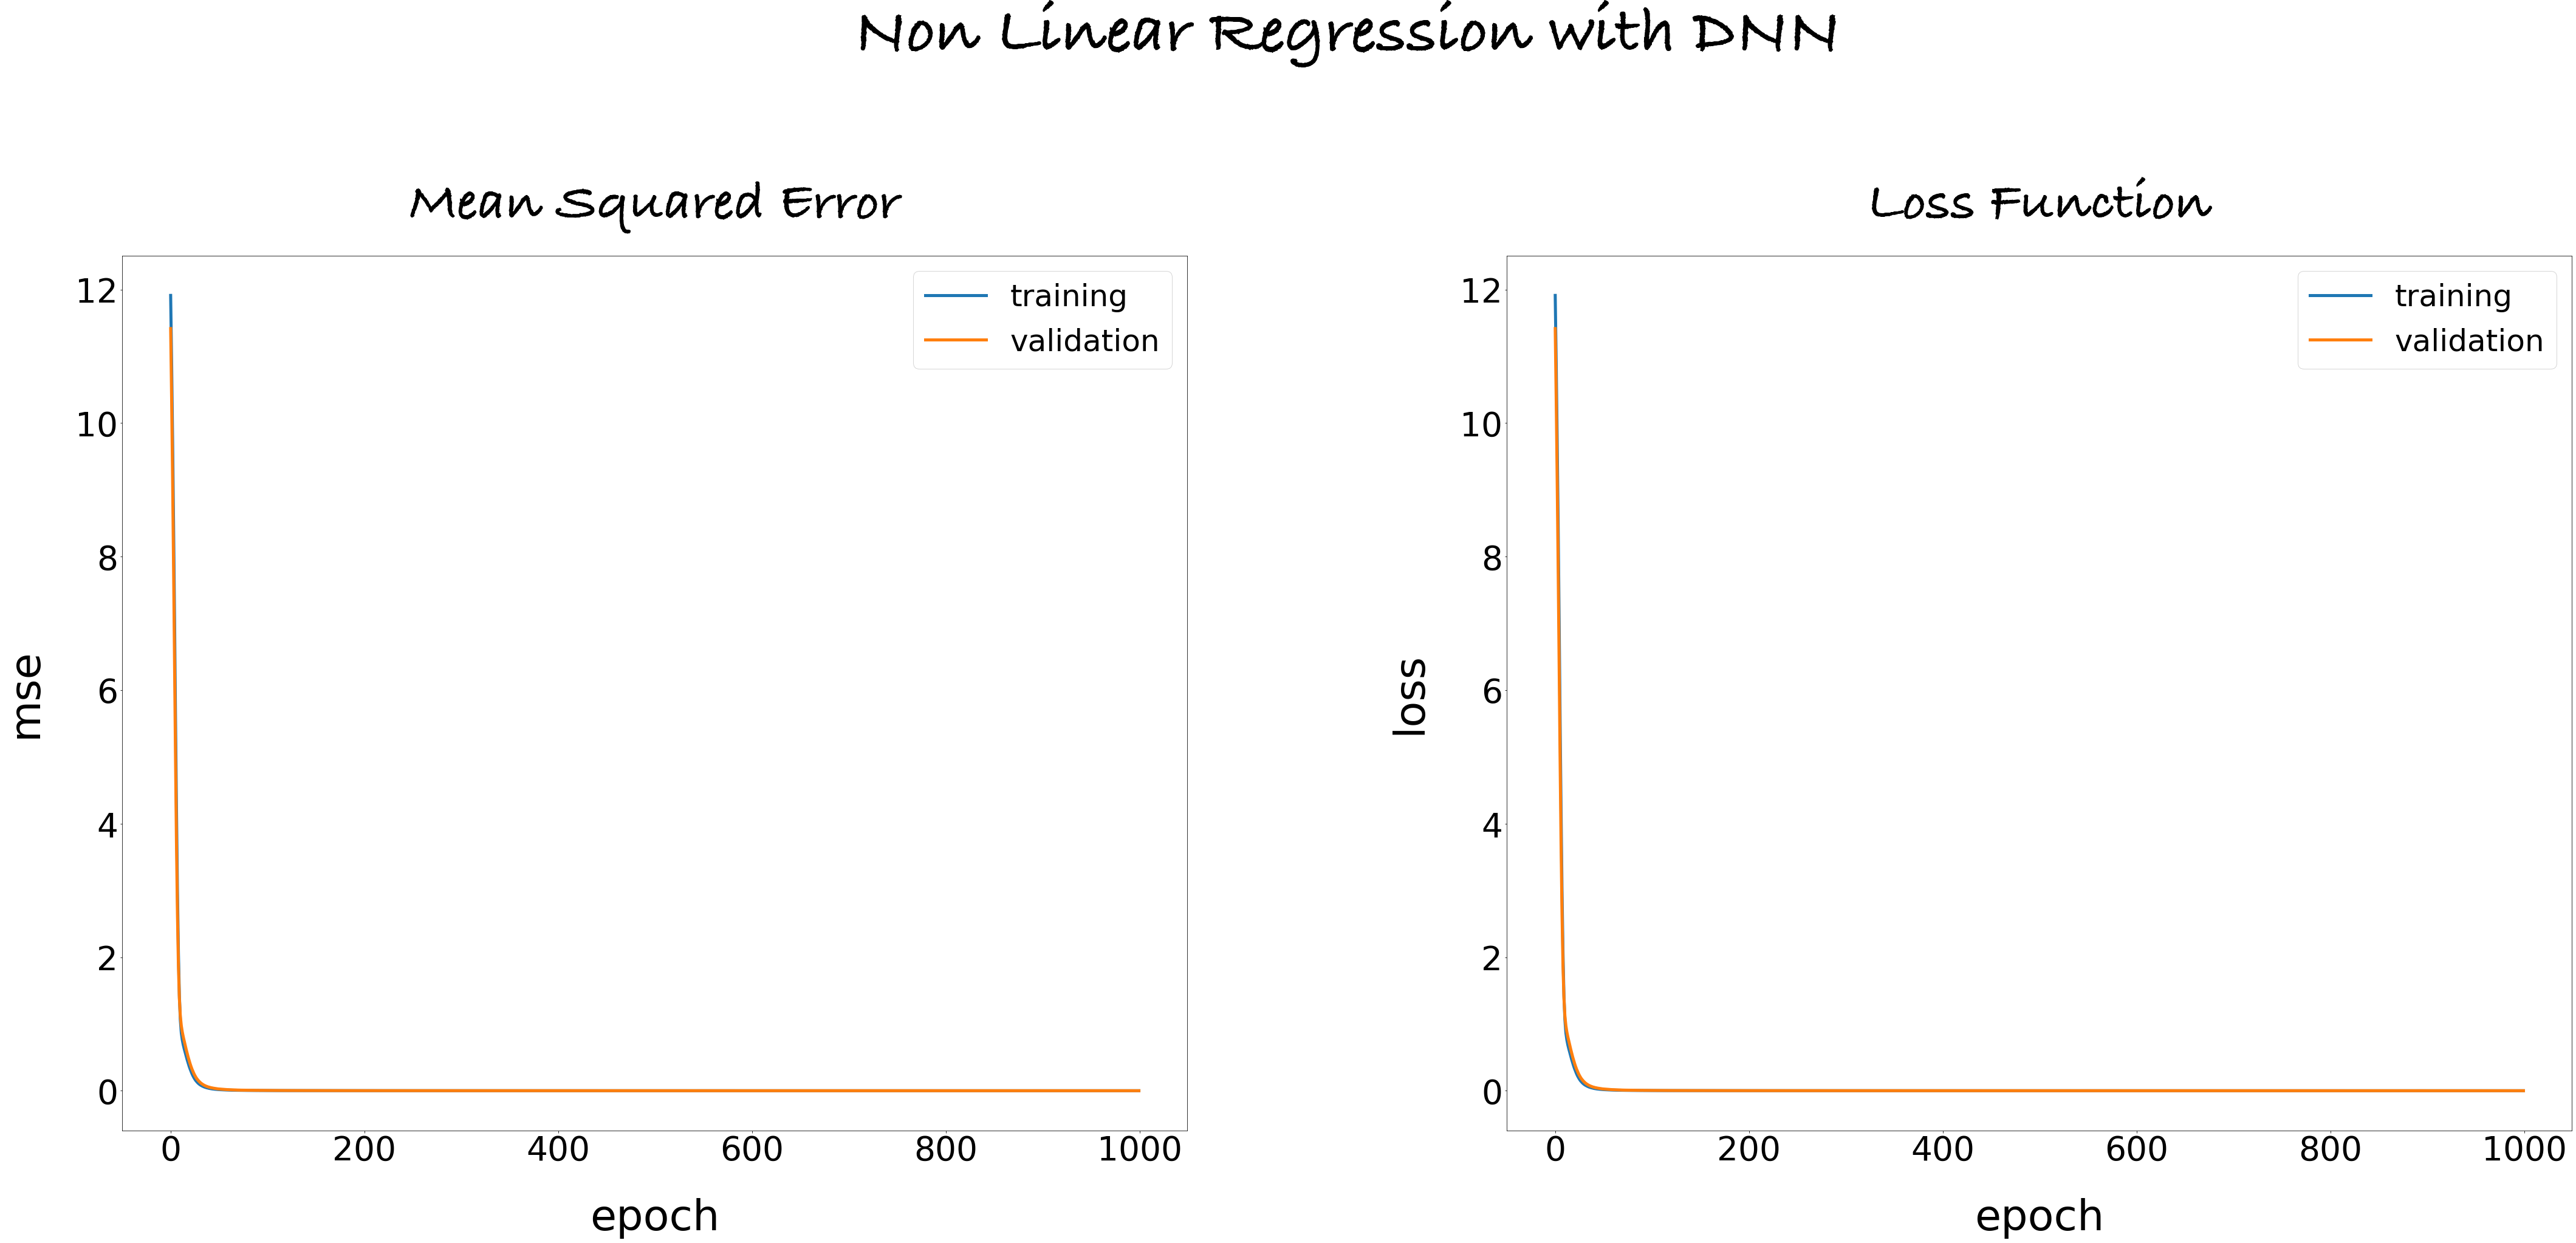

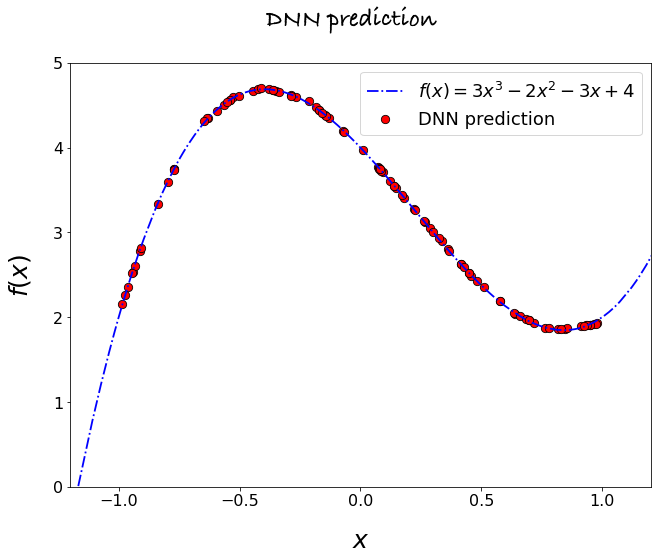

In [33]:
#plots
#Cost Function
plt.figure(figsize=[70, 25])  #deafult (6.4,4.8)
plt.suptitle('Non Linear Regression with DNN', y=1.13, fontname = 'Bradley Hand', fontsize=110)

plt.subplot(1, 2, 1)
plt.title('Mean Squared Error', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('epoch', fontsize=70, labelpad=50)
plt.ylabel('mse', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.plot(history_nonLinear.history['mse'], lw=5.0, label='training')
plt.plot(history_nonLinear.history['val_mse'], lw=5.0, label='validation')
plt.legend(fontsize=50, loc='best')

plt.subplot(1, 2, 2)
plt.title('Loss Function', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('epoch', fontsize=70, labelpad=50)
plt.ylabel('loss', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.plot(history_nonLinear.history['loss'], lw=5.0, label='training')
plt.plot(history_nonLinear.history['val_loss'], lw=5.0, label='validation')
plt.legend(fontsize=50, loc='best')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
plt.show()

print('\n')
#prediction
plt.figure(figsize=[10.4, 7.8]) #deafult (6.4,4.8)
plt.suptitle('DNN prediction', fontname = 'Bradley Hand', fontsize=25)
plt.xlabel('$x$', fontsize=25, labelpad=20)
plt.ylabel('$f(x)$', fontsize=25, labelpad=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(-1.2, 1.2)
plt.ylim(0, 5)
plt.plot(x_target, y_target, color='b', linewidth=1.8, 
         linestyle='dashdot', label='$f(x) = 3x^3 - 2x^2 - 3x + 4$')
plt.scatter(x_predicted_in, y_predicted_in, color='r', marker="o", s=70,
            edgecolor='black', linewidths=0.8, label='DNN prediction')
plt.legend(fontsize=18, loc='best')
plt.show()

Thanks to this final setting I obtain a very precise nonlinear regression of the target polynomial in the training dataset range $ [-1, 1] $.
Even the change of the optimizer, from *SGD* to *Adam* seems to have improved the predictive capacity of the DNN on new data, so much so that the curves related to the training and the validation sets are substantially overlapping.<br>
Very interesting is now to try to make predictions with this newly trained Neural Network on unseen data living outside the range $ [-1, 1] $.
I show this thing here below, feeding the DNN unseen points in the range $ [-5, -1) $ and $ (1, 5] $.

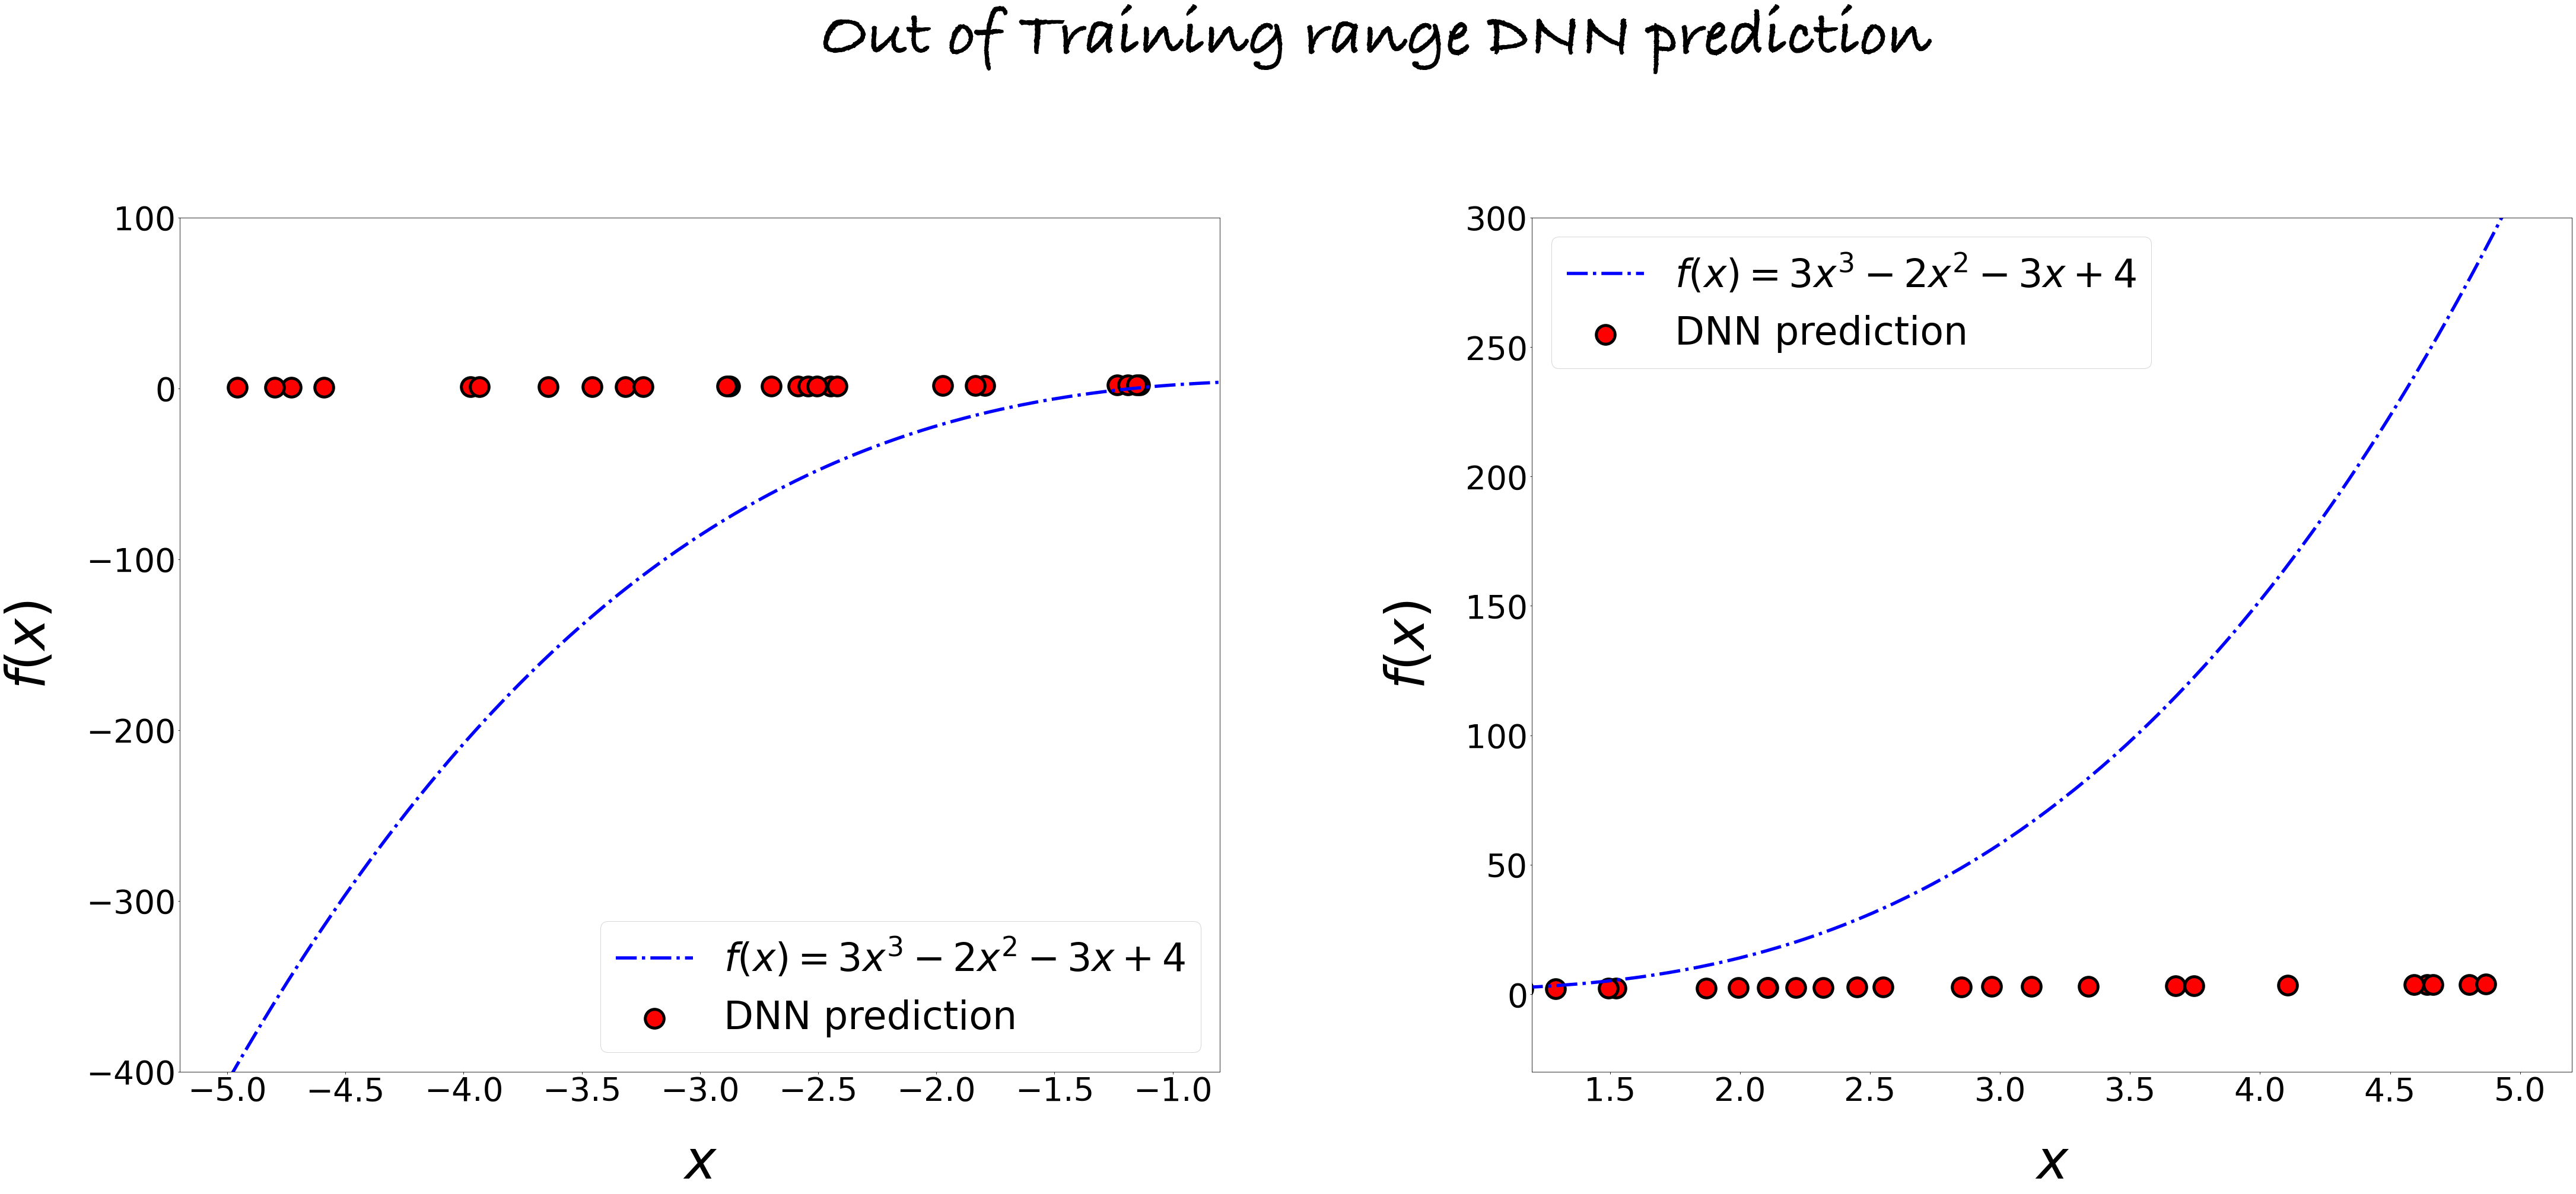

In [34]:
#prediction out
plt.figure(figsize=[70, 25])  #deafult (6.4,4.8)
plt.suptitle('Out of Training range DNN prediction', y=1.1, fontname = 'Bradley Hand', fontsize=110)

plt.subplot(1, 2, 1)
plt.xlabel('$x$', fontsize=90, labelpad=50)
plt.ylabel('$f(x)$', fontsize=90, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.xlim(-5.2, -0.8)
plt.ylim(-400, 100)
plt.plot(x_target, y_target, color='b', linewidth=5.5, 
         linestyle='dashdot', label='$f(x) = 3x^3 - 2x^2 - 3x + 4$')
plt.scatter(x1_predicted_out, y1_predicted_out, color='r', marker="o", s=10**3,
            edgecolor='black', linewidths=5, label='DNN prediction')
plt.legend(fontsize=65, loc='lower right')

plt.subplot(1, 2, 2)
plt.xlabel('$x$', fontsize=90, labelpad=50)
plt.ylabel('$f(x)$', fontsize=90, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.xlim(1.2, 5.2)
plt.ylim(-30, 300)
plt.plot(x_target, y_target, color='b', linewidth=5.5, 
         linestyle='dashdot', label='$f(x) = 3x^3 - 2x^2 - 3x + 4$')
plt.scatter(x2_predicted_out, y2_predicted_out, color='r', marker="o", s=10**3,
            edgecolor='black', linewidths=5, label='DNN prediction')
plt.legend(fontsize=65, loc='best')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
plt.show()

These last two graphs reveal a central issue: the Neural Network has learned very well to replicate the functional form of the polynomial only in the domain related to the training dataset, while it completely fails in the regression outside, simply because he has never seen an example during the training phase!
We cannot, in my view, ask more of this DNN: in the space of all third order polynomials there will be a good number of them that resemble that particular polynomial we are regressing on for $ x \in [-1, 1] $!


To conclude, the complexity of the network is dramatically increased compared to the linear case: passing from two parameters ($ m $ and $ b $) to four parameters ($ a $, $ b $, $ c $, $ d $), the number of trainable parameters that the NN must optimize passes from $ 2 $ to $ 286 $ (in the case of my last architecture).
This gives an idea of how complex it can be to create an appropriate architecture in more complex cases than the one dealt with in this exercise, but also shows a certain fascination with respect to these deep learning techniques.<br>
Note also how using an *excessively deep* rather than *excessively wide* DNN does not necessarily imply a better predictive ability, indeed typically the opposite, and therefore also the choice of the best hyper-parameters to be used should be considered with extreme care.


Finally I repeat the training adding a noise of $ 0.01 $ as in the first exercise and trying to make predictions in the range $ x \in [-1, 1] $

In [35]:
x_train_noise = np.random.uniform(-1, 1, N_train)
y_train_noise = np.random.normal(a*np.power(x_train_noise, 3) + b*np.power(x_train_noise, 2)
                                 + c*x_train_noise + d, 0.01)
x_valid_noise = np.random.uniform(-1, 1, N_valid)
y_valid_noise = np.random.normal(a*np.power(x_valid_noise, 3) + b*np.power(x_valid_noise, 2)
                           + c*x_valid_noise + d, 0.01)
x_predicted_noise = np.random.uniform(-1, 1, N_predicted_in)

In [36]:
#DNN Architecture
Deep_nonLinear_noise = tf.keras.Sequential()
Deep_nonLinear_noise.add(Input(shape=(1,)))
for h in range(hidden):
    Deep_nonLinear_noise.add(Dense(width, activation='relu'))
Deep_nonLinear_noise.add(Dense(1, activation='linear'))
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
ES = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, verbose=1)
Deep_nonLinear_noise.compile(optimizer=adam, loss='mse', metrics=['mse'])
Deep_nonLinear_noise.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 15)                30        
_________________________________________________________________
dense_40 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 16        
Total params: 286
Trainable params: 286
Non-trainable params: 0
_________________________________________________________________


In [37]:
#DNN Training
print('Start Training of Deep_nonLinear_noise')
history_nonLinear_noise = Deep_nonLinear_noise.fit(x_train_noise, y_train_noise, batch_size=batch_dim,
                                                   epochs=N_epoch, initial_epoch=0,
                                                   validation_data=(x_valid_noise, y_valid_noise),
                                                   shuffle=True, callbacks=[ES], verbose=0)
print('End of the Training Phase')

Start Training of Deep_nonLinear_noise
Epoch 00754: early stopping
End of the Training Phase


In [38]:
#DNN prediction
y_predicted_noise = Deep_nonLinear_noise.predict(x_predicted_noise, verbose=0)

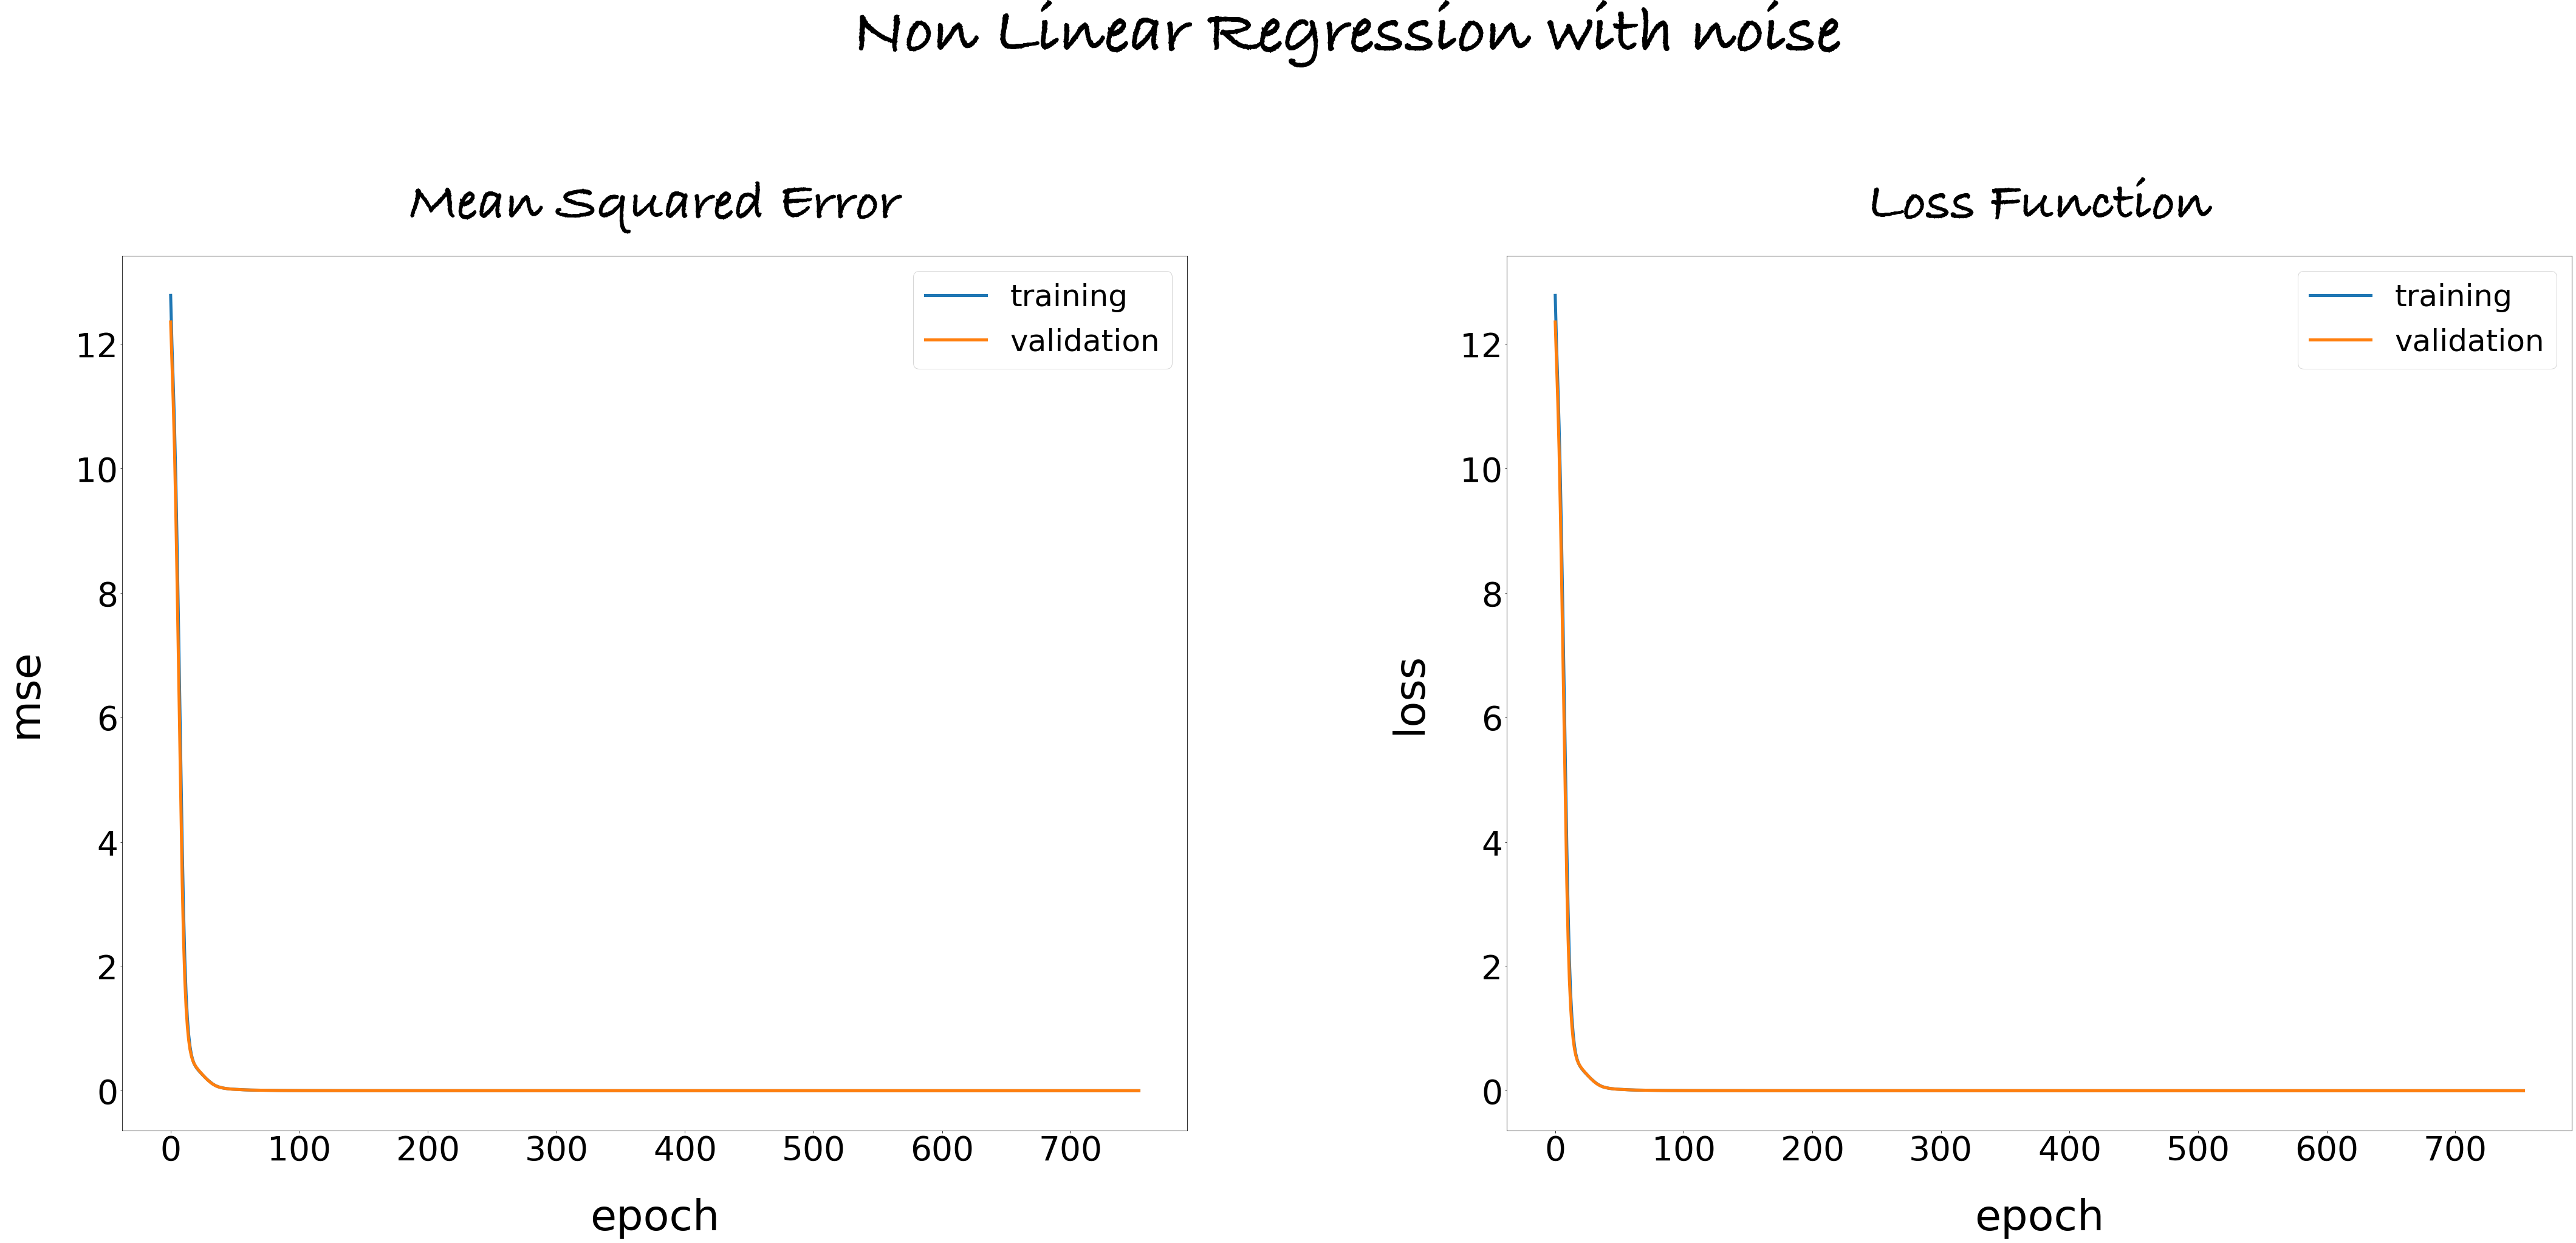

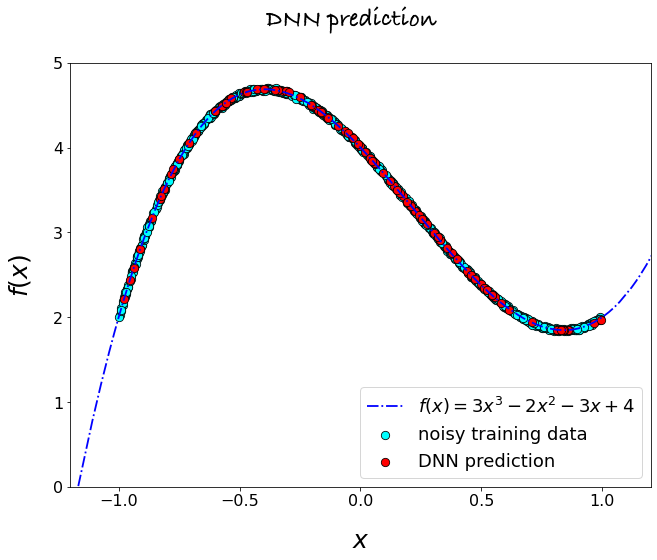

In [39]:
#plots
#Cost Function
plt.figure(figsize=[70, 25])  #deafult (6.4,4.8)
plt.suptitle('Non Linear Regression with noise', y=1.13, fontname = 'Bradley Hand', fontsize=110)

plt.subplot(1, 2, 1)
plt.title('Mean Squared Error', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('epoch', fontsize=70, labelpad=50)
plt.ylabel('mse', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.plot(history_nonLinear_noise.history['mse'], lw=5.0, label='training')
plt.plot(history_nonLinear_noise.history['val_mse'], lw=5.0, label='validation')
plt.legend(fontsize=50, loc='best')

plt.subplot(1, 2, 2)
plt.title('Loss Function', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('epoch', fontsize=70, labelpad=50)
plt.ylabel('loss', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.plot(history_nonLinear_noise.history['loss'], lw=5.0, label='training')
plt.plot(history_nonLinear_noise.history['val_loss'], lw=5.0, label='validation')
plt.legend(fontsize=50, loc='best')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
plt.show()

print('\n')
#prediction
plt.figure(figsize=[10.4, 7.8]) #deafult (6.4,4.8)
plt.suptitle('DNN prediction', fontname = 'Bradley Hand', fontsize=25)
plt.xlabel('$x$', fontsize=25, labelpad=20)
plt.ylabel('$f(x)$', fontsize=25, labelpad=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(-1.2, 1.2)
plt.ylim(0, 5)
plt.plot(x_target, y_target, color='b', linewidth=1.8, 
         linestyle='dashdot', label='$f(x) = 3x^3 - 2x^2 - 3x + 4$')
plt.scatter(x_train_noise, y_train_noise, color='cyan', marker="o", s=70,
            edgecolor='black', linewidths=0.8, label='noisy training data')
plt.scatter(x_predicted_noise, y_predicted_noise, color='r', marker="o", s=70,
            edgecolor='black', linewidths=0.8, label='DNN prediction')
plt.legend(fontsize=18, loc='best')
plt.show()

The predictions of my DNN remain robust even compared to a noisy training dataset.

## <font color='blue'>Exercise 11.3</font>

In the latter exercise I try to extend the Neural Network to do regression of the following trigonometric function in two dimensions:

$$
  f(x, y) = \sin(x^2+y^2) \\
  x \in \bigg[-\frac{3}{2}, \frac{3}{2} \bigg] \\
  y \in \bigg[-\frac{3}{2}, \frac{3}{2} \bigg]
$$

The first idea I want to apply is the following: keeping the same Deep Neural Network structure found in the previous exercise, I simply adapt the input layer in order to take in input each two-dimensional data of the type $ (x, y) $; the output layer will always be formed by a single *linear* neuron that will return the value of the function on that point.

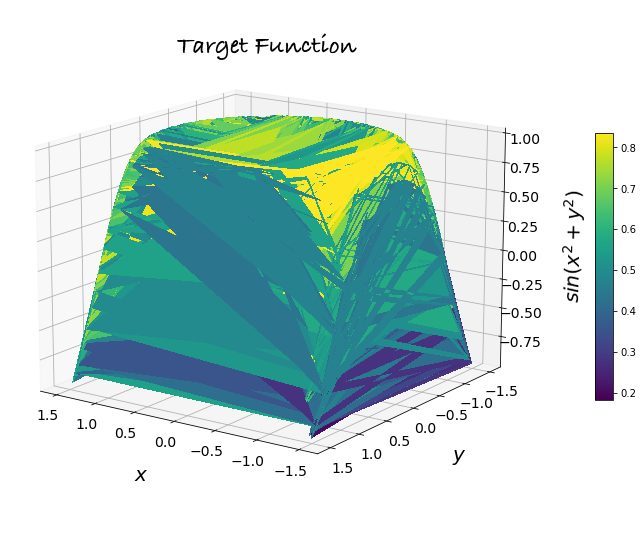

In [40]:
############################
#Non Linear Fit
#Trigonometric Function
#1st Attempt
############################
#Hyper-parameters
hidden = 2  #number of hidden layers
width = 15  #number of hidden neurons
N_epoch = 10**3
batch_dim = 50

#Data sets
N_train = 10**3  #training data set
x_t = np.random.uniform(-3/2, 3/2, N_train)
y_t = np.random.uniform(-3/2, 3/2, N_train)
x_train = np.zeros((N_train, 2))
x_train[:, 0] = x_t
x_train[:, 1] = y_t
y_train = np.sin(x_train[:, 0]**2 + x_train[:, 1]**2)

N_valid = 250  #validation data set
x_v = np.random.uniform(-3/2, 3/2, N_valid)
y_v = np.random.uniform(-3/2, 3/2, N_valid)
x_valid = np.zeros((N_valid, 2))
x_valid[:, 0] = x_v
x_valid[:, 1] = y_v
y_valid = np.sin(x_valid[:, 0]**2 + x_valid[:, 1]**2)

fig = plt.figure(figsize=[12.4, 9.8])
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Target Function', y=0.98, fontname='Bradley Hand', fontsize=25)
X, Y = np.meshgrid(x_train[:, 0], x_train[:, 1])
f = np.array([sin(x**2+y**2) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = f.reshape(X.shape)
ax.set_xlabel('$x$', fontsize=20, labelpad=22)
ax.set_ylabel('$y$', fontsize=20, labelpad=22)
ax.set_zlabel('$sin(x^2+y^2)$', fontsize=20, labelpad=22)
ax.tick_params(labelsize=14)
surf = ax.plot_surface(X, Y, Z, cmap='viridis', antialiased=False)
ax.view_init(15, 125)
fig.colorbar(surf, shrink=0.5, aspect=15, pad=0.1)
plt.show()

In [41]:
#DNN Architecture
Deep_Trig = tf.keras.Sequential()
Deep_Trig.add(Input(shape=(2,)))
for h in range(hidden):
    Deep_Trig.add(Dense(width, activation='relu'))
    #Deep_nonLinear.add(Dropout(0.1))
Deep_Trig.add(Dense(1, activation='linear'))
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
ES = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, verbose=1)
Deep_Trig.compile(optimizer=adam, loss='mse', metrics=['mse'])
Deep_Trig.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 15)                45        
_________________________________________________________________
dense_43 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 16        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [42]:
#DNN Training
print('Start Training of Deep_Trig')
history_Trig = Deep_Trig.fit(x_train, y_train, batch_size=batch_dim,
                             epochs=N_epoch, initial_epoch=0,
                             validation_data=(x_valid, y_valid),
                             shuffle=True, callbacks=[ES], verbose=0)
print('End of the Training Phase')

Start Training of Deep_Trig
Epoch 00669: early stopping
End of the Training Phase


In [43]:
N_target = 10**4
x_target = np.zeros((N_target, 2))
x_target[:, 0] = np.random.uniform(-3/2, 3/2, N_target)
x_target[:, 1] = np.random.uniform(-3/2, 3/2, N_target)
y_target = np.sin(x_target[:, 0]**2 + x_target[:, 1]**2)

#DNN prediction
N_pred = 1000  #training data set
x_pred = np.zeros((N_pred, 2))
x_pred[:, 0] = np.random.uniform(-3/2, 3/2, N_pred)
x_pred[:, 1] = np.random.uniform(-3/2, 3/2, N_pred)
y_pred = Deep_Trig.predict(x_pred, verbose=0)

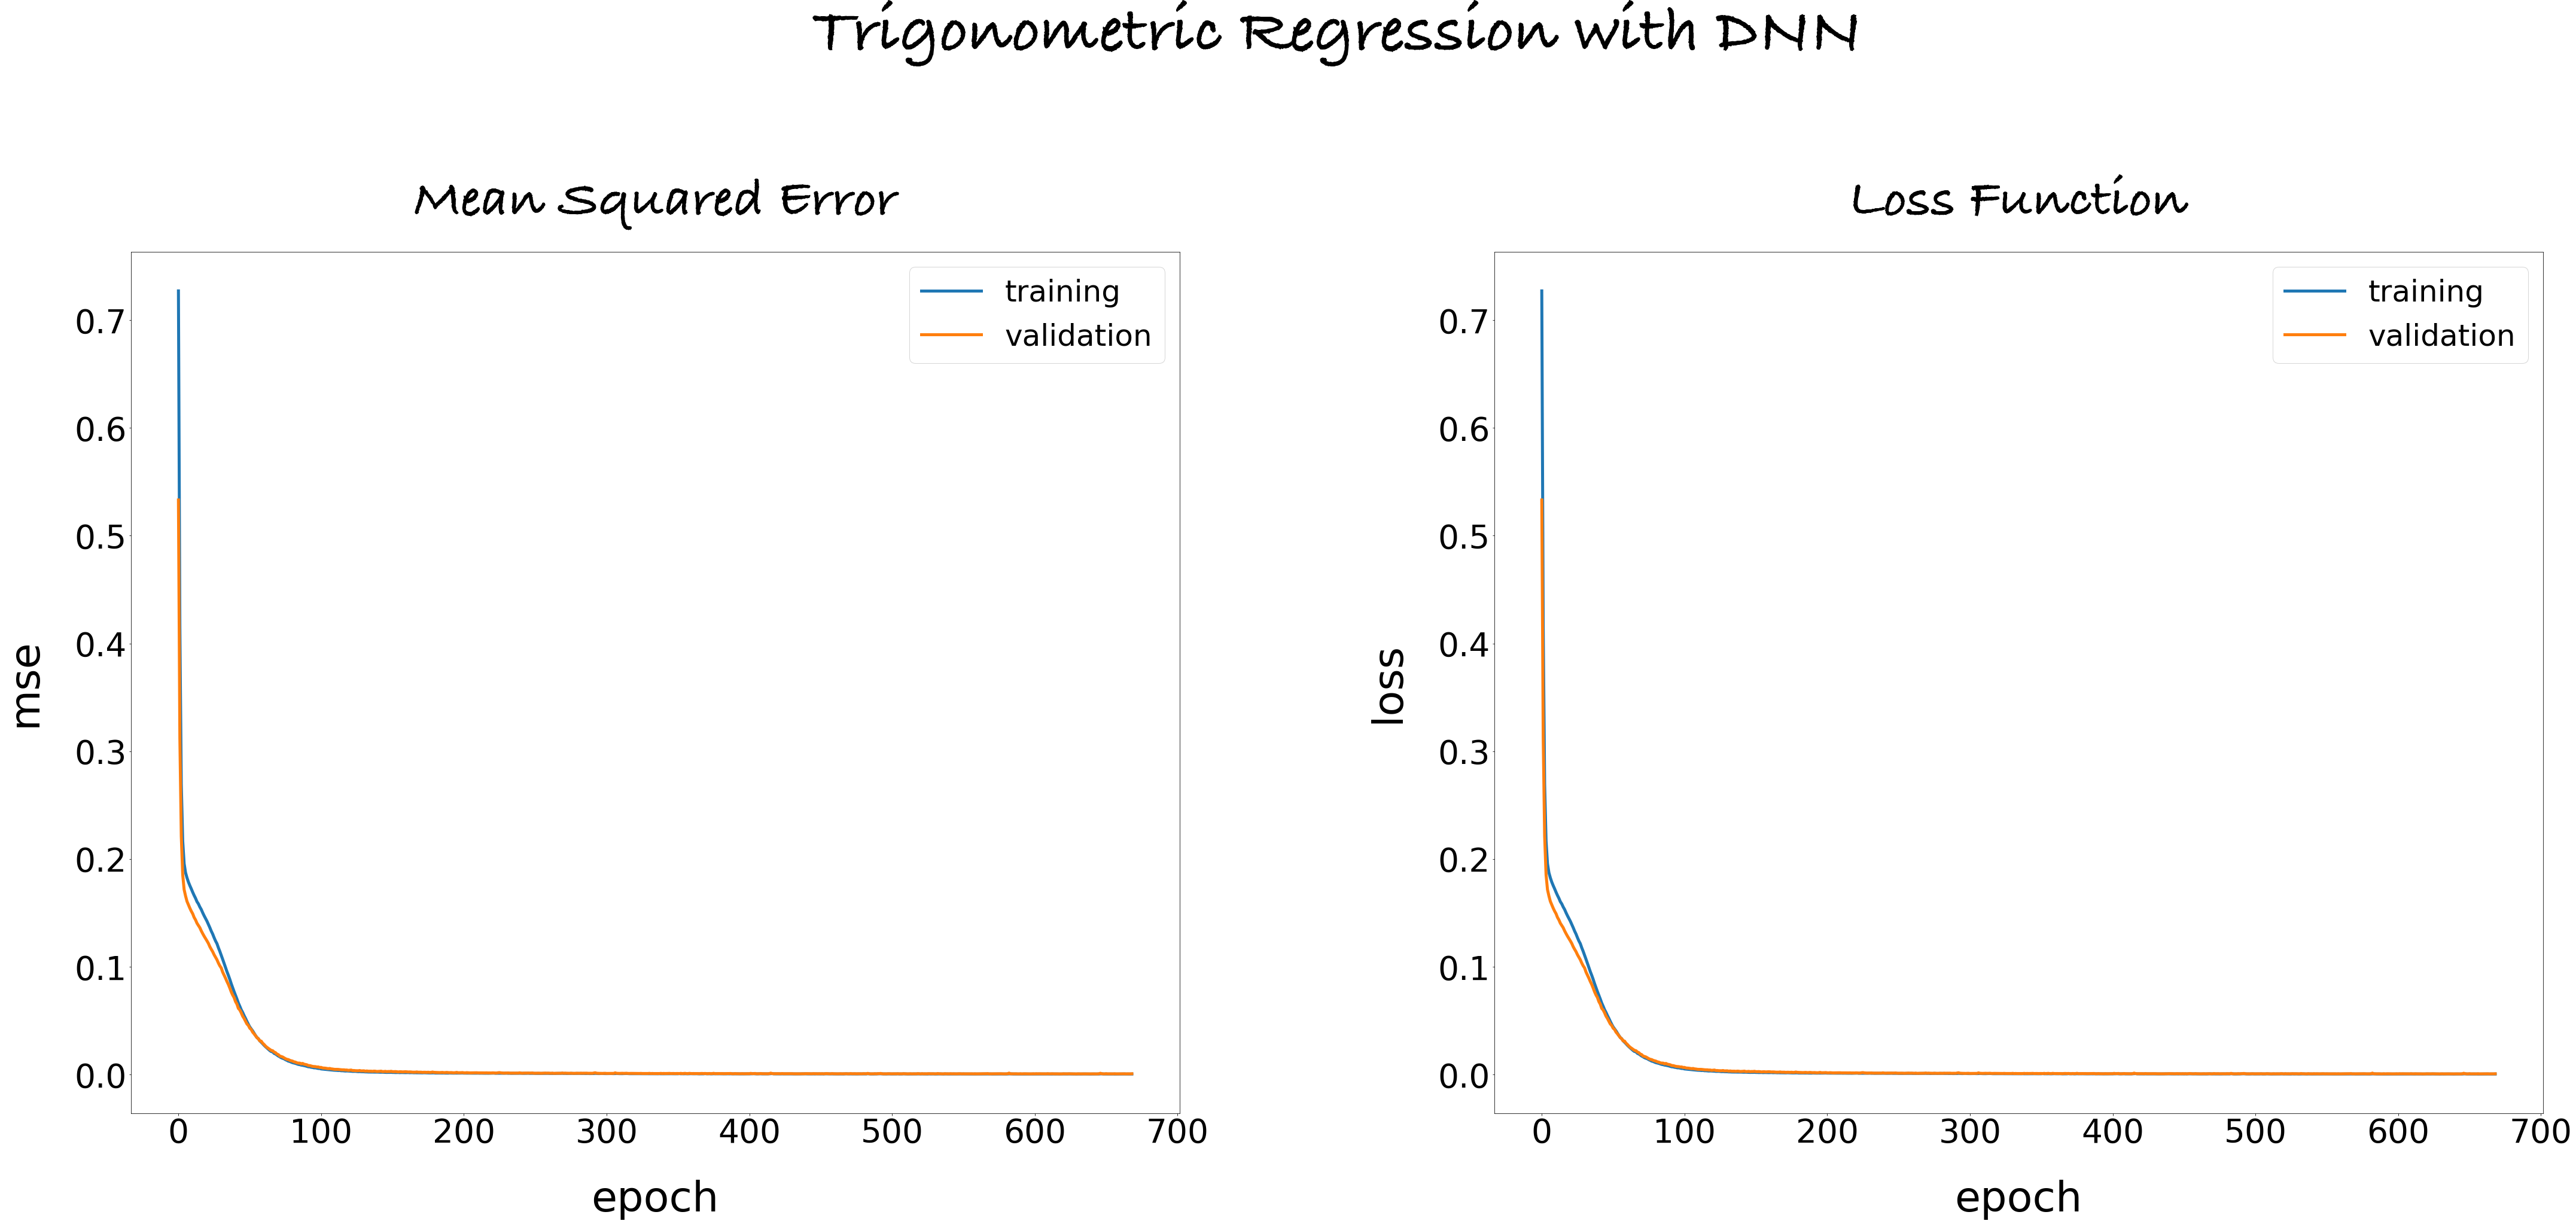

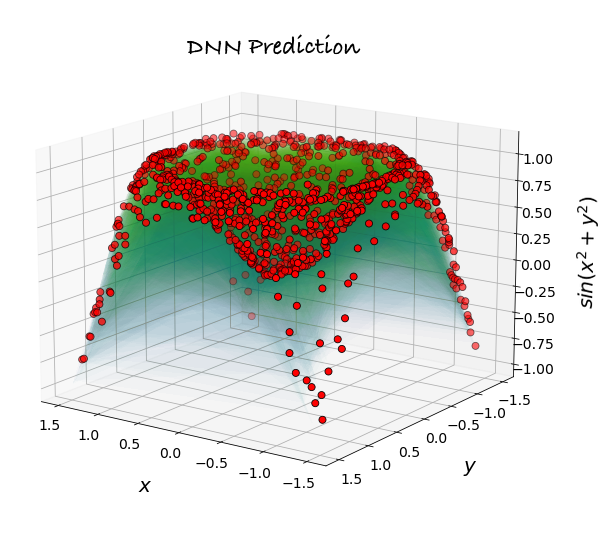

In [44]:
#plots
#Cost Function
plt.figure(figsize=[70, 25])  #deafult (6.4,4.8)
plt.suptitle('Trigonometric Regression with DNN', y=1.13, fontname = 'Bradley Hand', fontsize=110)

plt.subplot(1, 2, 1)
plt.title('Mean Squared Error', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('epoch', fontsize=70, labelpad=50)
plt.ylabel('mse', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.plot(history_Trig.history['mse'], lw=5.0, label='training')
plt.plot(history_Trig.history['val_mse'], lw=5.0, label='validation')
plt.legend(fontsize=50, loc='best')

plt.subplot(1, 2, 2)
plt.title('Loss Function', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('epoch', fontsize=70, labelpad=50)
plt.ylabel('loss', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.plot(history_Trig.history['loss'], lw=5.0, label='training')
plt.plot(history_Trig.history['val_loss'], lw=5.0, label='validation')
plt.legend(fontsize=50, loc='best')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
plt.show()

print('\n')
#prediction
fig = plt.figure(figsize=[12.4, 9.8])
ax = fig.add_subplot(111, projection='3d')
ax.set_title('DNN Prediction', y=0.98, fontname='Bradley Hand', fontsize=25)
X, Y = np.meshgrid(x_target[0:100, 0], x_target[0:100, 1])
f = np.array([sin(x**2+y**2) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = f.reshape(X.shape)
ax.set_xlabel('$x$', fontsize=20, labelpad=22)
ax.set_ylabel('$y$', fontsize=20, labelpad=22)
ax.set_zlabel('$sin(x^2+y^2)$', fontsize=20, labelpad=22)
ax.tick_params(labelsize=14)
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.008, antialiased=False)
ax.scatter3D(x_pred[:, 0], x_pred[:, 1], y_pred, color='r', marker="o", s=50,
             edgecolor='black', linewidths=0.8, label='DNN prediction')
ax.view_init(15, 125)
#fig.colorbar(surf, shrink=0.5, aspect=15, pad=0.1)
plt.show()

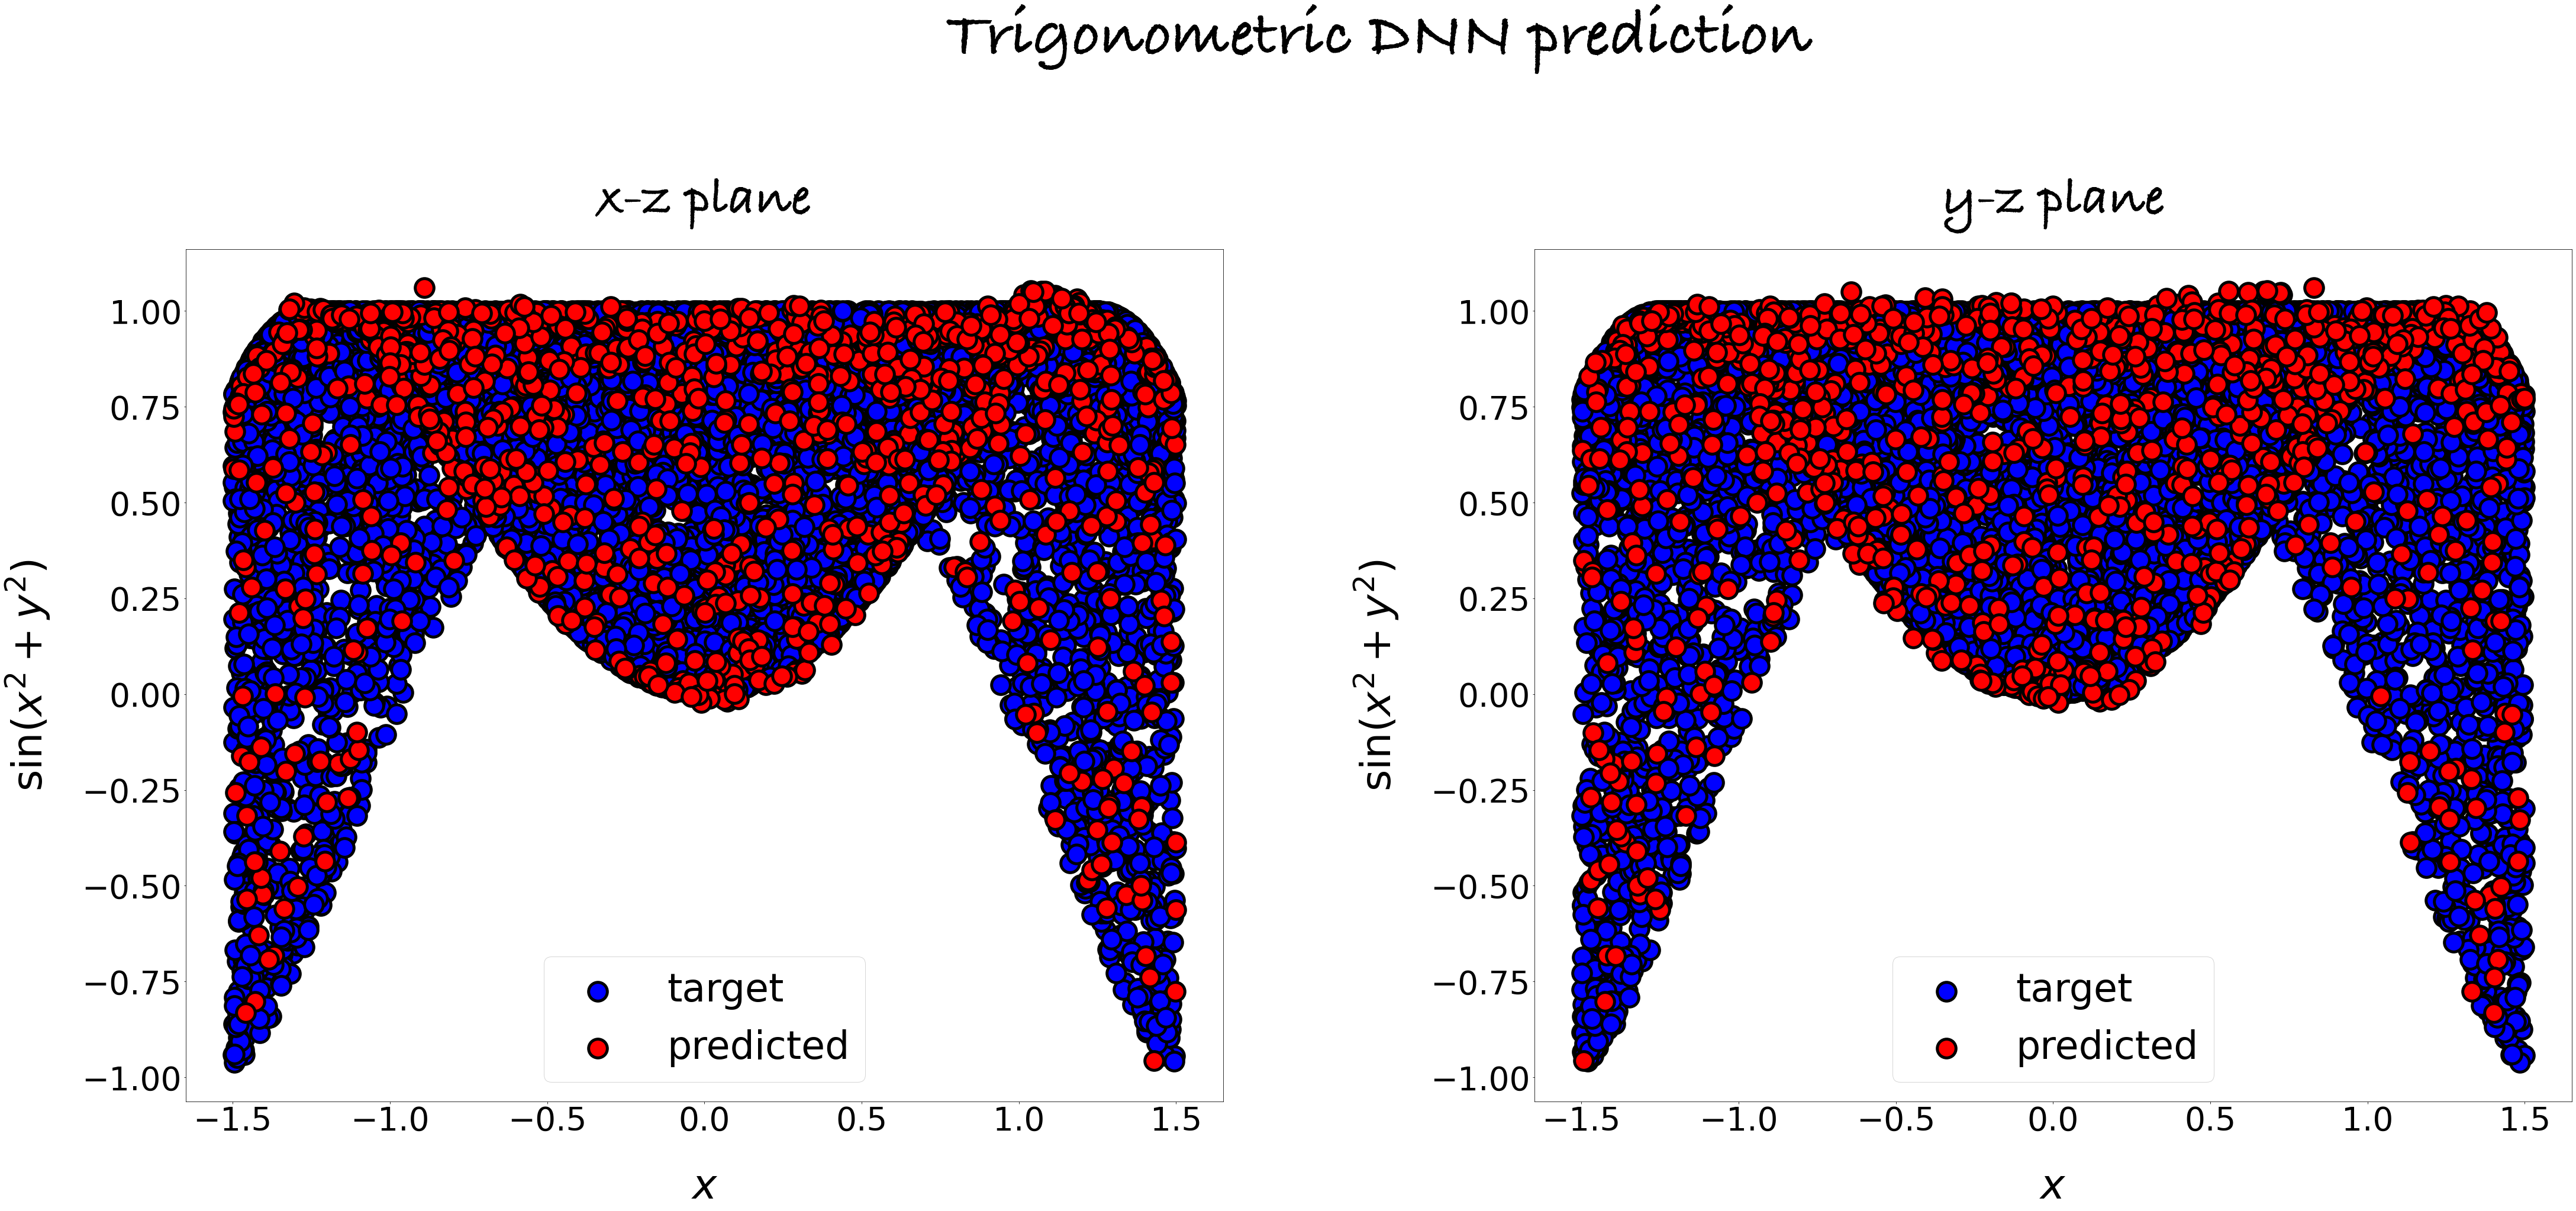

In [45]:
plt.figure(figsize=[70, 25])  #deafult (6.4,4.8)
plt.suptitle('Trigonometric DNN prediction', y=1.13, fontname = 'Bradley Hand', fontsize=110)

plt.subplot(1, 2, 1)
plt.title('x-z plane', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$x$', fontsize=70, labelpad=50)
plt.ylabel('$\sin(x^2+y^2)$', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.scatter(x_target[:, 0], y_target, color='b', marker="o", s=10**3,
            edgecolor='black', linewidths=5, label='target')
plt.scatter(x_pred[:, 0], y_pred, color='r', marker="o", s=10**3,
            edgecolor='black', linewidths=5, label='predicted')
plt.legend(fontsize=65, loc='best')

plt.subplot(1, 2, 2)
plt.title('y-z plane', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$x$', fontsize=70, labelpad=50)
plt.ylabel('$\sin(x^2+y^2)$', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.scatter(x_target[:, 1], y_target, color='b', marker="o", s=10**3,
            edgecolor='black', linewidths=5, label='target')
plt.scatter(x_pred[:, 1], y_pred, color='r', marker="o", s=10**3,
            edgecolor='black', linewidths=5, label='predicted')
plt.legend(fontsize=65, loc='best')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
plt.show()

The result obtained with this immediate first attempt is already satisfactory as far as I am concerned: the loss function is excellently minimized and the prediction on new unseen data is accurate, as can be seen above all from the graphs related to $ x-z $ and $ y-z $ planes.<br>
However, I try to add some new structure to my Neural Network to further improve my results (some red dots fall slightly off the target curve). For example, since the regression is more complex than the one done in the case of the third order polynomial of the previous exercise, I decide to increase both the depth and the width of the DNN, adding a further hidden layer, and increasing the number of neurons in each of these from $ 15 $ to $ 60 $.
I also add a layer that implements the *Dropout technique* just before the second and the third hidden layer. Dropout is used to prevent a model from overfitting. It works by randomly setting the outgoing edges of hidden units (neurons that make up hidden layers) to 0 at each update of the training phase. Dropout can help a model generalize by randomly setting the output for a given neuron to $ 0 $. In setting the output to $ 0 $, the cost function becomes more sensitive to neighbouring neurons changing the way the weights will be updated during the process of backpropagation.<br>
I also increase the size of the training dataset from $ 10^3 $ to $ 10^5 $ and the size of the validation dataset to $ 2000 $.<br> 
As always I show my results below.

In [46]:
############################
#Non Linear Fit
#Trigonometric Function
#2nd Attempt
############################
width_2 = 60

#Data sets
N_train_2 = 10**5  #training data set 
x_train_2 = np.zeros((N_train_2, 2))
x_train_2[:, 0] = np.random.uniform(-3/2, 3/2, N_train_2)
x_train_2[:, 1] = np.random.uniform(-3/2, 3/2, N_train_2)
y_train_2 = np.sin(x_train_2[:, 0]**2 + x_train_2[:, 1]**2)

N_valid_2 = 2000  #validation data set
x_valid_2 = np.zeros((N_valid_2, 2))
x_valid_2[:, 0] = np.random.uniform(-3/2, 3/2, N_valid_2)
x_valid_2[:, 1] = np.random.uniform(-3/2, 3/2, N_valid_2)
y_valid_2 = np.sin(x_valid_2[:, 0]**2 + x_valid_2[:, 1]**2)

#DNN Architecture
Deep_Trig_2 = tf.keras.Sequential()
Deep_Trig_2.add(Input(shape=(2,)))
Deep_Trig_2.add(Dense(width_2, activation='relu'))  #1st hidden layer
Deep_Trig_2.add(Dropout(0.5))  #Dropout before the 2nd hidden layer
Deep_Trig_2.add(Dense(width_2, activation='relu'))  #2nd hidden layer
Deep_Trig_2.add(Dropout(0.5))  #Dropout before the 3rd hidden layer
Deep_Trig_2.add(Dense(width_2, activation='relu'))  #3rd hidden layer
Deep_Trig_2.add(Dense(1, activation='linear'))
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
ES = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=200, verbose=1)
Deep_Trig_2.compile(optimizer=adam, loss='mse', metrics=['mse'])
Deep_Trig_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 60)                180       
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 60)                3660      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 60)                3660      
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 61        
Total params: 7,561
Trainable params: 7,561
Non-trainable params: 0
____________________________________________________

In [47]:
#DNN Training
print('Start Training of Deep_Trig_2')
history_Trig_2 = Deep_Trig_2.fit(x_train_2, y_train_2, batch_size=10**4,
                                 epochs=N_epoch, initial_epoch=0,
                                 validation_data=(x_valid_2, y_valid_2),
                                 shuffle=True, callbacks=[ES], verbose=0)
print('End of the Training Phase')

Start Training of Deep_Trig_2
Epoch 00255: early stopping
End of the Training Phase


In [48]:
#DNN prediction
x_pred_2 = np.zeros((N_pred, 2))
x_pred_2[:, 0] = np.random.uniform(-3/2, 3/2, N_pred)
x_pred_2[:, 1] = np.random.uniform(-3/2, 3/2, N_pred)
y_pred_2 = Deep_Trig_2.predict(x_pred_2, verbose=0)

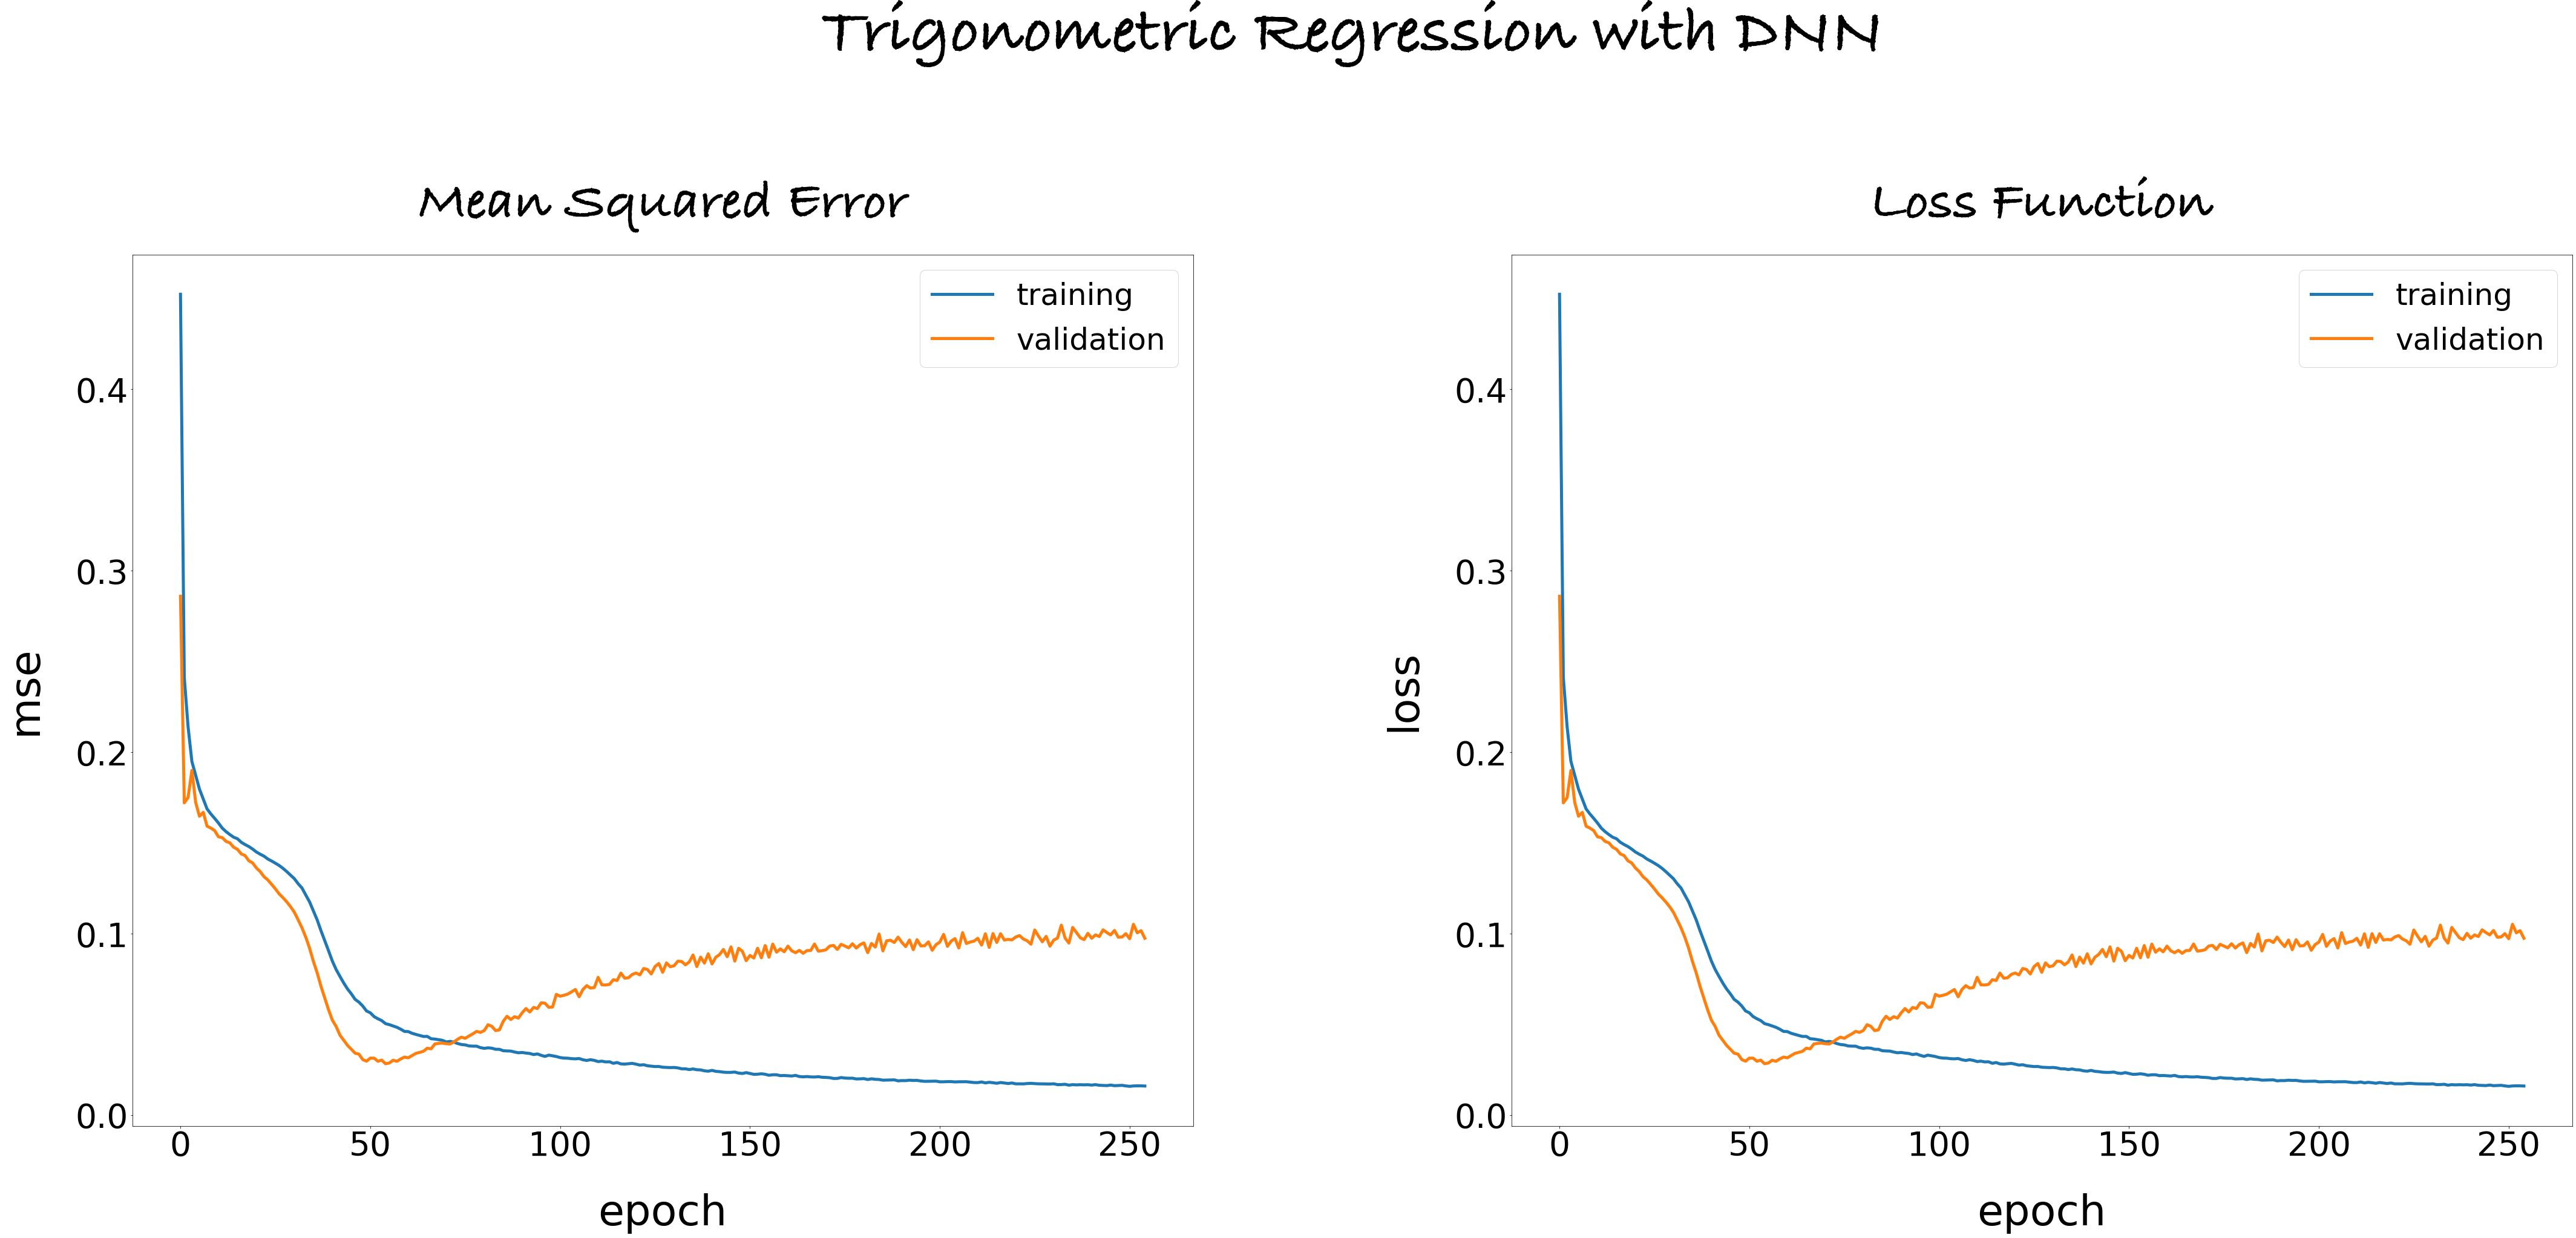

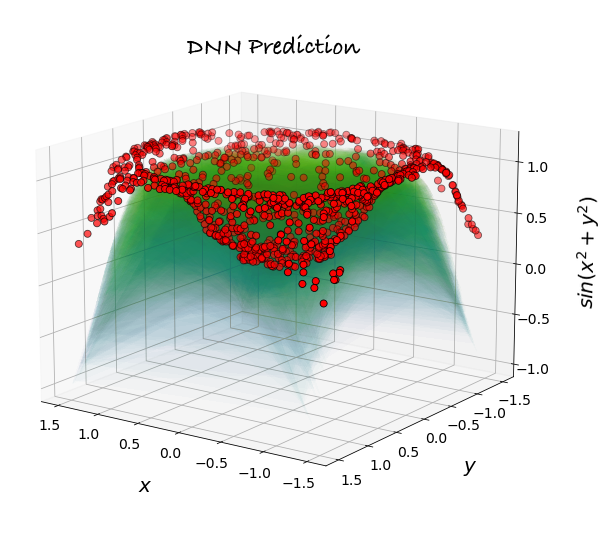

In [49]:
#plots
#Cost Function
plt.figure(figsize=[70, 25])  #deafult (6.4,4.8)
plt.suptitle('Trigonometric Regression with DNN', y=1.13, fontname = 'Bradley Hand', fontsize=110)

plt.subplot(1, 2, 1)
plt.title('Mean Squared Error', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('epoch', fontsize=70, labelpad=50)
plt.ylabel('mse', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.plot(history_Trig_2.history['mse'], lw=5.0, label='training')
plt.plot(history_Trig_2.history['val_mse'], lw=5.0, label='validation')
plt.legend(fontsize=50, loc='best')

plt.subplot(1, 2, 2)
plt.title('Loss Function', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('epoch', fontsize=70, labelpad=50)
plt.ylabel('loss', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.plot(history_Trig_2.history['loss'], lw=5.0, label='training')
plt.plot(history_Trig_2.history['val_loss'], lw=5.0, label='validation')
plt.legend(fontsize=50, loc='best')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
plt.show()

print('\n')
#prediction
fig = plt.figure(figsize=[12.4, 9.8])
ax = fig.add_subplot(111, projection='3d')
ax.set_title('DNN Prediction', y=0.98, fontname='Bradley Hand', fontsize=25)
X, Y = np.meshgrid(x_target[0:100, 0], x_target[0:100, 1])
f = np.array([sin(x**2+y**2) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = f.reshape(X.shape)
ax.set_xlabel('$x$', fontsize=20, labelpad=22)
ax.set_ylabel('$y$', fontsize=20, labelpad=22)
ax.set_zlabel('$sin(x^2+y^2)$', fontsize=20, labelpad=22)
ax.tick_params(labelsize=14)
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.008, antialiased=False)
ax.scatter3D(x_pred_2[:, 0], x_pred_2[:, 1], y_pred_2, color='r', marker="o", s=50,
             edgecolor='black', linewidths=0.8, label='DNN prediction')
ax.view_init(15, 125)
#fig.colorbar(surf, shrink=0.5, aspect=15, pad=0.1)
plt.show()

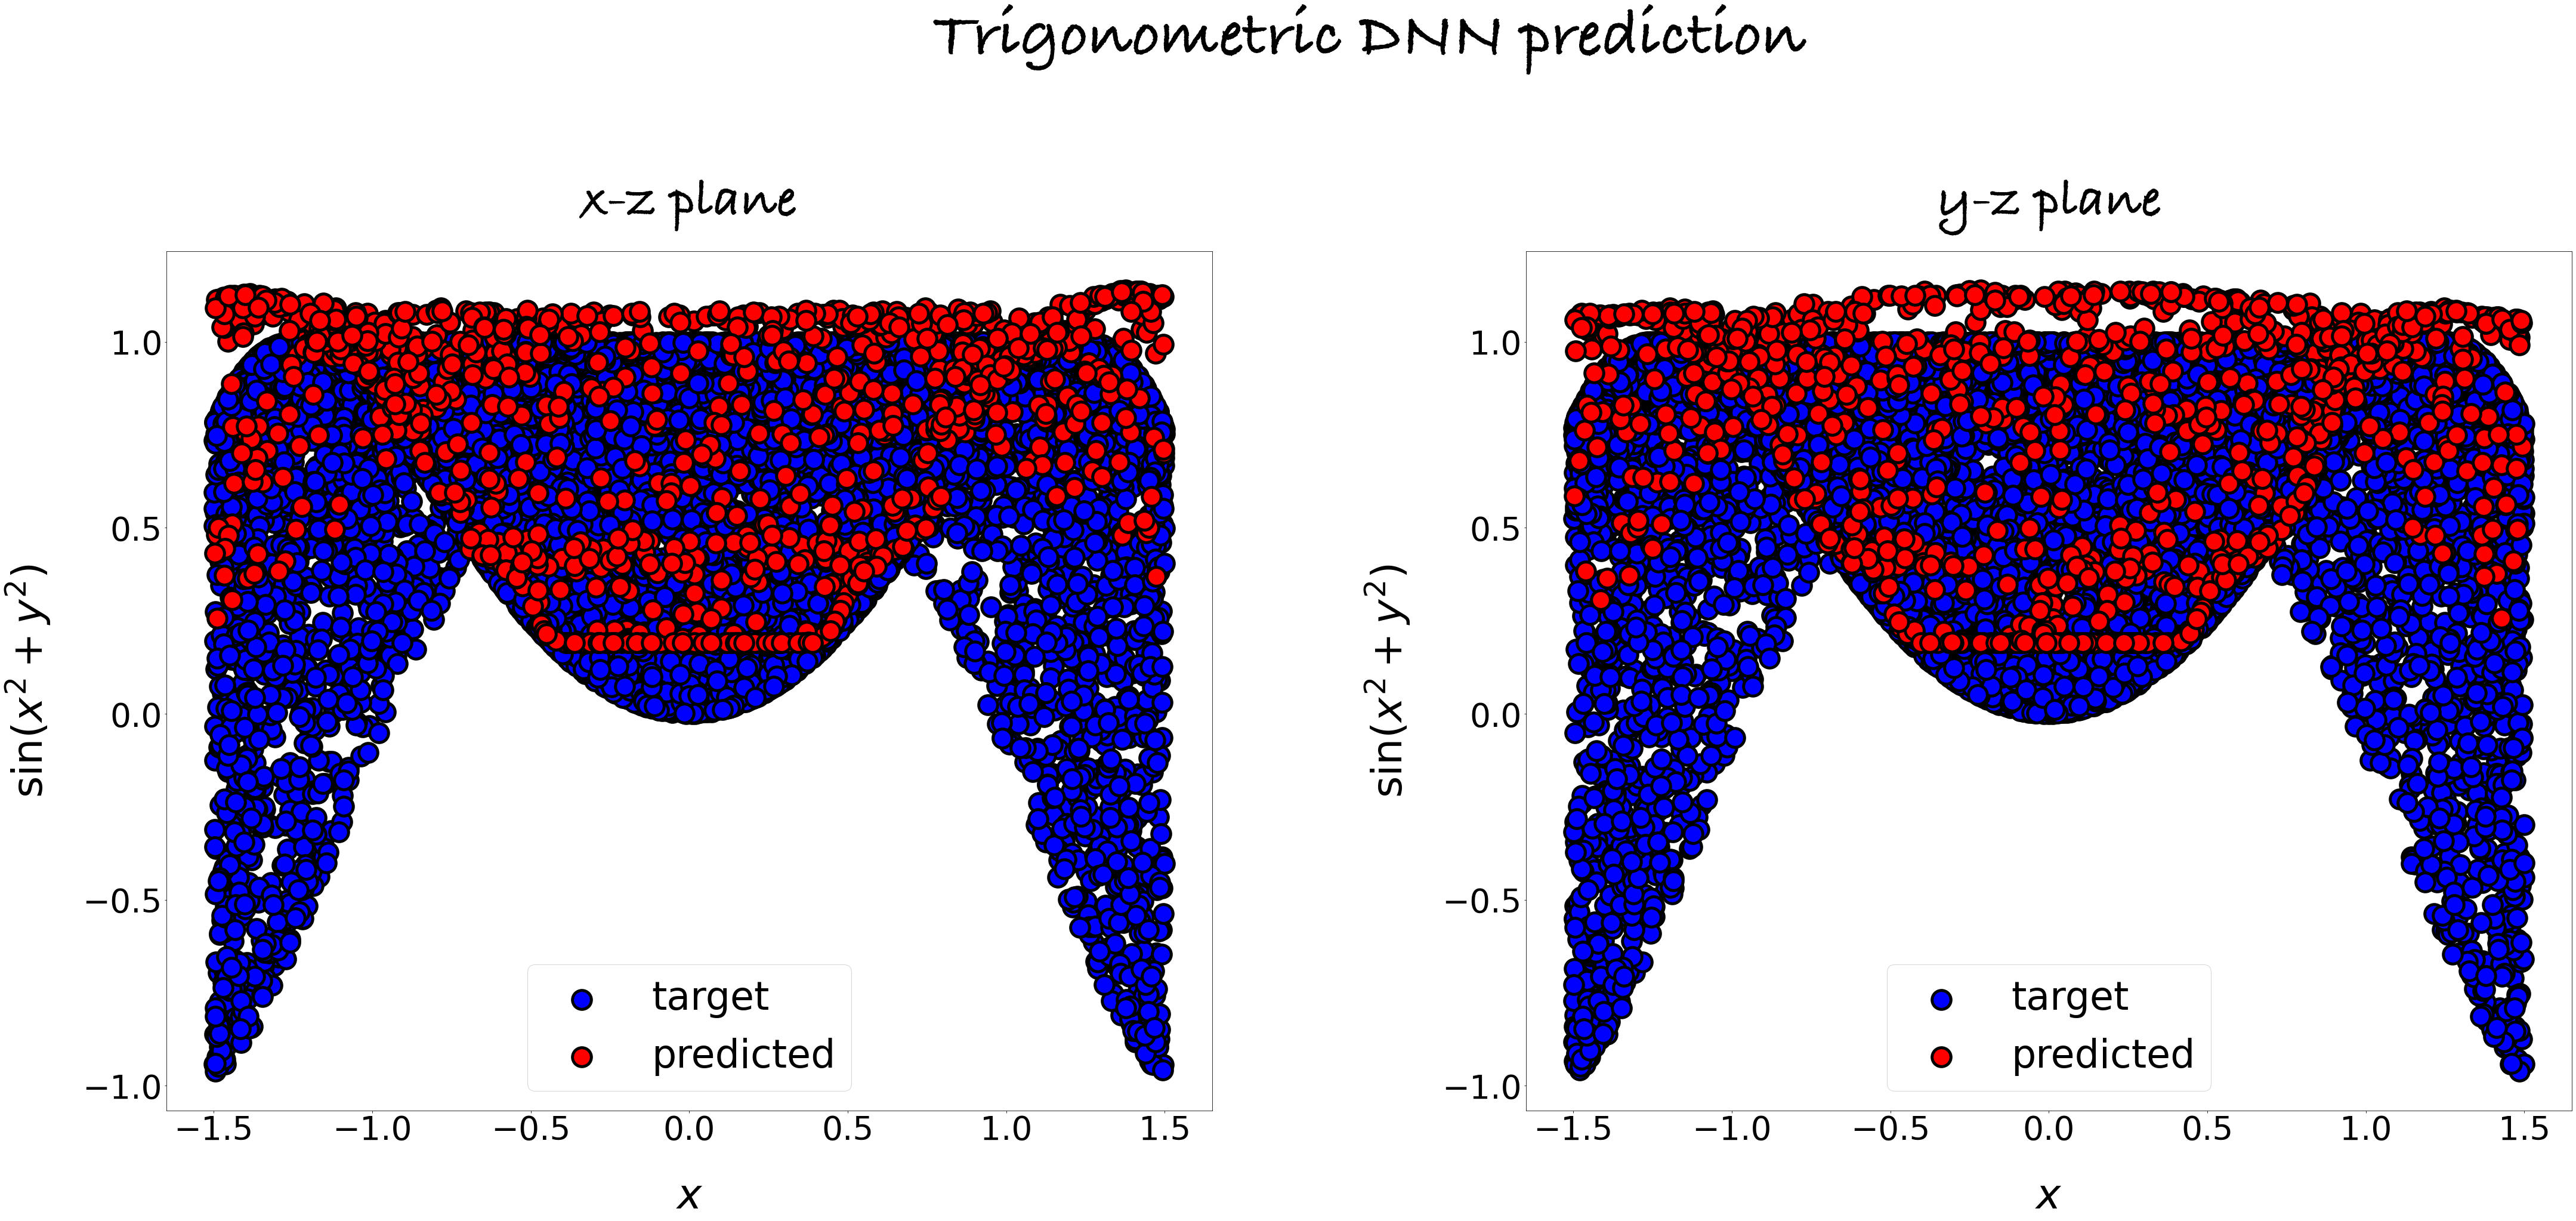

In [50]:
plt.figure(figsize=[70, 25])  #deafult (6.4,4.8)
plt.suptitle('Trigonometric DNN prediction', y=1.13, fontname = 'Bradley Hand', fontsize=110)

plt.subplot(1, 2, 1)
plt.title('x-z plane', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$x$', fontsize=70, labelpad=50)
plt.ylabel('$\sin(x^2+y^2)$', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.scatter(x_target[:, 0], y_target, color='b', marker="o", s=10**3,
            edgecolor='black', linewidths=5, label='target')
plt.scatter(x_pred_2[:, 0], y_pred_2, color='r', marker="o", s=10**3,
            edgecolor='black', linewidths=5, label='predicted')
plt.legend(fontsize=65, loc='best')

plt.subplot(1, 2, 2)
plt.title('y-z plane', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$x$', fontsize=70, labelpad=50)
plt.ylabel('$\sin(x^2+y^2)$', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.scatter(x_target[:, 1], y_target, color='b', marker="o", s=10**3,
            edgecolor='black', linewidths=5, label='target')
plt.scatter(x_pred_2[:, 1], y_pred_2, color='r', marker="o", s=10**3,
            edgecolor='black', linewidths=5, label='predicted')
plt.legend(fontsize=65, loc='best')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
plt.show()

As evidenced by the results obtained, increasing the complexity of the architecture does not lead to improvements, but even greatly gets worse the optimization of the parameters and consequently the prediction.<br>
In particular I suspect that the problem is linked, unexpectedly, to the introduction of the layers that implement the Dropout. So I try, as a last attempt, to remove them and repeat the simulation.

In [51]:
############################
#Non Linear Fit
#Trigonometric Function
#3rd Attempt
############################
#DNN Architecture
Deep_Trig_3 = tf.keras.Sequential()
Deep_Trig_3.add(Input(shape=(2,)))
Deep_Trig_3.add(Dense(width_2, activation='relu'))  #1st hidden layer
Deep_Trig_3.add(Dense(width_2, activation='relu'))  #2nd hidden layer
Deep_Trig_3.add(Dense(width_2, activation='relu'))  #3rd hidden layer
Deep_Trig_3.add(Dense(1, activation='linear'))
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
ES = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=200, verbose=1)
Deep_Trig_3.compile(optimizer=adam, loss='mse', metrics=['mse'])
Deep_Trig_3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 60)                180       
_________________________________________________________________
dense_50 (Dense)             (None, 60)                3660      
_________________________________________________________________
dense_51 (Dense)             (None, 60)                3660      
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 61        
Total params: 7,561
Trainable params: 7,561
Non-trainable params: 0
_________________________________________________________________


In [52]:
#DNN Training
print('Start Training of Deep_Trig_3')
history_Trig_3 = Deep_Trig_3.fit(x_train_2, y_train_2, batch_size=10**4,
                                 epochs=N_epoch, initial_epoch=0,
                                 validation_data=(x_valid_2, y_valid_2),
                                 shuffle=True, callbacks=[ES], verbose=0)
print('End of the Training Phase')

Start Training of Deep_Trig_3
End of the Training Phase


In [53]:
#DNN prediction
x_pred_3 = np.zeros((N_pred, 2))
x_pred_3[:, 0] = np.random.uniform(-3/2, 3/2, N_pred)
x_pred_3[:, 1] = np.random.uniform(-3/2, 3/2, N_pred)
y_pred_3 = Deep_Trig_3.predict(x_pred_3, verbose=0)

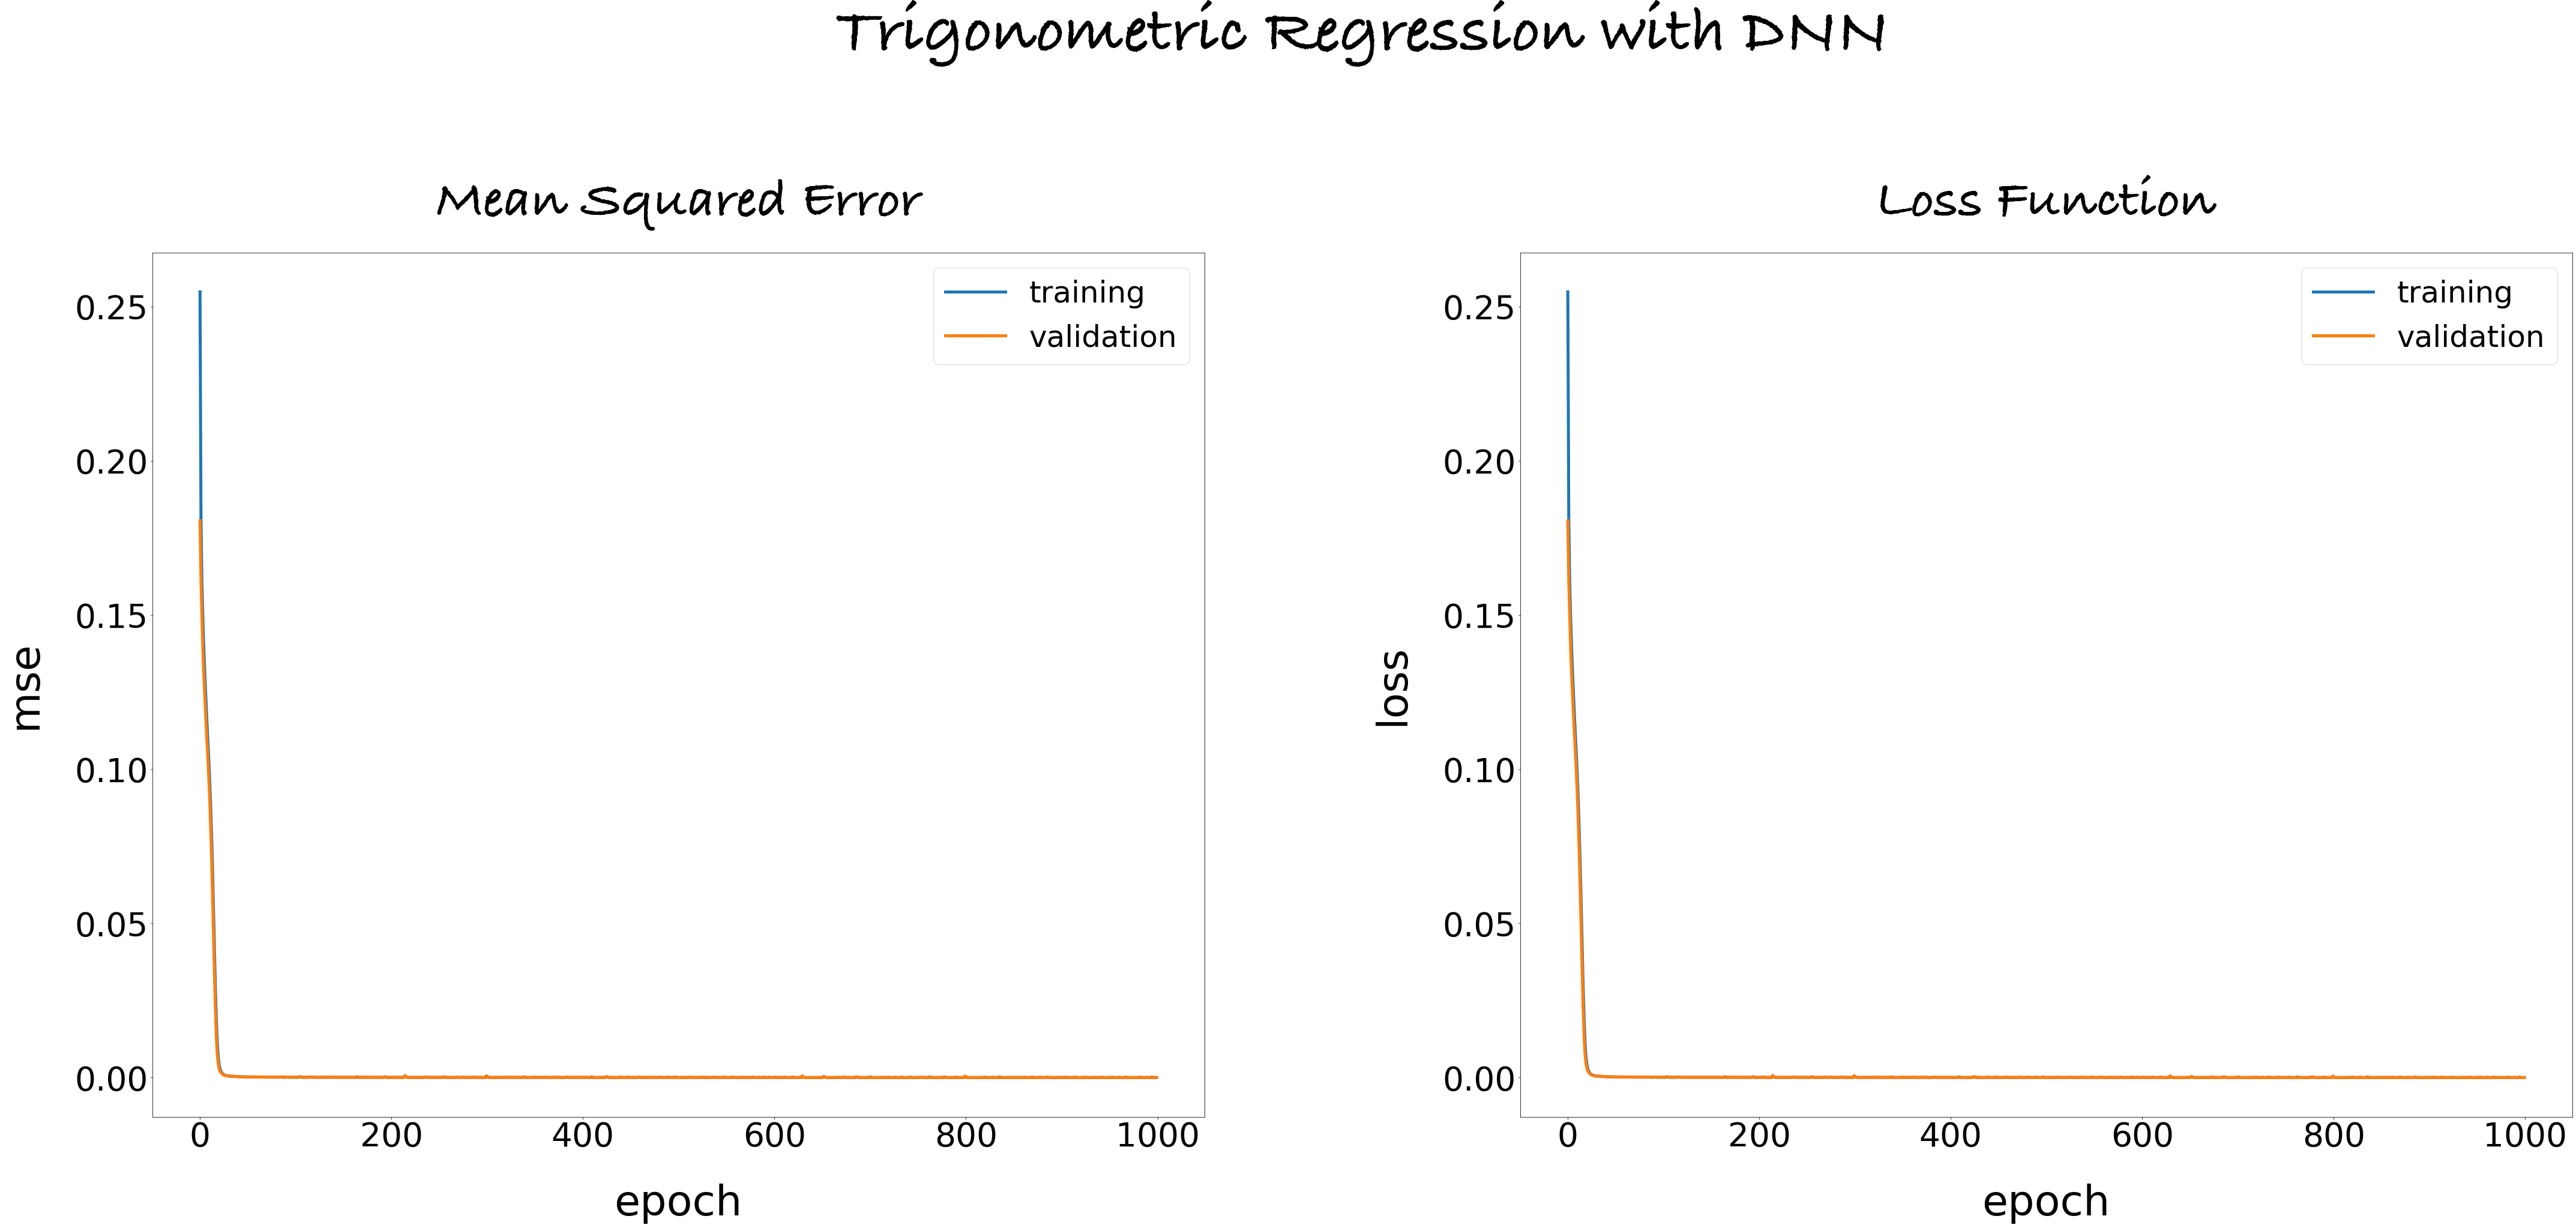

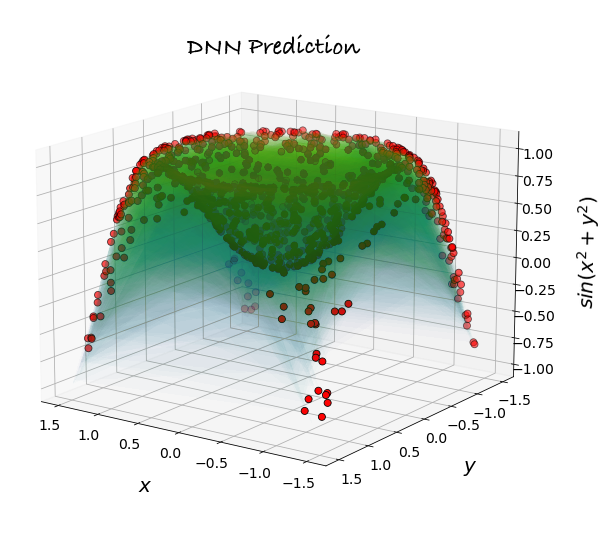

In [54]:
#plots
#Cost Function
plt.figure(figsize=[70, 25])  #deafult (6.4,4.8)
plt.suptitle('Trigonometric Regression with DNN', y=1.13, fontname = 'Bradley Hand', fontsize=110)

plt.subplot(1, 2, 1)
plt.title('Mean Squared Error', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('epoch', fontsize=70, labelpad=50)
plt.ylabel('mse', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.plot(history_Trig_3.history['mse'], lw=5.0, label='training')
plt.plot(history_Trig_3.history['val_mse'], lw=5.0, label='validation')
plt.legend(fontsize=50, loc='best')

plt.subplot(1, 2, 2)
plt.title('Loss Function', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('epoch', fontsize=70, labelpad=50)
plt.ylabel('loss', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.plot(history_Trig_3.history['loss'], lw=5.0, label='training')
plt.plot(history_Trig_3.history['val_loss'], lw=5.0, label='validation')
plt.legend(fontsize=50, loc='best')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
plt.show()

print('\n')
#prediction
fig = plt.figure(figsize=[12.4, 9.8])
ax = fig.add_subplot(111, projection='3d')
ax.set_title('DNN Prediction', y=0.98, fontname='Bradley Hand', fontsize=25)
X, Y = np.meshgrid(x_target[0:100, 0], x_target[0:100, 1])
f = np.array([sin(x**2+y**2) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = f.reshape(X.shape)
ax.set_xlabel('$x$', fontsize=20, labelpad=22)
ax.set_ylabel('$y$', fontsize=20, labelpad=22)
ax.set_zlabel('$sin(x^2+y^2)$', fontsize=20, labelpad=22)
ax.tick_params(labelsize=14)
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.008, antialiased=False)
ax.scatter3D(x_pred_3[:, 0], x_pred_3[:, 1], y_pred_3, color='r', marker="o", s=50,
             edgecolor='black', linewidths=0.8, label='DNN prediction')
ax.view_init(15, 125)
#fig.colorbar(surf, shrink=0.5, aspect=15, pad=0.1)
plt.show()

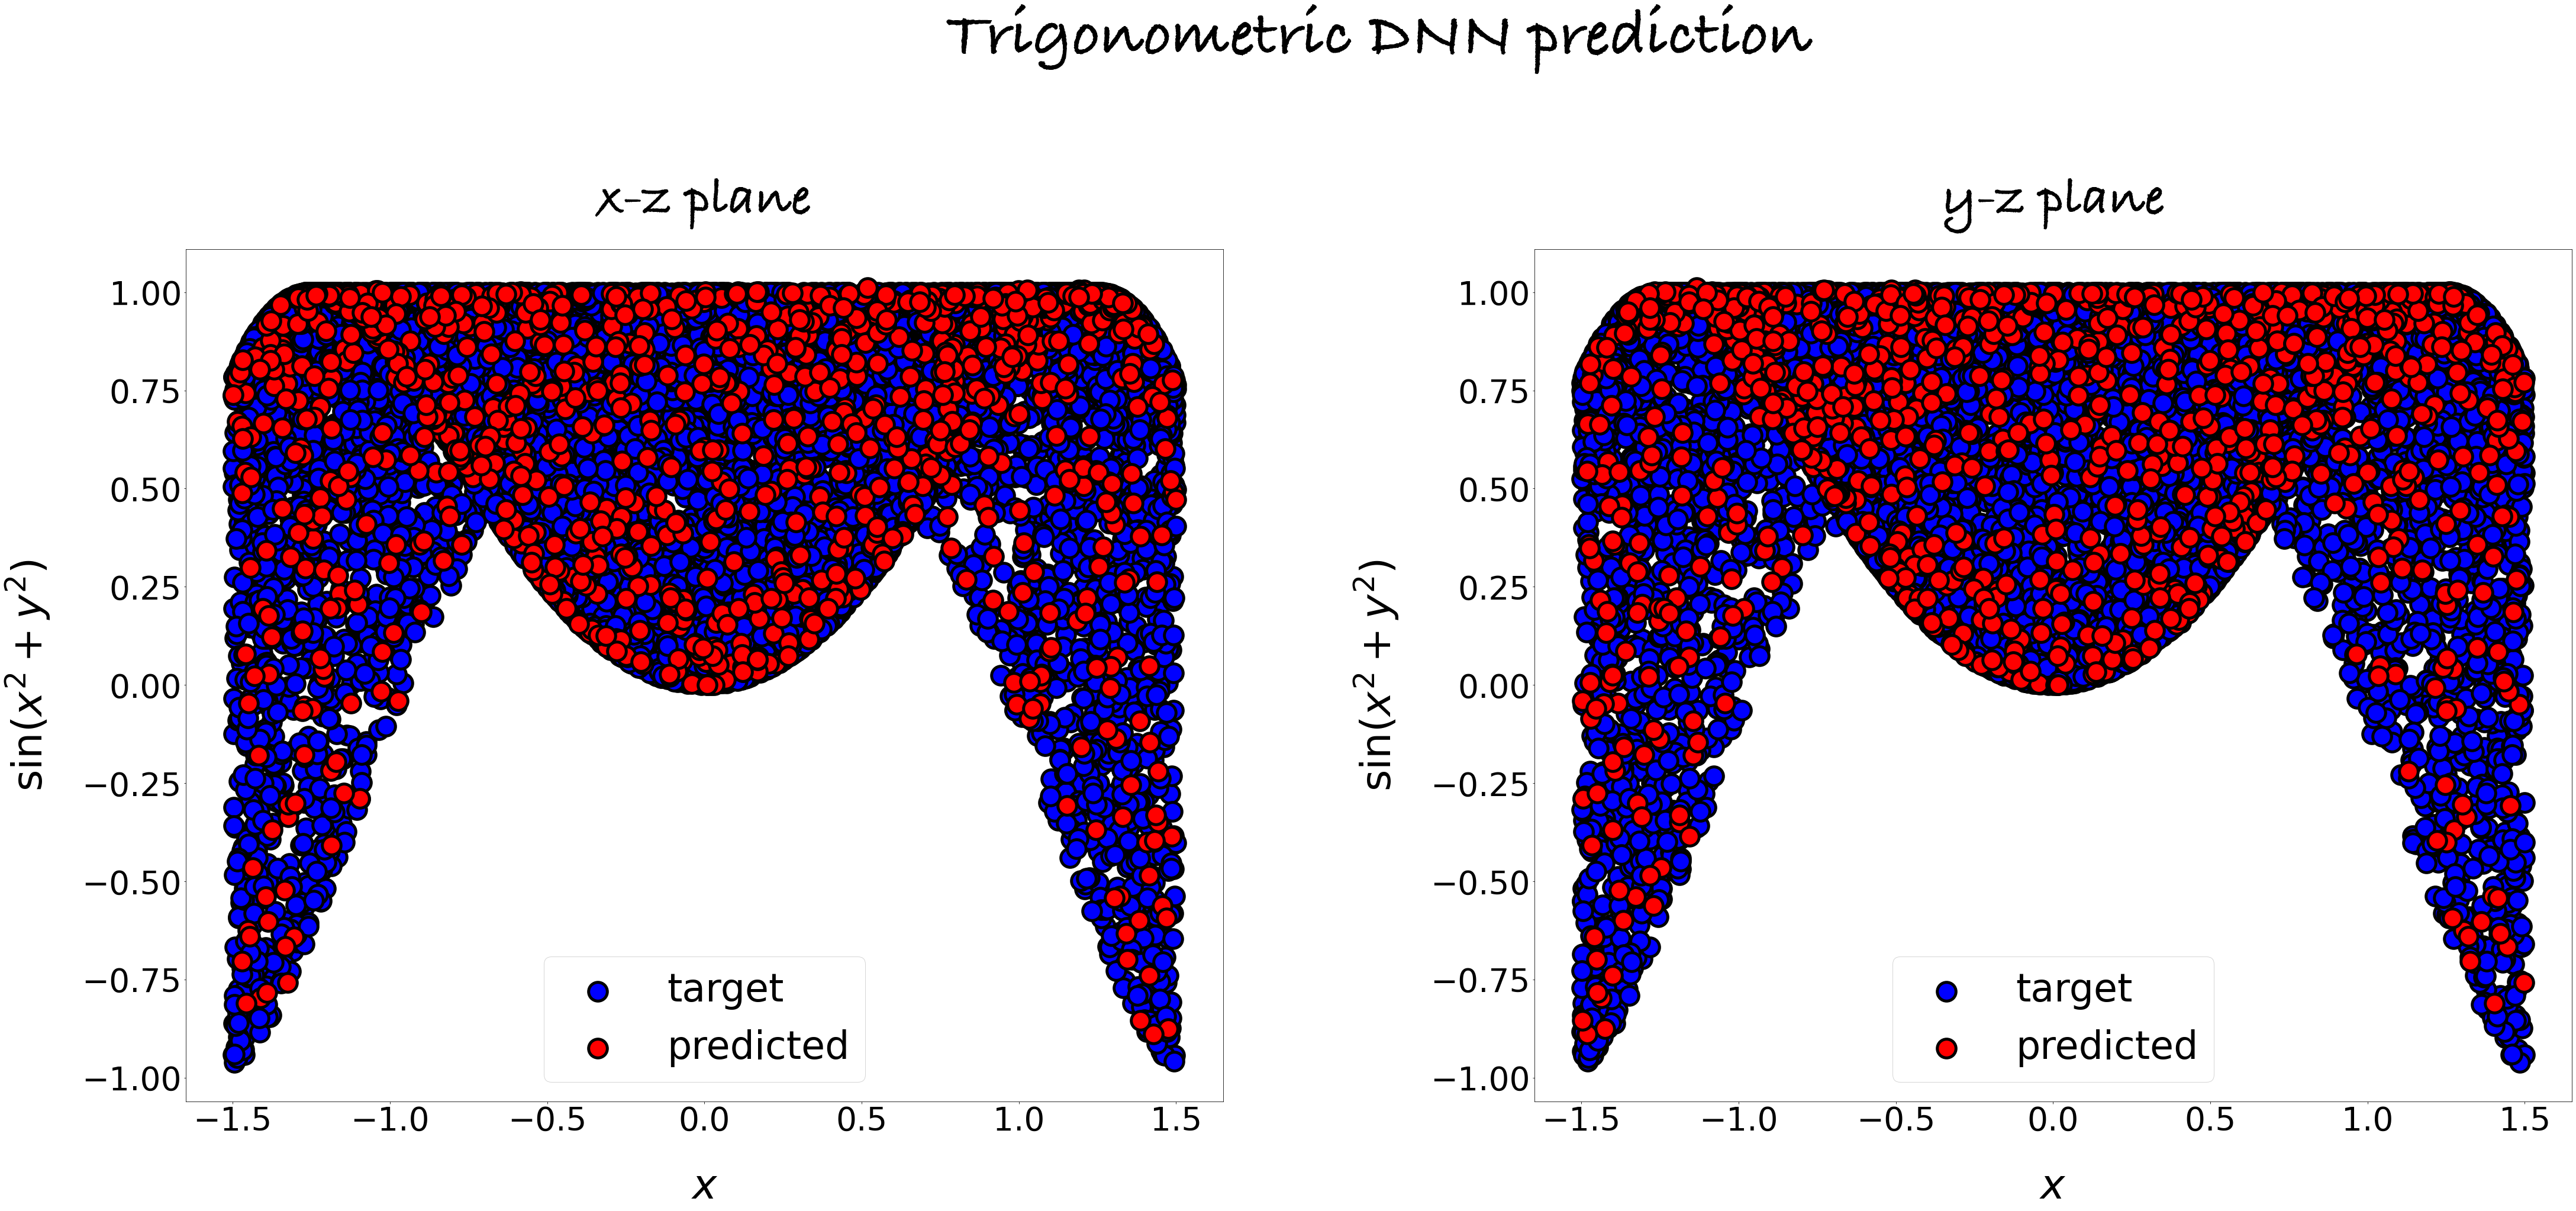

In [55]:
plt.figure(figsize=[70, 25])  #deafult (6.4,4.8)
plt.suptitle('Trigonometric DNN prediction', y=1.13, fontname = 'Bradley Hand', fontsize=110)

plt.subplot(1, 2, 1)
plt.title('x-z plane', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$x$', fontsize=70, labelpad=50)
plt.ylabel('$\sin(x^2+y^2)$', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.scatter(x_target[:, 0], y_target, color='b', marker="o", s=10**3,
            edgecolor='black', linewidths=5, label='target')
plt.scatter(x_pred_3[:, 0], y_pred_3, color='r', marker="o", s=10**3,
            edgecolor='black', linewidths=5, label='predicted')
plt.legend(fontsize=65, loc='best')

plt.subplot(1, 2, 2)
plt.title('y-z plane', y=1.04, fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$x$', fontsize=70, labelpad=50)
plt.ylabel('$\sin(x^2+y^2)$', fontsize=70, labelpad=50)
plt.xticks(fontsize=55)
plt.yticks(fontsize=55)
plt.scatter(x_target[:, 1], y_target, color='b', marker="o", s=10**3,
            edgecolor='black', linewidths=5, label='target')
plt.scatter(x_pred_3[:, 1], y_pred_3, color='r', marker="o", s=10**3,
            edgecolor='black', linewidths=5, label='predicted')
plt.legend(fontsize=65, loc='best')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
plt.show()

Actually taking off the Dropout I manage to train the DNN for more epochs (in the sense that the Early Stopping technique does not stop the training before the end) and to improve the results in the moment to make predictions on unseen data.